# Exploratory Data Analysis


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  


## Set preferences

In [2]:
# Seaborn
color = sns.color_palette()
sns.set_style('darkgrid')

# Data formats
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Pandas warning for chain assignments
pd.options.mode.chained_assignment = None  # default='warn'

## Functions

In [3]:
def catplot(df, x, y, hue):
    '''Creates a box plot for the passed features'''
    sns.catplot(kind='box',         # Boxplot
                y=y,                # Y-axis value
                x=x,                # X-axis value - first factor
                hue=hue,            # Second factor denoted by color
                data=df,            # Dataframe
                height=8,           # Figure size (x100px)
                aspect=1.5,         # Width = size * aspect
                legend_out=False)   # Make legend inside the plot
    plt.show()
    
def corrbox(df, col1, col2):
    '''Creates a box plot to show correlation between two columns. Typically used to show correlation to Sale Price'''
    # plt.figure(figsize = (14, 6))
    mean = df.groupby(col1)[col2].mean()
    df[col1] = df[col1].astype('category')
    levels = mean.sort_values().index.tolist()
    df[col1].cat.reorder_categories(levels, inplace=True)
    sns.boxplot(x = col1, y = col2, data=df)
    plt.ylabel(col2)
    plt.show()
    
def corrnum(df, col1, col2):
    '''Creates a fill-between plot to show correlation between two columns. Typically used to show correlation to Sale Price'''
    # Decide how to bin data
    # For columns with less than 50 distinct values, do not bin 
    if df[col1].nunique() < 50:
        mean = df.groupby(col1)[col2].mean()
        std = df.groupby(col1)[col2].std()
    # For columns with no value in more than 10% of rows, make bins with equal # of rows.
    #elif df[col1].value_counts().max() < len(df) * .1:
    #    mean = df.groupby(pd.qcut(df[col1], q=10, precision=0))[col2].mean()
    #    std = df.groupby(pd.qcut(df[col1], q=10, precision=0))[col2].std()
    # for columns with a value in at least 10% of rows, make bins of equal range regardless of how many rows are in each bin
    else:
        mean = df.groupby(pd.cut(df[col1], bins=10, precision=0))[col2].mean()
        std = df.groupby(pd.cut(df[col1], bins=10, precision=0))[col2].std()
    mean.plot()
    plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)
    plt.xticks(rotation=45)
    plt.ylabel(col2)
    plt.show()
    
def plot_feature(df, col1, col2):
    '''
    Make plot for each features
    left, the distribution of samples on the first feature
    right, the correlation between the two features. Typically inducted is the 2nd feature.
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col1].dtype == 'int64' or df[col1].dtype == 'float64':
        if df[col1].nunique() < 50:
            df[col1].value_counts().sort_index().plot()
        # For columns with no value in more than 10% of rows, make bins with equal # of rows.
        # elif df[col1].value_counts().max() < len(df) * .1:
        #    pd.qcut(df[col1], q=10, precision=0).value_counts().sort_index().plot()
        # for columns with a value in at least 10% of rows, make bins of equal range regardless of how many rows are in each bin
        else:
            pd.cut(df[col1], bins=10, precision=0).value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col1)[col2].mean()
        df[col1] = df[col1].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col1].cat.reorder_categories(levels, inplace=True)
        df[col1].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col1)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col1].dtype == 'int64' or df[col1].dtype == 'float64':
        corrnum(df, col1, col2)
    else:
        corrbox(df, col1, col2)

def get_bin_members(df, bin_col, req_bin):
    bins, edges = pd.cut(df[bin_col], bins=10, precision=0, retbins=True, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    df = df[['Name', 'inducted', bin_col]]
    df['bin'] = bins
    df.set_index('Name', inplace=True)
    df.sort_values(by=bin_col, ascending=False, inplace=True)
    print(round(edges[int(req_bin) - 1], 0), '<', bin_col, '<=', round(edges[int(req_bin)], 0), '\n', df[df['bin'] == req_bin])
    
def get_def_games_details(df, bin_col):
    bins = pd.cut(df[bin_col], bins=10, precision=0)
    df1 = df[['Name']].groupby(bins).agg(['count'])
    means = df[['G', 'C', '1B', '2B', '3B', 'SS', 'OF', 'inducted']].groupby(bins).agg(['mean'])
    df2 = pd.merge(df1, means, how='left', left_index=True, right_index=True)
    pos_pct = bin_col + '_pct'
    df2[pos_pct] = (df2[bin_col] / df2['G']) * 100
    return df2

def get_nlargest(df, n, col):
    df = df[['Name', col, 'inducted']]
    df.set_index('Name', inplace=True)
    return df.nlargest(n, col)
    
    

In [4]:
# Import the data sets
df_pos_play = pd.read_csv('data_career\pos_play.csv')
df_pitchers = pd.read_csv('data_career\pitchers.csv')

## Position Players

In [5]:
df_pos_play.shape

(1946, 59)

In [6]:
df_pos_play.head()

playerID          Name  NumYears  debut  final        G        AB  \
0  aaronha01    Hank Aaron        23   1954   1976 3298.000 12364.000   
1  abreubo01   Bobby Abreu        18   1996   2014 2425.000  8480.000   
2  adairje01   Jerry Adair        13   1958   1970 1165.000  4019.000   
3  adamsbo03   Bobby Adams        14   1946   1959 1281.000  4019.000   
4  adamssp01  Sparky Adams        13   1922   1934 1424.000  5557.000   

         R        H  Doubles  ...  GG_LF  GG_CF  GG_RF  GG_OF  GG_All_OF  \
0 2174.000 3771.000  624.000  ...  0.000  0.000  3.000  0.000      3.000   
1 1453.000 2470.000  574.000  ...  0.000  0.000  0.000  1.000      1.000   
2  378.000 1022.000  163.000  ...  0.000  0.000  0.000  0.000      0.000   
3  591.000 1082.000  188.000  ...  0.000  0.000  0.000  0.000      0.000   
4  844.000 1588.000  249.000  ...  0.000  0.000  0.000  0.000      0.000   

   GG_Total     WAR  indYear  votedBy  inducted  
0     3.000 143.100 1982.000    BBWAA     1.000  
1     1.000  60.180    0.000        0     0.000  
2     0.000   8.380    0.000        0     0.000  
3     0.000  15.650    0.000        0     0.000  
4     0.000  16.630    0.000        0     0.000  

[5 rows x 59 columns]

In [7]:
df_pos_play.dtypes

playerID      object
Name          object
NumYears       int64
debut          int64
final          int64
G            float64
AB           float64
R            float64
H            float64
Doubles      float64
Triples      float64
HR           float64
RBI          float64
SB           float64
CS           float64
BB           float64
SO           float64
IBB          float64
HBP          float64
SH           float64
SF           float64
GIDP         float64
PA           float64
TB           float64
Avg          float64
OBP          float64
Slg          float64
OPS          float64
SBA          float64
SB_Pct       float64
P              int64
C              int64
1B             int64
2B             int64
3B             int64
SS             int64
OF             int64
LF             int64
CF             int64
RF             int64
PrimPos       object
ROY          float64
MVP          float64
TC           float64
GG_C         float64
GG_1B        float64
GG_2B        float64
GG_3B        

Few columns are objects and will require encoding prior to modeling. <br>playerID and Name are identifiers and will not be including in training features. <br>Primary Position and Voted By are categorical features and will be encoding prior to modeling.

In [8]:
inducted_tab = pd.crosstab(index=df_pos_play["inducted"],  # Make a crosstab
                              columns="count")      # Name the count column

#Pct of Total
inducted_tab['pct'] = pd.crosstab(index=df_pos_play["inducted"], columns="count", normalize ="columns") * 100 

inducted_tab

col_0     count    pct
inducted              
0.000      1784 91.675
1.000       162  8.325

91.675% of eligible position players have not been inducted into the Hall of Fame. The dataset will need to be balanced via reampling prior to modeling.

In [9]:
# Describe the dataset
df_pos_play.describe().transpose()

count     mean      std      min      25%      50%      75%  \
NumYears  1946.000   13.536    3.105   10.000   11.000   13.000   15.000   
debut     1946.000 1953.565   36.294 1871.000 1926.000 1963.000 1984.000   
final     1946.000 1966.843   35.895 1882.000 1939.000 1976.000 1997.000   
G         1946.000 1334.745  534.694  140.000  947.250 1278.000 1658.000   
AB        1946.000 4512.248 2161.699  252.000 2856.750 4254.500 5811.250   
R         1946.000  634.990  381.258   20.000  342.000  571.500  844.000   
H         1946.000 1237.242  659.795   48.000  733.000 1152.500 1598.750   
Doubles   1946.000  211.740  122.649    6.000  119.000  190.500  276.000   
Triples   1946.000   43.582   38.146    0.000   17.000   33.000   58.000   
HR        1946.000  100.823  109.137    0.000   27.000   63.000  132.000   
RBI       1946.000  580.713  367.360   21.000  311.250  495.000  760.000   
SB        1946.000  106.048  131.285    0.000   21.000   57.000  141.750   
CS        1946.000   52.541   45.487    0.000   19.000   39.000   73.000   
BB        1946.000  447.871  306.877   17.000  229.000  376.000  579.000   
SO        1946.000  562.908  368.451   32.000  299.000  465.000  714.750   
IBB       1946.000   44.095   40.449    0.000   19.000   34.000   57.000   
HBP       1946.000   33.617   31.320    0.000   13.000   25.000   43.000   
SH        1946.000   62.582   62.934    0.000   17.000   40.000   90.000   
SF        1946.000   42.981   25.377    0.000   24.000   38.000   57.000   
GIDP      1946.000   98.014   54.110    8.000   59.000   86.000  125.000   
PA        1946.000 5099.298 2472.609  276.000 3209.750 4813.500 6572.250   
TB        1946.000 1838.614 1053.221   59.000 1047.000 1657.000 2397.500   
Avg       1946.000    0.268    0.025    0.161    0.252    0.267    0.282   
OBP       1946.000    0.333    0.032    0.192    0.313    0.332    0.354   
Slg       1946.000    0.393    0.061    0.201    0.351    0.390    0.434   
OPS       1946.000    0.726    0.086    0.394    0.668    0.725    0.783   
SBA       1946.000  158.589  173.962    0.000   41.000   96.000  215.000   
SB_Pct    1946.000    0.587    0.140    0.000    0.500    0.608    0.691   
P         1946.000    2.041   18.344    0.000    0.000    0.000    0.000   
C         1946.000  160.895  376.505    0.000    0.000    0.000    1.000   
1B        1946.000  157.387  402.028    0.000    0.000    2.000   60.750   
2B        1946.000  145.565  368.212    0.000    0.000    0.000   53.000   
3B        1946.000  152.364  363.435    0.000    0.000    1.000   91.750   
SS        1946.000  153.320  406.392    0.000    0.000    0.000   26.750   
OF        1946.000  451.142  624.433    0.000    0.000   44.000  882.750   
LF        1946.000  161.598  326.027    0.000    0.000   10.000  162.500   
CF        1946.000  147.902  355.130    0.000    0.000    0.000   76.000   
RF        1946.000  150.863  331.098    0.000    0.000    5.500  122.000   
ROY       1946.000    0.034    0.181    0.000    0.000    0.000    0.000   
MVP       1946.000    0.075    0.359    0.000    0.000    0.000    0.000   
TC        1946.000    0.008    0.101    0.000    0.000    0.000    0.000   
GG_C      1946.000    0.051    0.526    0.000    0.000    0.000    0.000   
GG_1B     1946.000    0.048    0.513    0.000    0.000    0.000    0.000   
GG_2B     1946.000    0.048    0.505    0.000    0.000    0.000    0.000   
GG_3B     1946.000    0.052    0.593    0.000    0.000    0.000    0.000   
GG_SS     1946.000    0.050    0.546    0.000    0.000    0.000    0.000   
GG_LF     1946.000    0.004    0.082    0.000    0.000    0.000    0.000   
GG_CF     1946.000    0.004    0.099    0.000    0.000    0.000    0.000   
GG_RF     1946.000    0.004    0.088    0.000    0.000    0.000    0.000   
GG_OF     1946.000    0.137    0.883    0.000    0.000    0.000    0.000   
GG_All_OF 1946.000    0.147    0.928    0.000    0.000    0.000    0.000   
GG_Total  1946.000    0.397    1.479    0.000    0.000    0.0

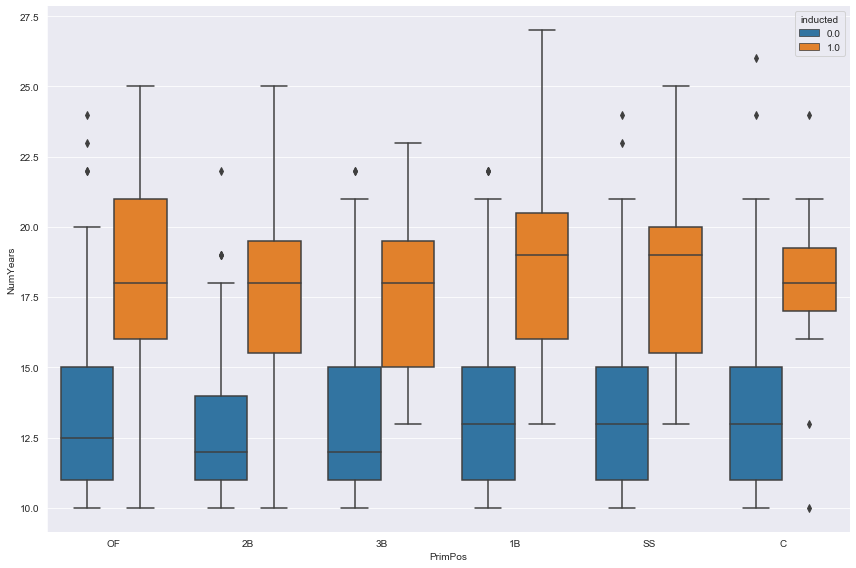

In [10]:
catplot(df_pos_play, 'PrimPos', 'NumYears', 'inducted')

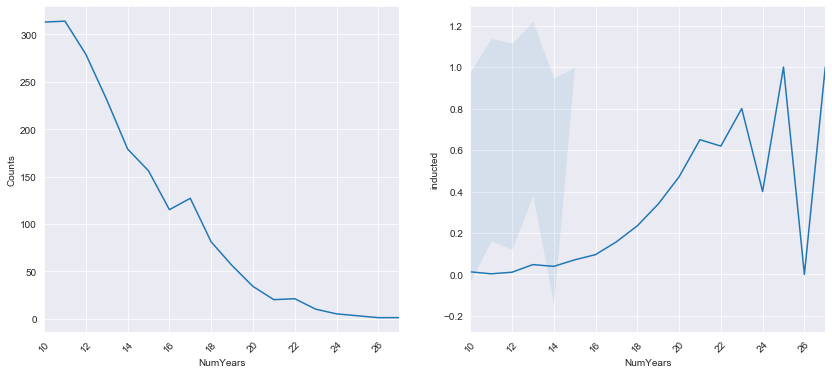

In [11]:
plot_feature(df_pos_play, 'NumYears', 'inducted')

There appears to be a positive correlation between years played and induction into the HOF. Investigation of potential outliers.

In [12]:
get_bin_members(df_pos_play, 'NumYears', '10')

25.0 < NumYears <= 27.0 
                 inducted  NumYears bin
Name                                  
Cap Anson          1.000        27  10
Deacon McGuire     0.000        26  10


Deacon McGuire played mainly in the 19th century. His career spanned 1884-1912, but after 1906 he was primarily a manager and only occasionally put himself into the game as a player. 

The final game of his career was part of a bizarre situation. The Detroit Tigers, in protest over the suspension of star player Ty Cobb, went on strike. Threatened by American League President Ban Johnson with a fine if the team forfeited, Tigers manager rounded up anyone he could to play; college players, semipro players and a boxer joined the Tigers coaching staff and were trounced by the Philadelphia Athletics by the score of 24-2. A 20 year old student from St. Joseph’s College, Allan Travers, pitched the entire game for the Tigers. It was the only professional apperance of his career and he later became a Catholic priest.

The unusual circumstances of the final 4 seasons of McGuire's career, combined with the shorter seasons of the 19th contribute to an unusual relationship between seasons played and other playing time metrics such as games played or at bats.

In [13]:
get_bin_members(df_pos_play, 'NumYears', '9')

24.0 < NumYears <= 25.0 
                   inducted  NumYears bin
Name                                    
Eddie Collins        1.000        25   9
Rickey Henderson     1.000        25   9
Bobby Wallace        1.000        25   9
Omar Vizquel         0.000        24   9
Rick Dempsey         0.000        24   9
Pete Rose            0.000        24   9
Carlton Fisk         1.000        24   9
Ty Cobb              1.000        24   9


Pete Rose had been banned for life from Major League Baseball for betting on games in violation of rule 21(d). He is also prohibited from being included on the BBWAA ballot for the HOF and in ineligible for induction regardless of his playing record. He will be removed from the data set.

In [14]:
df_pos_play = df_pos_play[df_pos_play['Name'] != 'Pete Rose']

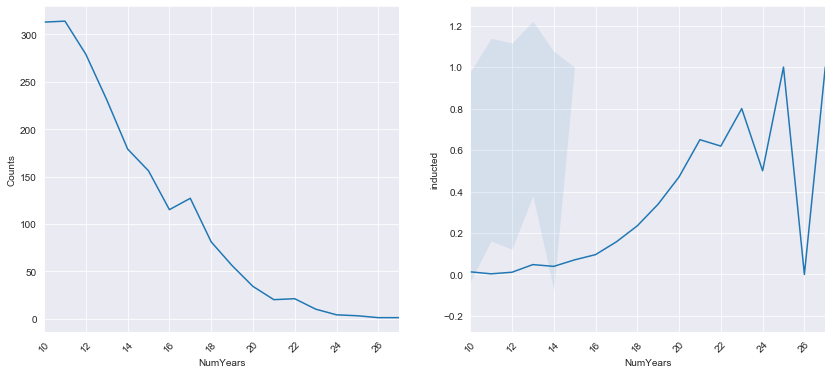

In [15]:
plot_feature(df_pos_play, 'NumYears', 'inducted')

In [16]:
get_bin_members(df_pos_play, 'NumYears', '10')

25.0 < NumYears <= 27.0 
                 inducted  NumYears bin
Name                                  
Cap Anson          1.000        27  10
Deacon McGuire     0.000        26  10


In [17]:
get_bin_members(df_pos_play, 'NumYears', '9')

24.0 < NumYears <= 25.0 
                   inducted  NumYears bin
Name                                    
Eddie Collins        1.000        25   9
Rickey Henderson     1.000        25   9
Bobby Wallace        1.000        25   9
Ty Cobb              1.000        24   9
Omar Vizquel         0.000        24   9
Rick Dempsey         0.000        24   9
Carlton Fisk         1.000        24   9


In [18]:
get_bin_members(df_pos_play, 'NumYears', '8')

22.0 < NumYears <= 24.0 
                    inducted  NumYears bin
Name                                     
Tony Perez            1.000        23   8
Jim O'Rourke          1.000        23   8
Rabbit Maranville     1.000        23   8
Hank Aaron            1.000        23   8
Tim Raines            1.000        23   8
Brooks Robinson       1.000        23   8
Rusty Staub           0.000        23   8
Rogers Hornsby        1.000        23   8
Julio Franco          0.000        23   8
Carl Yastrzemski      1.000        23   8
Harry Davis           0.000        22   8
Harold Baines         1.000        22   8
Willie McCovey        1.000        22   8
Harmon Killebrew      1.000        22   8
Phil Cavarretta       0.000        22   8
Joe Morgan            1.000        22   8
Jim Thome             1.000        22   8
Stan Musial           1.000        22   8
Graig Nettles         0.000        22   8
Mel Ott               1.000        22   8
Bill Buckner          0.000        22   8
Babe Rut

### Offensive Measures
Features that measure offensive performance generally follow a consistent pattern, positively skewed with little or no correlation to inducted through roughly the median, then increasing positive correlation as feature values increase. This is true even of the negative statistics, such as Caught Stealing (CS), Strikeouts (SO), and Grounded into Double Plays (GDP), although the correlation is not as strong. This suggests that having a long career is paramount to being inducted to the HOF, which is intuitive and consistent with the correlation seen between number of years played and induction.

#### Games Played (G)

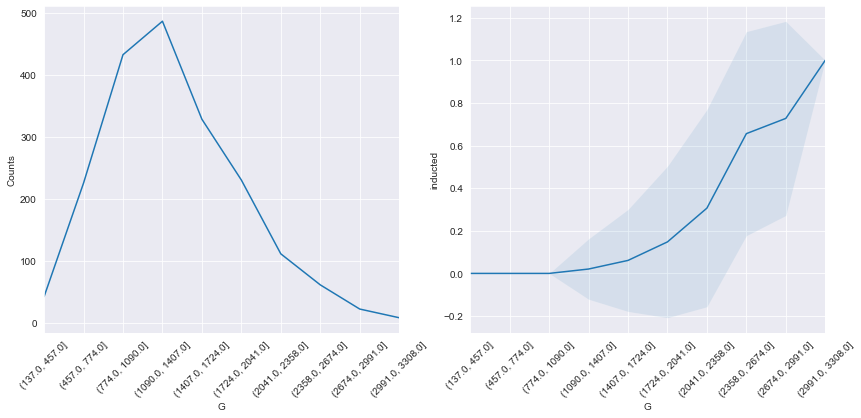

In [33]:
plot_feature(df_pos_play, 'G', 'inducted')

In [34]:
get_bin_members(df_pos_play, 'G', '10')

2991.0 < G <= 3308.0 
                   inducted        G bin
Name                                   
Carl Yastrzemski     1.000 3308.000  10
Hank Aaron           1.000 3298.000  10
Rickey Henderson     1.000 3081.000  10
Ty Cobb              1.000 3035.000  10
Stan Musial          1.000 3026.000  10
Eddie Murray         1.000 3026.000  10
Cal Ripken           1.000 3001.000  10
Willie Mays          1.000 2992.000  10


In [35]:
get_bin_members(df_pos_play, 'G', '9')

2674.0 < G <= 2991.0 
                  inducted        G bin
Name                                  
Barry Bonds         0.000 2986.000   9
Dave Winfield       1.000 2973.000   9
Omar Vizquel        0.000 2968.000   9
Rusty Staub         0.000 2951.000   9
Brooks Robinson     1.000 2896.000   9
Robin Yount         1.000 2856.000   9
Craig Biggio        1.000 2850.000   9
Al Kaline           1.000 2834.000   9
Rafael Palmeiro     0.000 2831.000   9
Harold Baines       1.000 2830.000   9
Eddie Collins       1.000 2826.000   9
Reggie Jackson      1.000 2820.000   9
Frank Robinson      1.000 2808.000   9
Honus Wagner        1.000 2794.000   9
Tris Speaker        1.000 2789.000   9
Tony Perez          1.000 2777.000   9
Derek Jeter         1.000 2747.000   9
Mel Ott             1.000 2730.000   9
George Brett        1.000 2707.000   9
Graig Nettles       0.000 2700.000   9
Darrell Evans       0.000 2687.000   9
Paul Molitor        1.000 2683.000   9


Barry Bonds and Rafael Palmeiro were linked to the use of performance enhancing drugs (PEDs) during their playing careers. In 2007, the report of the investigation into PED use in MLB, led by John Mitchell, was released. Dozens of players were implicated. Bonds was linked to the BALCO labs who had been raided in 2003, leading to indictments and convictions of several BALCO executives, trainers and associated coaches. The Mitchell Report also detailed Palmeiro's  failed PED test and resulting suspension in 2005.

Many BBWAA voters have publicly stated that they haven't and won't vote for known PED users, which has clearly impacted the likelihood of those players' induction into the HOF. To date, no player named in the Mitchell Report or having been suspended for a failed PED test has been inducted to the HOF. These players are still eligible for induction, are included on the ballot and receive some votes. We will revisit this group of players later to investigate the impact of PED use on predicting HOF induction.

http://files.mlb.com/mitchrpt.pdf

#### At Bats (AB)

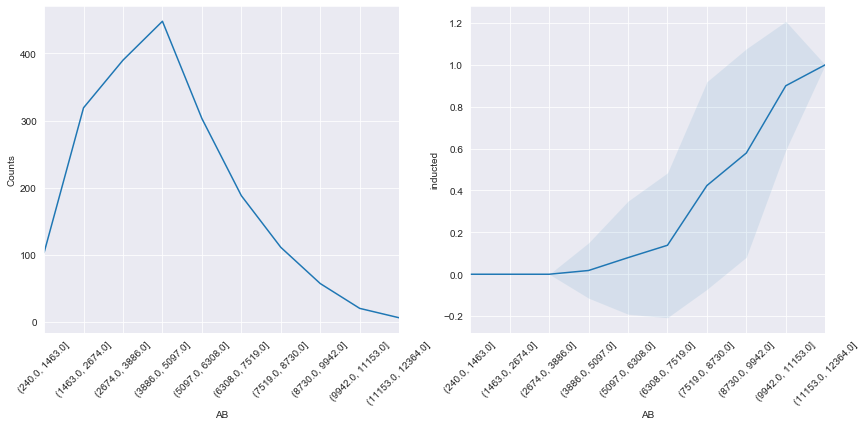

In [36]:
plot_feature(df_pos_play, 'AB', 'inducted')

In [37]:
get_bin_members(df_pos_play, 'AB', '10')

11153.0 < AB <= 12364.0 
                   inducted        AB bin
Name                                    
Hank Aaron           1.000 12364.000  10
Carl Yastrzemski     1.000 11988.000  10
Cal Ripken           1.000 11551.000  10
Ty Cobb              1.000 11436.000  10
Eddie Murray         1.000 11336.000  10
Derek Jeter          1.000 11195.000  10


In [38]:
get_bin_members(df_pos_play, 'AB', '9')

9942.0 < AB <= 11153.0 
                    inducted        AB bin
Name                                     
Robin Yount           1.000 11008.000   9
Dave Winfield         1.000 11003.000   9
Stan Musial           1.000 10972.000   9
Rickey Henderson      1.000 10961.000   9
Willie Mays           1.000 10881.000   9
Craig Biggio          1.000 10876.000   9
Paul Molitor          1.000 10835.000   9
Brooks Robinson       1.000 10654.000   9
Omar Vizquel          0.000 10586.000   9
Rafael Palmeiro       0.000 10472.000   9
Honus Wagner          1.000 10439.000   9
George Brett          1.000 10349.000   9
Lou Brock             1.000 10332.000   9
Cap Anson             1.000 10281.000   9
Luis Aparicio         1.000 10230.000   9
Tris Speaker          1.000 10195.000   9
Al Kaline             1.000 10116.000   9
Rabbit Maranville     1.000 10078.000   9
Frank Robinson        1.000 10006.000   9
Eddie Collins         1.000  9949.000   9


In [39]:
get_bin_members(df_pos_play, 'AB', '8')

8730.0 < AB <= 9942.0 
                    inducted       AB bin
Name                                    
Andre Dawson          1.000 9927.000   8
Harold Baines         1.000 9908.000   8
Reggie Jackson        1.000 9864.000   8
Barry Bonds           0.000 9847.000   8
Ken Griffey           1.000 9801.000   8
Tony Perez            1.000 9778.000   8
Johnny Damon          0.000 9736.000   8
Rusty Staub           0.000 9720.000   8
Vada Pinson           0.000 9645.000   8
Ivan Rodriguez        1.000 9592.000   8
Nap Lajoie            1.000 9590.000   8
Sam Crawford          1.000 9570.000   8
Jake Beckley          1.000 9551.000   8
Paul Waner            1.000 9459.000   8
Mel Ott               1.000 9456.000   8
Roberto Clemente      1.000 9454.000   8
Ernie Banks           1.000 9421.000   8
Steve Finley          0.000 9397.000   8
Bill Buckner          0.000 9397.000   8
Ozzie Smith           1.000 9396.000   8
Max Carey             1.000 9363.000   8
Dave Parker           0.000 9358.

#### Runs Scored (R)

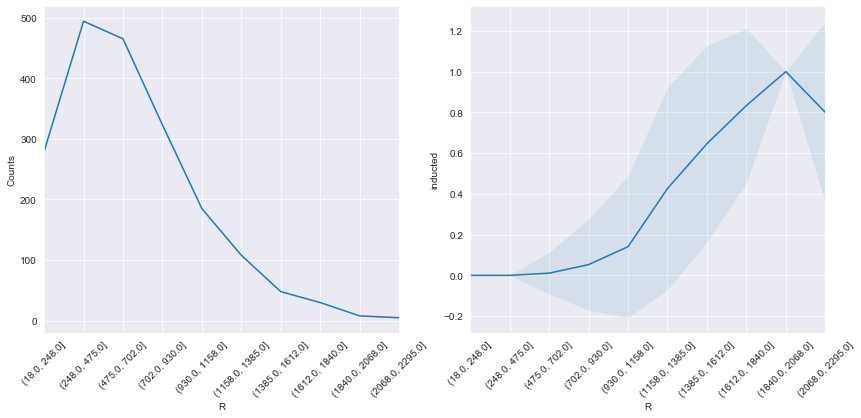

In [40]:
plot_feature(df_pos_play, 'R', 'inducted')

In [41]:
get_bin_members(df_pos_play, 'R', '10')

2068.0 < R <= 2295.0 
                   inducted        R bin
Name                                   
Rickey Henderson     1.000 2295.000  10
Ty Cobb              1.000 2247.000  10
Barry Bonds          0.000 2227.000  10
Hank Aaron           1.000 2174.000  10
Babe Ruth            1.000 2174.000  10


In [42]:
get_bin_members(df_pos_play, 'R', '9')

1840.0 < R <= 2068.0 
               inducted        R bin
Name                               
Willie Mays      1.000 2062.000   9
Cap Anson        1.000 1999.000   9
Stan Musial      1.000 1949.000   9
Derek Jeter      1.000 1923.000   9
Lou Gehrig       1.000 1888.000   9
Tris Speaker     1.000 1882.000   9
Mel Ott          1.000 1859.000   9
Craig Biggio     1.000 1844.000   9


In [43]:
get_bin_members(df_pos_play, 'R', '8')

1612.0 < R <= 1840.0 
                     inducted        R bin
Name                                     
Frank Robinson         1.000 1829.000   8
Eddie Collins          1.000 1821.000   8
Carl Yastrzemski       1.000 1816.000   8
Ted Williams           1.000 1798.000   8
Paul Molitor           1.000 1782.000   8
Charlie Gehringer      1.000 1774.000   8
Jimmie Foxx            1.000 1751.000   8
Honus Wagner           1.000 1739.000   8
Jim O'Rourke           1.000 1729.000   8
Jesse Burkett          1.000 1720.000   8
Willie Keeler          1.000 1719.000   8
Billy Hamilton         1.000 1697.000   8
Bid McPhee             1.000 1684.000   8
Mickey Mantle          1.000 1677.000   8
Dave Winfield          1.000 1669.000   8
Johnny Damon           0.000 1668.000   8
Rafael Palmeiro        0.000 1663.000   8
Ken Griffey            1.000 1662.000   8
Joe Morgan             1.000 1650.000   8
Cal Ripken             1.000 1647.000   8
Jimmy Ryan             0.000 1643.000   8
George Van 

#### Hits (H)

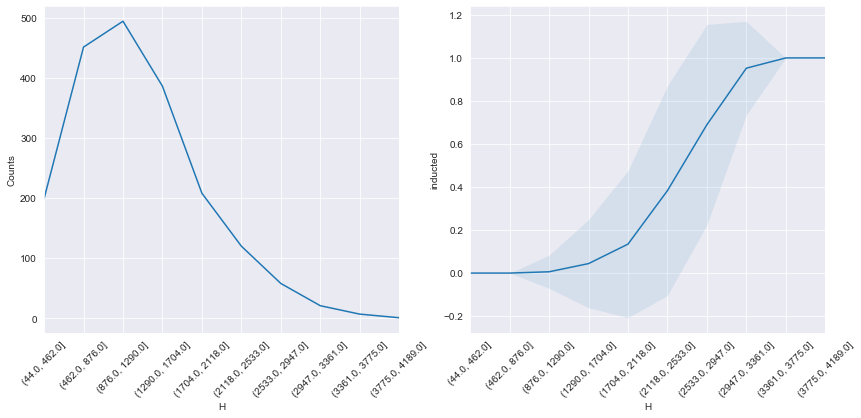

In [44]:
plot_feature(df_pos_play, 'H', 'inducted')

In [45]:
get_bin_members(df_pos_play, 'H', '10')

3775.0 < H <= 4189.0 
          inducted        H bin
Name                          
Ty Cobb     1.000 4189.000  10


In [46]:
get_bin_members(df_pos_play, 'H', '9')

3361.0 < H <= 3775.0 
                   inducted        H bin
Name                                   
Hank Aaron           1.000 3771.000   9
Stan Musial          1.000 3630.000   9
Tris Speaker         1.000 3514.000   9
Derek Jeter          1.000 3465.000   9
Cap Anson            1.000 3435.000   9
Honus Wagner         1.000 3420.000   9
Carl Yastrzemski     1.000 3419.000   9


In [47]:
get_bin_members(df_pos_play, 'H', '8')

2947.0 < H <= 3361.0 
                   inducted        H bin
Name                                   
Paul Molitor         1.000 3319.000   8
Eddie Collins        1.000 3315.000   8
Willie Mays          1.000 3283.000   8
Eddie Murray         1.000 3255.000   8
Nap Lajoie           1.000 3243.000   8
Cal Ripken           1.000 3184.000   8
George Brett         1.000 3154.000   8
Paul Waner           1.000 3152.000   8
Robin Yount          1.000 3142.000   8
Tony Gwynn           1.000 3141.000   8
Dave Winfield        1.000 3110.000   8
Craig Biggio         1.000 3060.000   8
Rickey Henderson     1.000 3055.000   8
Rod Carew            1.000 3053.000   8
Lou Brock            1.000 3023.000   8
Rafael Palmeiro      0.000 3020.000   8
Wade Boggs           1.000 3010.000   8
Al Kaline            1.000 3007.000   8
Roberto Clemente     1.000 3000.000   8
Sam Rice             1.000 2987.000   8
Sam Crawford         1.000 2961.000   8


#### Doubles

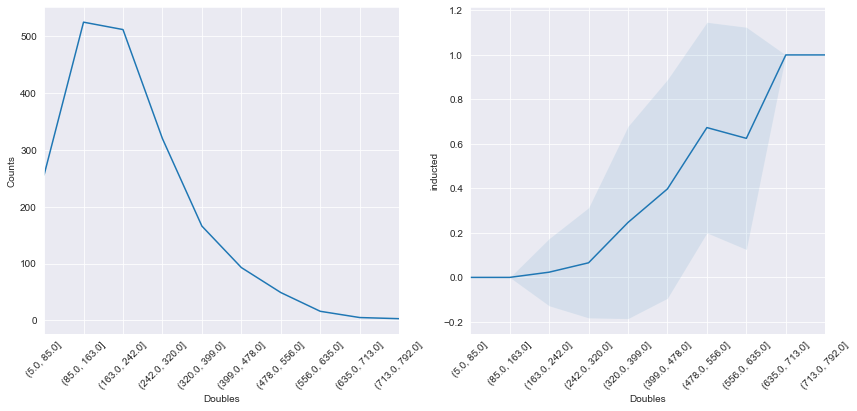

In [48]:
plot_feature(df_pos_play, 'Doubles', 'inducted')

In [49]:
get_bin_members(df_pos_play, 'Doubles', '10')

713.0 < Doubles <= 792.0 
               inducted  Doubles bin
Name                               
Tris Speaker     1.000  792.000  10
Stan Musial      1.000  725.000  10
Ty Cobb          1.000  724.000  10


In [50]:
get_bin_members(df_pos_play, 'Doubles', '9')

635.0 < Doubles <= 713.0 
                   inducted  Doubles bin
Name                                   
Craig Biggio         1.000  668.000   9
George Brett         1.000  665.000   9
Nap Lajoie           1.000  657.000   9
Carl Yastrzemski     1.000  646.000   9
Honus Wagner         1.000  643.000   9


In [51]:
get_bin_members(df_pos_play, 'Doubles', '8')

556.0 < Doubles <= 635.0 
                    inducted  Doubles bin
Name                                    
Hank Aaron            1.000  624.000   8
Paul Molitor          1.000  605.000   8
Paul Waner            1.000  605.000   8
Cal Ripken            1.000  603.000   8
Barry Bonds           0.000  601.000   8
Luis Gonzalez         0.000  596.000   8
Todd Helton           0.000  592.000   8
Rafael Palmeiro       0.000  585.000   8
Robin Yount           1.000  583.000   8
Cap Anson             1.000  582.000   8
Wade Boggs            1.000  578.000   8
Bobby Abreu           0.000  574.000   8
Charlie Gehringer     1.000  574.000   8
Ivan Rodriguez        1.000  572.000   8
Eddie Murray          1.000  560.000   8
Jeff Kent             0.000  560.000   8


#### Triples

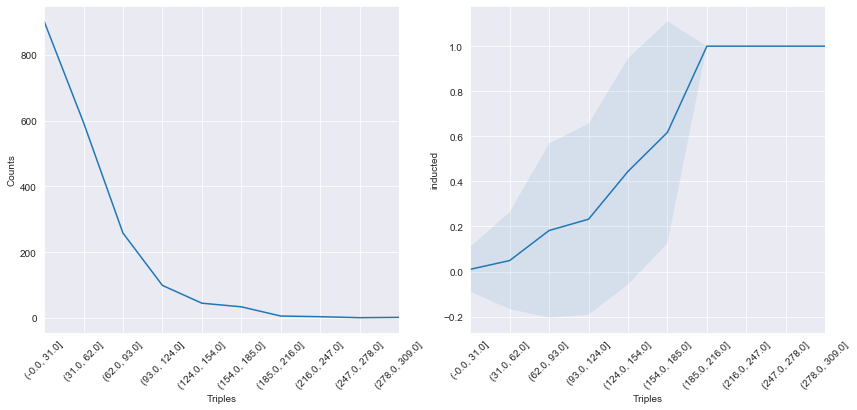

In [52]:
plot_feature(df_pos_play, 'Triples', 'inducted')

In [53]:
get_bin_members(df_pos_play, 'Triples', '10')

278.0 < Triples <= 309.0 
               inducted  Triples bin
Name                               
Sam Crawford     1.000  309.000  10
Ty Cobb          1.000  295.000  10


In [54]:
get_bin_members(df_pos_play, 'Triples', '9')

247.0 < Triples <= 278.0 
               inducted  Triples bin
Name                               
Honus Wagner     1.000  252.000   9


In [55]:
get_bin_members(df_pos_play, 'Triples', '8')

216.0 < Triples <= 247.0 
               inducted  Triples bin
Name                               
Jake Beckley     1.000  244.000   8
Roger Connor     1.000  233.000   8
Tris Speaker     1.000  222.000   8
Fred Clarke      1.000  220.000   8


#### Home Runs (HR)

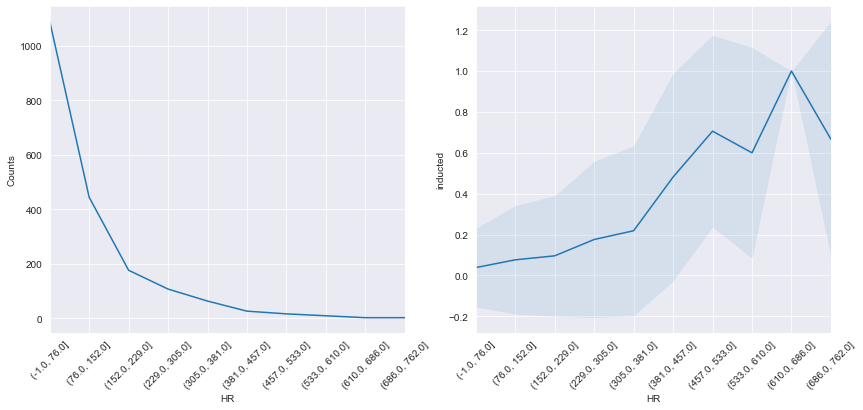

In [56]:
plot_feature(df_pos_play, 'HR', 'inducted')

In [57]:
get_bin_members(df_pos_play, 'HR', '10')

686.0 < HR <= 762.0 
              inducted      HR bin
Name                             
Barry Bonds     0.000 762.000  10
Hank Aaron      1.000 755.000  10
Babe Ruth       1.000 714.000  10


In [58]:
get_bin_members(df_pos_play, 'HR', '9')

610.0 < HR <= 686.0 
              inducted      HR bin
Name                             
Willie Mays     1.000 660.000   9
Ken Griffey     1.000 630.000   9
Jim Thome       1.000 612.000   9


In [59]:
get_bin_members(df_pos_play, 'HR', '8')

533.0 < HR <= 610.0 
                   inducted      HR bin
Name                                  
Sammy Sosa           0.000 609.000   8
Frank Robinson       1.000 586.000   8
Mark McGwire         0.000 583.000   8
Harmon Killebrew     1.000 573.000   8
Rafael Palmeiro      0.000 569.000   8
Reggie Jackson       1.000 563.000   8
Manny Ramirez        0.000 555.000   8
Mike Schmidt         1.000 548.000   8
Mickey Mantle        1.000 536.000   8
Jimmie Foxx          1.000 534.000   8


Home Runs is the feature which is most likely to be impacted by PED use. Prior to the steroid era, having 500 HR's typically meant automatic induction into the HOF. 

Barry Bonds, Mark McGwire, Rafael Palmeiro and Manny Ramirez are all known PED users. They were either named in the Mitchell Report, failed a drug test or, in McGwire's case, admitted to PED use after retiring as a player. Sammy Sosa is widely suspected to be a PED user and was linked to a failed test in 2003, when player's were supposed to have been tested anonymously, but data was kept that linked players to specific samples and some player names were leaked to the media. 

#### Runs Batted In (RBI)

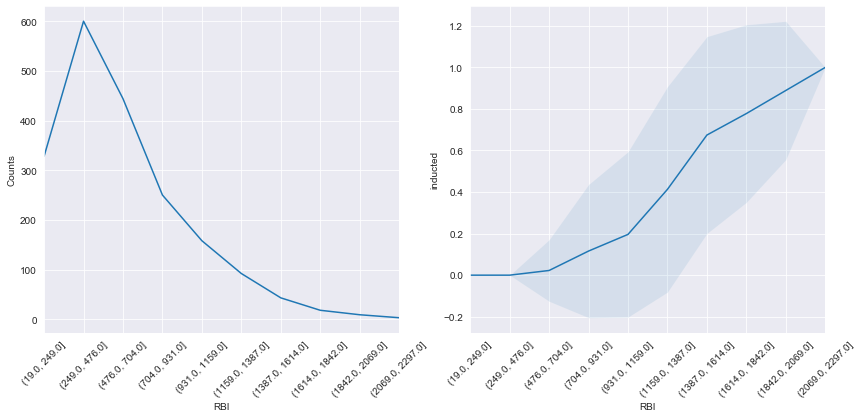

In [60]:
plot_feature(df_pos_play, 'RBI', 'inducted')

In [61]:
get_bin_members(df_pos_play, 'RBI', '10')

2069.0 < RBI <= 2297.0 
             inducted      RBI bin
Name                             
Hank Aaron     1.000 2297.000  10
Babe Ruth      1.000 2217.000  10
Cap Anson      1.000 2075.000  10


In [62]:
get_bin_members(df_pos_play, 'RBI', '9')

1842.0 < RBI <= 2069.0 
                   inducted      RBI bin
Name                                   
Barry Bonds          0.000 1996.000   9
Lou Gehrig           1.000 1995.000   9
Stan Musial          1.000 1951.000   9
Ty Cobb              1.000 1944.000   9
Jimmie Foxx          1.000 1922.000   9
Eddie Murray         1.000 1917.000   9
Willie Mays          1.000 1903.000   9
Mel Ott              1.000 1860.000   9
Carl Yastrzemski     1.000 1844.000   9


In [63]:
get_bin_members(df_pos_play, 'RBI', '8')

1614.0 < RBI <= 1842.0 
                  inducted      RBI bin
Name                                  
Ted Williams        1.000 1839.000   8
Ken Griffey         1.000 1836.000   8
Rafael Palmeiro     0.000 1835.000   8
Dave Winfield       1.000 1833.000   8
Manny Ramirez       0.000 1831.000   8
Al Simmons          1.000 1827.000   8
Frank Robinson      1.000 1812.000   8
Honus Wagner        1.000 1733.000   8
Frank Thomas        1.000 1704.000   8
Reggie Jackson      1.000 1702.000   8
Jim Thome           1.000 1699.000   8
Cal Ripken          1.000 1695.000   8
Gary Sheffield      0.000 1676.000   8
Sammy Sosa          0.000 1667.000   8
Tony Perez          1.000 1652.000   8
Ernie Banks         1.000 1636.000   8
Harold Baines       1.000 1628.000   8
Chipper Jones       1.000 1623.000   8


#### Stolen Bases (SB)

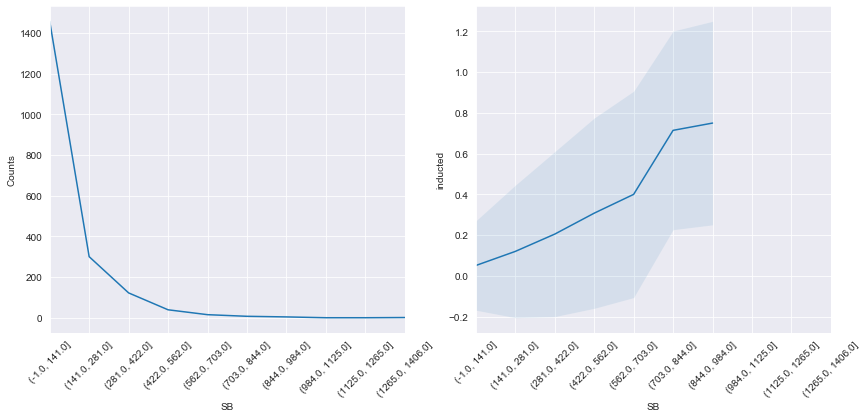

In [64]:
plot_feature(df_pos_play, 'SB', 'inducted')

In [65]:
get_bin_members(df_pos_play, 'SB', '10')

1265.0 < SB <= 1406.0 
                   inducted       SB bin
Name                                   
Rickey Henderson     1.000 1406.000  10


In [66]:
get_bin_members(df_pos_play, 'SB', '9')

1125.0 < SB <= 1265.0 
 Empty DataFrame
Columns: [inducted, SB, bin]
Index: []


In [67]:
get_bin_members(df_pos_play, 'SB', '8')

984.0 < SB <= 1125.0 
 Empty DataFrame
Columns: [inducted, SB, bin]
Index: []


In [68]:
get_bin_members(df_pos_play, 'SB', '7')

844.0 < SB <= 984.0 
                 inducted      SB bin
Name                                
Lou Brock          1.000 938.000   7
Billy Hamilton     1.000 914.000   7
Ty Cobb            1.000 896.000   7
Arlie Latham       0.000 844.000   7


In [69]:
#Calculate Rickey Henderson's z-score for SB
z = (df_pos_play[df_pos_play['Name'] == 'Rickey Henderson']['SB'] - df_pos_play.SB.mean()) / df_pos_play.SB.std()
print(z)

771   9.901
Name: SB, dtype: float64


Stolen Bases have a correlation which is more linear than other offensive measures, showing more of a positive correlation in the lower deciles.

Stolen Bases are also unusual in that the career leader, Rickey Henderson, is 9.845 standard deviations above the mean.

#### Caught Stealing (CS)

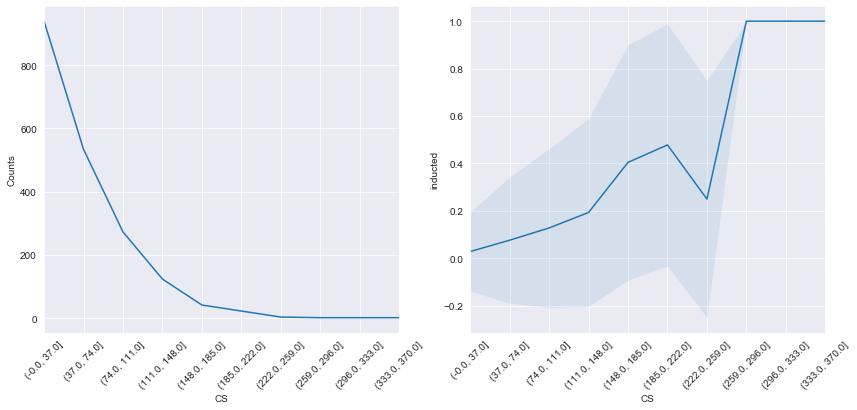

In [70]:
plot_feature(df_pos_play, 'CS', 'inducted')

In [71]:
get_bin_members(df_pos_play, 'CS', '10')

333.0 < CS <= 370.0 
                   inducted      CS bin
Name                                  
Ty Cobb              1.000 370.000  10
Rickey Henderson     1.000 335.000  10


In [72]:
get_bin_members(df_pos_play, 'CS', '9')

296.0 < CS <= 333.0 
                inducted      CS bin
Name                               
Eddie Collins     1.000 331.000   9
Lou Brock         1.000 307.000   9


In [73]:
get_bin_members(df_pos_play, 'CS', '8')

259.0 < CS <= 296.0 
                 inducted      CS bin
Name                                
Honus Wagner       1.000 268.000   8
Billy Hamilton     1.000 261.000   8


In [74]:
get_bin_members(df_pos_play, 'CS', '7')

222.0 < CS <= 259.0 
               inducted      CS bin
Name                              
Brett Butler     0.000 257.000   7
Arlie Latham     0.000 245.000   7
Tris Speaker     1.000 239.000   7
Tom Brown        0.000 234.000   7


#### Bases on Balls (BB)

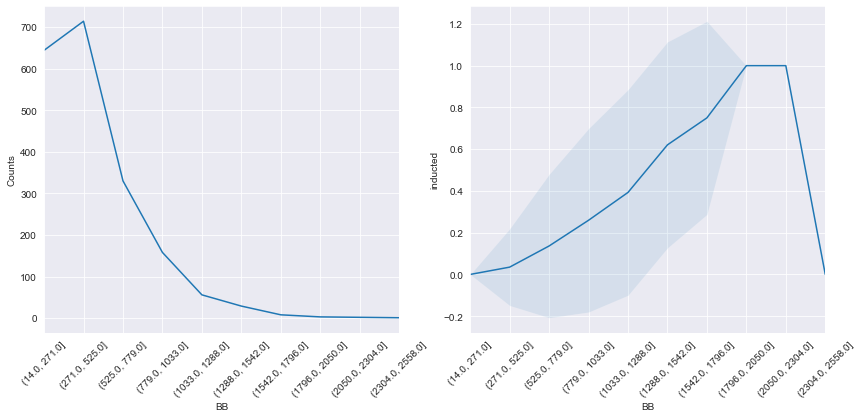

In [75]:
plot_feature(df_pos_play, 'BB', 'inducted')

In [76]:
get_bin_members(df_pos_play, 'BB', '10')

2304.0 < BB <= 2558.0 
              inducted       BB bin
Name                              
Barry Bonds     0.000 2558.000  10


In [77]:
get_bin_members(df_pos_play, 'BB', '9')

2050.0 < BB <= 2304.0 
                   inducted       BB bin
Name                                   
Rickey Henderson     1.000 2190.000   9
Babe Ruth            1.000 2062.000   9


In [78]:
get_bin_members(df_pos_play, 'BB', '8')

1796.0 < BB <= 2050.0 
                   inducted       BB bin
Name                                   
Ted Williams         1.000 2021.000   8
Joe Morgan           1.000 1865.000   8
Carl Yastrzemski     1.000 1845.000   8


#### Strikeouts (SO)

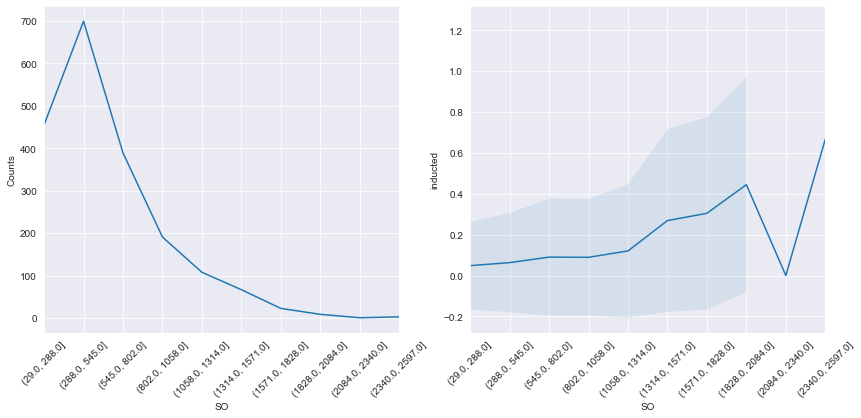

In [79]:
plot_feature(df_pos_play, 'SO', 'inducted')

In [80]:
get_bin_members(df_pos_play, 'SO', '10')

2340.0 < SO <= 2597.0 
                 inducted       SO bin
Name                                 
Reggie Jackson     1.000 2597.000  10
Jim Thome          1.000 2548.000  10
Adam Dunn          0.000 2379.000  10


In [81]:
get_bin_members(df_pos_play, 'SO', '9')

2084.0 < SO <= 2340.0 
             inducted       SO bin
Name                             
Sammy Sosa     0.000 2306.000   9


In [82]:
get_bin_members(df_pos_play, 'SO', '8')

1828.0 < SO <= 2084.0 
                   inducted       SO bin
Name                                   
Andres Galarraga     0.000 2003.000   8
Jose Canseco         0.000 1942.000   8
Willie Stargell      1.000 1936.000   8
Mike Cameron         0.000 1901.000   8
Mike Schmidt         1.000 1883.000   8
Fred McGriff         0.000 1882.000   8
Tony Perez           1.000 1867.000   8
Bobby Abreu          0.000 1840.000   8
Derek Jeter          1.000 1840.000   8


#### Intentional Bases on Balls (IBB)

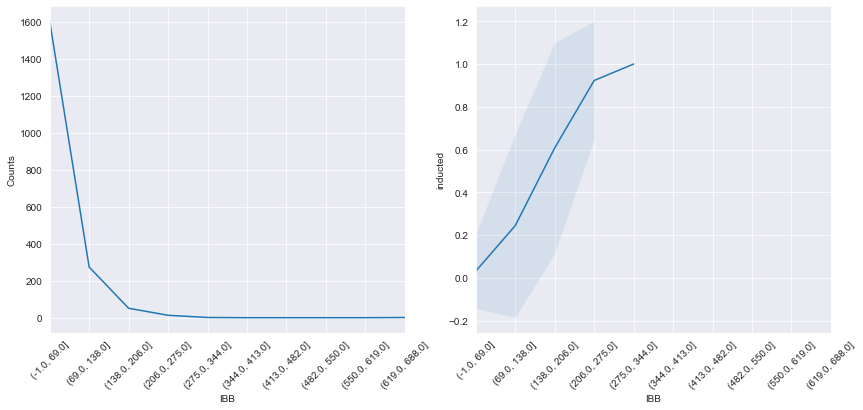

In [83]:
plot_feature(df_pos_play, 'IBB', 'inducted')

In [84]:
get_bin_members(df_pos_play, 'IBB', '10')

619.0 < IBB <= 688.0 
              inducted     IBB bin
Name                             
Barry Bonds     0.000 688.000  10


In [85]:
get_bin_members(df_pos_play, 'IBB', '9')

550.0 < IBB <= 619.0 
 Empty DataFrame
Columns: [inducted, IBB, bin]
Index: []


In [86]:
get_bin_members(df_pos_play, 'IBB', '8')

482.0 < IBB <= 550.0 
 Empty DataFrame
Columns: [inducted, IBB, bin]
Index: []


In [87]:
get_bin_members(df_pos_play, 'IBB', '7')

413.0 < IBB <= 482.0 
 Empty DataFrame
Columns: [inducted, IBB, bin]
Index: []


In [88]:
get_bin_members(df_pos_play, 'IBB', '6')

344.0 < IBB <= 413.0 
 Empty DataFrame
Columns: [inducted, IBB, bin]
Index: []


In [89]:
get_bin_members(df_pos_play, 'IBB', '5')

275.0 < IBB <= 344.0 
             inducted     IBB bin
Name                            
Hank Aaron     1.000 300.000   5


In [90]:
get_bin_members(df_pos_play, 'IBB', '4')

206.0 < IBB <= 275.0 
                    inducted     IBB bin
Name                                   
Stan Musial           1.000 266.000   4
Willie McCovey        1.000 260.000   4
Vladimir Guerrero     1.000 250.000   4
Ken Griffey           1.000 246.000   4
Ted Williams          1.000 245.000   4
George Brett          1.000 229.000   4
Babe Ruth             1.000 229.000   4
Willie Stargell       1.000 227.000   4
Eddie Murray          1.000 222.000   4
Frank Robinson        1.000 218.000   4
Manny Ramirez         0.000 216.000   4
Willie Mays           1.000 213.000   4
Ernie Banks           1.000 209.000   4


In [91]:
#Calculate RBarry Bonds' z-score for IBB
z = (df_pos_play[df_pos_play['Name'] == 'Barry Bonds']['IBB'] - df_pos_play.IBB.mean()) / df_pos_play.IBB.std()
print(z)

157   15.954
Name: IBB, dtype: float64


Similar to SB, IBB has one extreme outlier value. Barry Bonds career IBB total is 15.963 standard deviations above the mean.

#### Hit by Pitches (HBP)

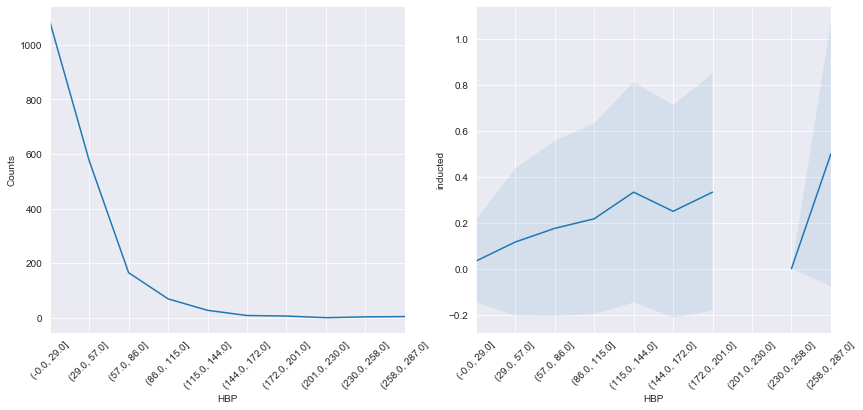

In [92]:
plot_feature(df_pos_play, 'HBP', 'inducted')

In [93]:
get_bin_members(df_pos_play, 'HBP', '10')

258.0 < HBP <= 287.0 
                  inducted     HBP bin
Name                                 
Hughie Jennings     1.000 287.000  10
Craig Biggio        1.000 285.000  10
Tommy Tucker        0.000 272.000  10
Don Baylor          0.000 267.000  10


In [94]:
get_bin_members(df_pos_play, 'HBP', '9')

230.0 < HBP <= 258.0 
                inducted     HBP bin
Name                               
Jason Kendall     0.000 254.000   9
Ron Hunt          0.000 243.000   9
Dan McGann        0.000 230.000   9


In [95]:
get_bin_members(df_pos_play, 'HBP', '8')

201.0 < HBP <= 230.0 
 Empty DataFrame
Columns: [inducted, HBP, bin]
Index: []


In [96]:
get_bin_members(df_pos_play, 'HBP', '7')

172.0 < HBP <= 201.0 
                   inducted     HBP bin
Name                                  
Frank Robinson       1.000 198.000   7
Minnie Minoso        0.000 192.000   7
Jake Beckley         1.000 183.000   7
Jason Giambi         0.000 180.000   7
Andres Galarraga     0.000 178.000   7
Curt Welch           0.000 173.000   7


HBP appears to have less correlation with induction than other offensive measures.

#### Sacrifice Hits (SH)

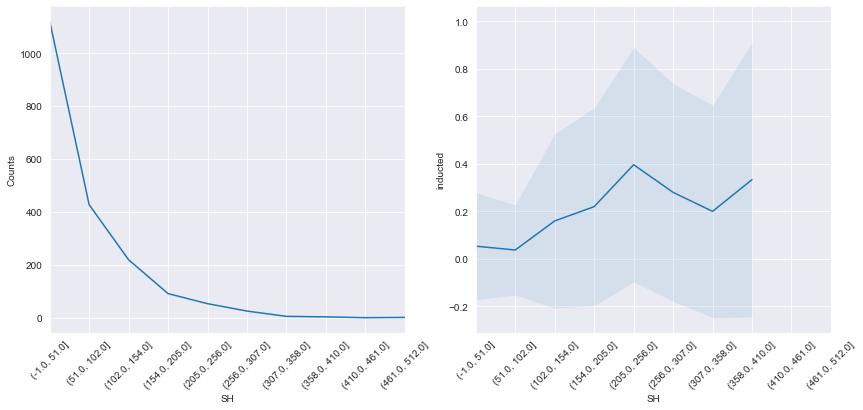

In [97]:
plot_feature(df_pos_play, 'SH', 'inducted')

In [98]:
get_bin_members(df_pos_play, 'SH', '10')

461.0 < SH <= 512.0 
                inducted      SH bin
Name                               
Eddie Collins     1.000 512.000  10


In [99]:
get_bin_members(df_pos_play, 'SH', '9')

410.0 < SH <= 461.0 
 Empty DataFrame
Columns: [inducted, SH, bin]
Index: []


In [100]:
get_bin_members(df_pos_play, 'SH', '8')

358.0 < SH <= 410.0 
                 inducted      SH bin
Name                                
Jake Daubert       0.000 392.000   8
Stuffy McInnis     0.000 383.000   8
Willie Keeler      1.000 368.000   8


SH appears to have less correlation with induction than other offensive measures.

#### Sacrifice Flies (SF)

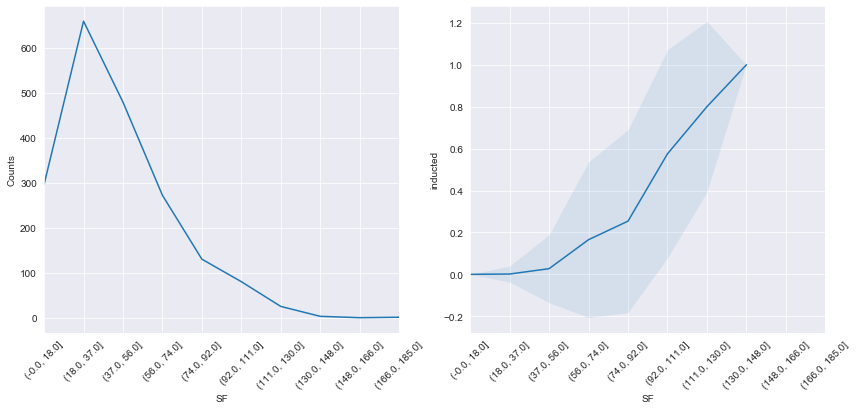

In [101]:
plot_feature(df_pos_play, 'SF', 'inducted')

In [102]:
get_bin_members(df_pos_play, 'SF', '10')

166.0 < SF <= 185.0 
            inducted      SF bin
Name                           
Cap Anson     1.000 185.000  10


In [103]:
get_bin_members(df_pos_play, 'SF', '9')

148.0 < SF <= 166.0 
 Empty DataFrame
Columns: [inducted, SF, bin]
Index: []


In [104]:
get_bin_members(df_pos_play, 'SF', '8')

130.0 < SF <= 148.0 
               inducted      SF bin
Name                              
Ty Cobb          1.000 142.000   8
Honus Wagner     1.000 138.000   8
Nap Lajoie       1.000 131.000   8


Sacrifice Flies were not an official MLB statistic until 1954. Many records prior to that were missing SF values and those values were imputed. Six of the eight players above have SF values that include imputed data.

#### Grounded into Double Plays (GIDP)

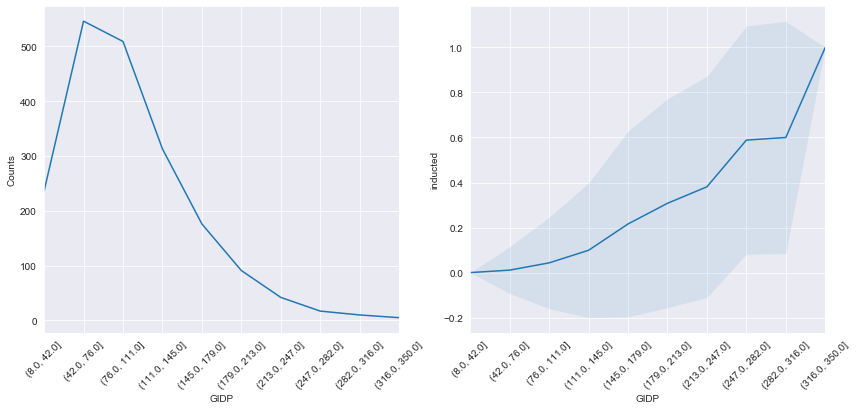

In [105]:
plot_feature(df_pos_play, 'GIDP', 'inducted')

In [106]:
get_bin_members(df_pos_play, 'GIDP', '10')

316.0 < GIDP <= 350.0 
                   inducted    GIDP bin
Name                                  
Cal Ripken           1.000 350.000  10
Ivan Rodriguez       1.000 337.000  10
Hank Aaron           1.000 328.000  10
Carl Yastrzemski     1.000 323.000  10
Dave Winfield        1.000 319.000  10


In [107]:
get_bin_members(df_pos_play, 'GIDP', '9')

282.0 < GIDP <= 316.0 
                  inducted    GIDP bin
Name                                 
Eddie Murray        1.000 315.000   9
Jim Rice            1.000 315.000   9
Julio Franco        0.000 312.000   9
Harold Baines       1.000 298.000   9
Rusty Staub         0.000 297.000   9
Brooks Robinson     1.000 297.000   9
Ted Simmons         1.000 287.000   9
Derek Jeter         1.000 287.000   9
Joe Torre           0.000 284.000   9
Paul Konerko        0.000 282.000   9


In [108]:
get_bin_members(df_pos_play, 'GIDP', '8')

247.0 < GIDP <= 282.0 
                    inducted    GIDP bin
Name                                   
George Scott          0.000 277.000   8
Ernie Lombardi        1.000 277.000   8
Miguel Tejada         0.000 277.000   8
Vladimir Guerrero     1.000 277.000   8
Roberto Clemente      1.000 275.000   8
Al Kaline             1.000 271.000   8
Frank Robinson        1.000 270.000   8
Tony Perez            1.000 268.000   8
Dave Concepcion       0.000 266.000   8
Tony Gwynn            1.000 259.000   8
Ron Santo             1.000 256.000   8
Buddy Bell            0.000 255.000   8
Al Oliver             0.000 254.000   8
Chipper Jones         1.000 253.000   8
Steve Garvey          0.000 251.000   8
Willie Mays           1.000 251.000   8
Ken Singleton         0.000 248.000   8


### Calculated Batting Features

#### Plate Appearances (PA) 

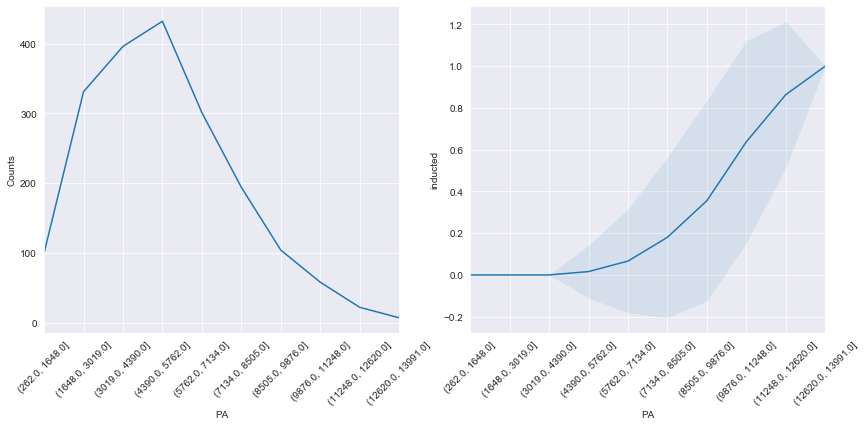

In [109]:
plot_feature(df_pos_play, 'PA', 'inducted')

In [110]:
get_bin_members(df_pos_play, 'PA', '10')

12620.0 < PA <= 13991.0 
                   inducted        PA bin
Name                                    
Carl Yastrzemski     1.000 13991.000  10
Hank Aaron           1.000 13940.000  10
Rickey Henderson     1.000 13346.000  10
Ty Cobb              1.000 13213.000  10
Cal Ripken           1.000 12883.000  10
Eddie Murray         1.000 12817.000  10
Stan Musial          1.000 12778.000  10


In [111]:
get_bin_members(df_pos_play, 'PA', '9')

11248.0 < PA <= 12620.0 
                    inducted        PA bin
Name                                     
Barry Bonds           0.000 12606.000   9
Derek Jeter           1.000 12602.000   9
Craig Biggio          1.000 12503.000   9
Willie Mays           1.000 12498.000   9
Dave Winfield         1.000 12358.000   9
Robin Yount           1.000 12249.000   9
Paul Molitor          1.000 12160.000   9
Eddie Collins         1.000 12139.000   9
Tris Speaker          1.000 12107.000   9
Rafael Palmeiro       0.000 12046.000   9
Omar Vizquel          0.000 12013.000   9
Honus Wagner          1.000 11886.000   9
Cap Anson             1.000 11810.000   9
Brooks Robinson       1.000 11782.000   9
Frank Robinson        1.000 11743.000   9
George Brett          1.000 11624.000   9
Al Kaline             1.000 11598.000   9
Mel Ott               1.000 11454.000   9
Reggie Jackson        1.000 11416.000   9
Rabbit Maranville     1.000 11339.000   9
Joe Morgan            1.000 11329.000   9
Ken Grif

In [112]:
get_bin_members(df_pos_play, 'PA', '8')

9876.0 < PA <= 11248.0 
                    inducted        PA bin
Name                                     
Lou Brock             1.000 11235.000   8
Luis Aparicio         1.000 11230.000   8
Rusty Staub           0.000 11229.000   8
Harold Baines         1.000 11092.000   8
Gary Sheffield        0.000 10947.000   8
Johnny Damon          0.000 10917.000   8
Tony Perez            1.000 10861.000   8
Paul Waner            1.000 10853.000   8
Max Carey             1.000 10842.000   8
Ozzie Smith           1.000 10778.000   8
Andre Dawson          1.000 10769.000   8
Babe Ruth             1.000 10742.000   8
Wade Boggs            1.000 10740.000   8
Darrell Evans         0.000 10737.000   8
Jake Beckley          1.000 10732.000   8
Sam Crawford          1.000 10721.000   8
Chipper Jones         1.000 10614.000   8
Nap Lajoie            1.000 10592.000   8
Dwight Evans          0.000 10569.000   8
Bill Dahlen           0.000 10557.000   8
Rod Carew             1.000 10550.000   8
Luis Gonz

#### Total Bases (TB)

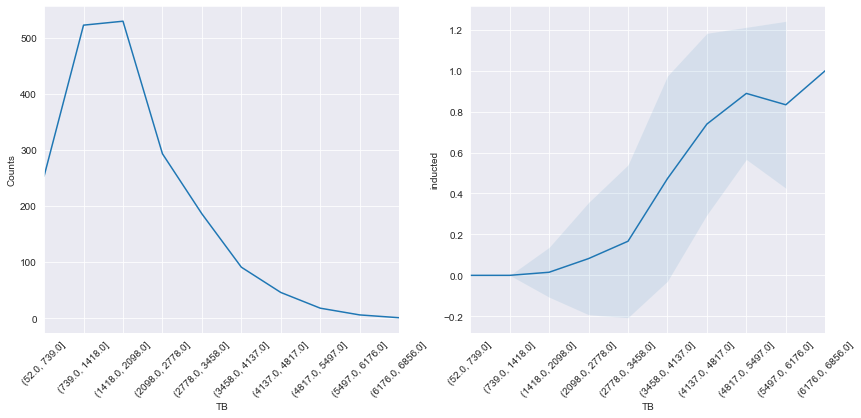

In [113]:
plot_feature(df_pos_play, 'TB', 'inducted')

In [114]:
get_bin_members(df_pos_play, 'TB', '10')

6176.0 < TB <= 6856.0 
             inducted       TB bin
Name                             
Hank Aaron     1.000 6856.000  10


In [115]:
get_bin_members(df_pos_play, 'TB', '9')

5497.0 < TB <= 6176.0 
                   inducted       TB bin
Name                                   
Stan Musial          1.000 6134.000   9
Willie Mays          1.000 6066.000   9
Barry Bonds          0.000 5976.000   9
Ty Cobb              1.000 5854.000   9
Babe Ruth            1.000 5793.000   9
Carl Yastrzemski     1.000 5539.000   9


In [116]:
get_bin_members(df_pos_play, 'TB', '8')

4817.0 < TB <= 5497.0 
                  inducted       TB bin
Name                                  
Eddie Murray        1.000 5397.000   8
Rafael Palmeiro     0.000 5388.000   8
Frank Robinson      1.000 5373.000   8
Ken Griffey         1.000 5271.000   8
Dave Winfield       1.000 5221.000   8
Cal Ripken          1.000 5168.000   8
Tris Speaker        1.000 5101.000   8
Lou Gehrig          1.000 5060.000   8
George Brett        1.000 5044.000   8
Mel Ott             1.000 5041.000   8
Jimmie Foxx         1.000 4956.000   8
Derek Jeter         1.000 4921.000   8
Ted Williams        1.000 4884.000   8
Honus Wagner        1.000 4870.000   8
Paul Molitor        1.000 4854.000   8
Al Kaline           1.000 4852.000   8
Reggie Jackson      1.000 4834.000   8
Manny Ramirez       0.000 4826.000   8


#### Batting Average (Avg)

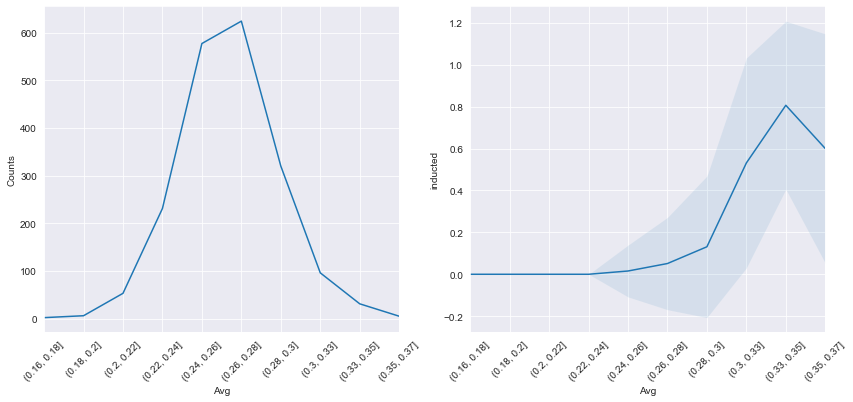

In [117]:
plot_feature(df_pos_play, 'Avg', 'inducted')

In [118]:
get_bin_members(df_pos_play, 'Avg', '10')

0.0 < Avg <= 0.0 
                       inducted   Avg bin
Name                                    
Ty Cobb                  1.000 0.366  10
Rogers Hornsby           1.000 0.358  10
Shoeless Joe Jackson     0.000 0.356  10
Lefty O'Doul             0.000 0.349  10
Ed Delahanty             1.000 0.346  10


In [119]:
get_bin_members(df_pos_play, 'Avg', '9')

0.0 < Avg <= 0.0 
                   inducted   Avg bin
Name                                
Tris Speaker         1.000 0.345   9
Billy Hamilton       1.000 0.344   9
Ted Williams         1.000 0.344   9
Dan Brouthers        1.000 0.342   9
Babe Ruth            1.000 0.342   9
Harry Heilmann       1.000 0.342   9
Pete Browning        0.000 0.341   9
Willie Keeler        1.000 0.341   9
Bill Terry           1.000 0.341   9
George Sisler        1.000 0.340   9
Lou Gehrig           1.000 0.340   9
Jesse Burkett        1.000 0.338   9
Tony Gwynn           1.000 0.338   9
Nap Lajoie           1.000 0.338   9
Riggs Stephenson     0.000 0.336   9
Al Simmons           1.000 0.334   9
Cap Anson            1.000 0.334   9
John McGraw          0.000 0.334   9
Paul Waner           1.000 0.333   9
Eddie Collins        1.000 0.333   9
Mike Donlin          0.000 0.333   9
Sam Thompson         1.000 0.331   9
Stan Musial          1.000 0.331   9
Heinie Manush        1.000 0.330   9
Wade Boggs         

In [120]:
get_bin_members(df_pos_play, 'Avg', '8')

0.0 < Avg <= 0.0 
                 inducted   Avg bin
Name                              
Earle Combs        1.000 0.325   8
Joe DiMaggio       1.000 0.325   8
Babe Herman        0.000 0.324   8
Joe Medwick        1.000 0.324   8
Edd Roush          1.000 0.323   8
...                  ...   ...  ..
Ernie Lombardi     1.000 0.306   8
Ralph Garr         0.000 0.306   8
Hank Aaron         1.000 0.305   8
Chick Stahl        0.000 0.305   8
George Brett       1.000 0.305   8

[96 rows x 3 columns]


#### On Base Percentage (OBP)

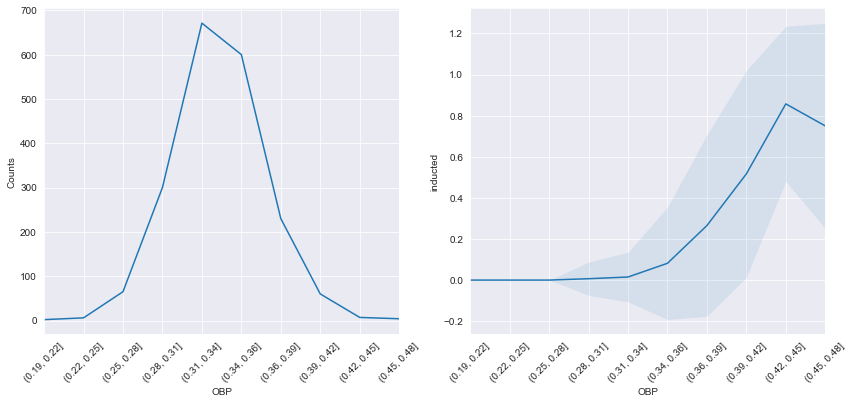

In [121]:
plot_feature(df_pos_play, 'OBP', 'inducted')

In [122]:
get_bin_members(df_pos_play, 'OBP', '10')

0.0 < OBP <= 0.0 
                 inducted   OBP bin
Name                              
Ted Williams       1.000 0.478  10
Babe Ruth          1.000 0.468  10
John McGraw        0.000 0.462  10
Billy Hamilton     1.000 0.452  10


In [123]:
get_bin_members(df_pos_play, 'OBP', '9')

0.0 < OBP <= 0.0 
                 inducted   OBP bin
Name                              
Barry Bonds        0.000 0.444   9
Lou Gehrig         1.000 0.442   9
Rogers Hornsby     1.000 0.429   9
Ty Cobb            1.000 0.428   9
Tris Speaker       1.000 0.424   9
Jimmie Foxx        1.000 0.423   9
Eddie Collins      1.000 0.421   9


In [124]:
get_bin_members(df_pos_play, 'OBP', '8')

0.0 < OBP <= 0.0 
                       inducted   OBP bin
Name                                    
Max Bishop               0.000 0.420   8
Mickey Mantle            1.000 0.420   8
Dan Brouthers            1.000 0.420   8
Frank Thomas             1.000 0.419   8
Shoeless Joe Jackson     0.000 0.418   8
Edgar Martinez           1.000 0.418   8
Wade Boggs               1.000 0.415   8
Mickey Cochrane          1.000 0.415   8
Stan Musial              1.000 0.415   8
Todd Helton              0.000 0.414   8
Cupid Childs             0.000 0.412   8
Jesse Burkett            1.000 0.412   8
Roy Thomas               0.000 0.412   8
Manny Ramirez            0.000 0.411   8
Mel Ott                  1.000 0.410   8
Lefty O'Doul             0.000 0.409   8
Jeff Bagwell             1.000 0.408   8
Eddie Stanky             0.000 0.407   8
Hank Greenberg           1.000 0.407   8
Jackie Robinson          1.000 0.406   8
Lance Berkman            0.000 0.406   8
Charlie Keller           0.000 0.406  

#### Slugging Percentage (Slg)

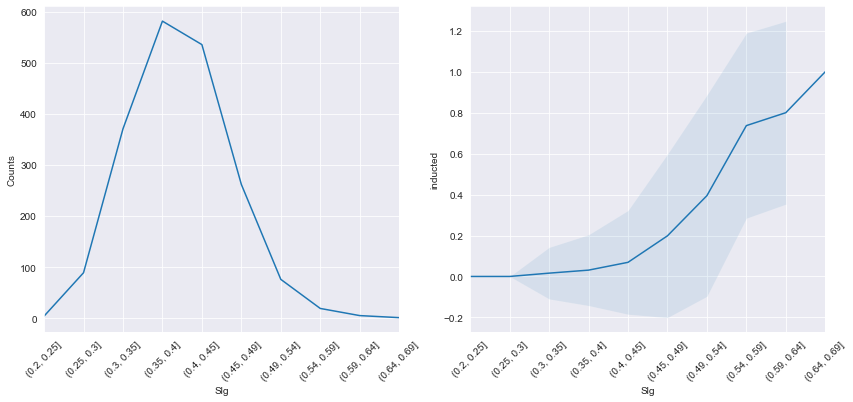

In [125]:
plot_feature(df_pos_play, 'Slg', 'inducted')

In [126]:
get_bin_members(df_pos_play, 'Slg', '10')

1.0 < Slg <= 1.0 
            inducted   Slg bin
Name                         
Babe Ruth     1.000 0.690  10


In [127]:
get_bin_members(df_pos_play, 'Slg', '9')

1.0 < Slg <= 1.0 
                 inducted   Slg bin
Name                              
Ted Williams       1.000 0.634   9
Lou Gehrig         1.000 0.632   9
Jimmie Foxx        1.000 0.609   9
Barry Bonds        0.000 0.607   9
Hank Greenberg     1.000 0.605   9


In [128]:
get_bin_members(df_pos_play, 'Slg', '8')

1.0 < Slg <= 1.0 
                    inducted   Slg bin
Name                                 
Mark McGwire          0.000 0.588   8
Manny Ramirez         0.000 0.585   8
Joe DiMaggio          1.000 0.579   8
Rogers Hornsby        1.000 0.577   8
Larry Walker          1.000 0.565   8
Albert Belle          0.000 0.564   8
Johnny Mize           1.000 0.562   8
Juan Gonzalez         0.000 0.561   8
Stan Musial           1.000 0.559   8
Willie Mays           1.000 0.557   8
Mickey Mantle         1.000 0.557   8
Frank Thomas          1.000 0.555   8
Hank Aaron            1.000 0.555   8
Jim Thome             1.000 0.554   8
Vladimir Guerrero     1.000 0.553   8
Ralph Kiner           1.000 0.548   8
Carlos Delgado        0.000 0.546   8
Mike Piazza           1.000 0.545   8
Hack Wilson           1.000 0.545   8


#### On Base Percentage + Slugging Percentage (OPS)

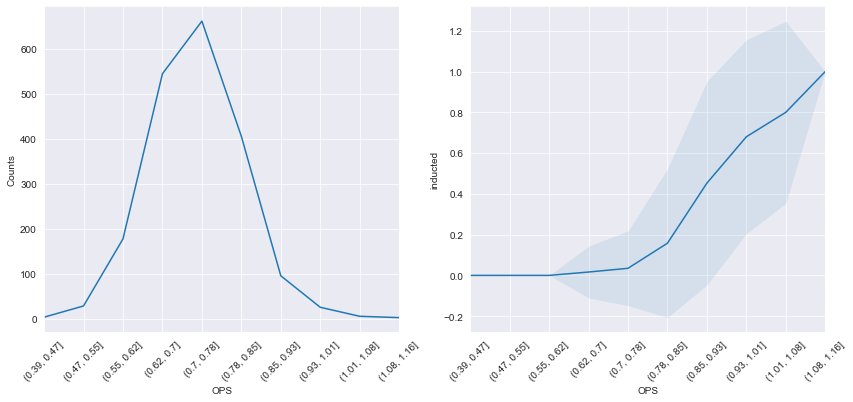

In [129]:
plot_feature(df_pos_play, 'OPS', 'inducted')

In [130]:
get_bin_members(df_pos_play, 'OPS', '10')

1.0 < OPS <= 1.0 
               inducted   OPS bin
Name                            
Babe Ruth        1.000 1.158  10
Ted Williams     1.000 1.111  10


In [131]:
get_bin_members(df_pos_play, 'OPS', '9')

1.0 < OPS <= 1.0 
                 inducted   OPS bin
Name                              
Lou Gehrig         1.000 1.074   9
Barry Bonds        0.000 1.051   9
Jimmie Foxx        1.000 1.033   9
Hank Greenberg     1.000 1.012   9
Rogers Hornsby     1.000 1.006   9


In [132]:
get_bin_members(df_pos_play, 'OPS', '8')

1.0 < OPS <= 1.0 
                       inducted   OPS bin
Name                                    
Manny Ramirez            0.000 0.996   8
Mark McGwire             0.000 0.982   8
Mickey Mantle            1.000 0.977   8
Frank Thomas             1.000 0.974   8
Stan Musial              1.000 0.974   8
Joe DiMaggio             1.000 0.972   8
Larry Walker             1.000 0.965   8
Jim Thome                1.000 0.956   8
Johnny Mize              1.000 0.955   8
Todd Helton              0.000 0.953   8
Jeff Bagwell             1.000 0.948   8
Lance Berkman            0.000 0.943   8
Mel Ott                  1.000 0.943   8
Ralph Kiner              1.000 0.943   8
Willie Mays              1.000 0.941   8
Lefty O'Doul             0.000 0.941   8
Ty Cobb                  1.000 0.940   8
Dan Brouthers            1.000 0.940   8
Shoeless Joe Jackson     0.000 0.936   8
Hack Wilson              1.000 0.935   8
Albert Belle             0.000 0.933   8
Edgar Martinez           1.000 0.933  

#### Stolen Base Percentage (SB_Pct)

In [133]:
sb_pct_ldr = df_pos_play[df_pos_play['SBA'] >= 200] 

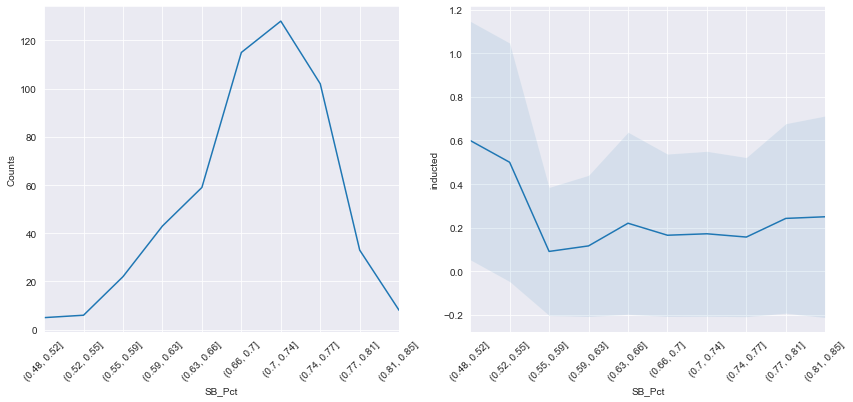

In [134]:
plot_feature(sb_pct_ldr, 'SB_Pct', 'inducted')

In [135]:
get_bin_members(sb_pct_ldr, 'SB_Pct', '10')

1.0 < SB_Pct <= 1.0 
                inducted  SB_Pct bin
Name                               
Tim Raines        1.000   0.847  10
Eric Davis        0.000   0.841  10
Willie Wilson     0.000   0.833  10
Barry Larkin      1.000   0.831  10
Tony Womack       0.000   0.831  10
Davey Lopes       0.000   0.830  10
Stan Javier       0.000   0.828  10
Julio Cruz        0.000   0.815  10


In [136]:
get_bin_members(sb_pct_ldr, 'SB_Pct', '9')

1.0 < SB_Pct <= 1.0 
                   inducted  SB_Pct bin
Name                                  
Brian Hunter         0.000   0.810   9
Joe Morgan           1.000   0.810   9
Vince Coleman        0.000   0.809   9
Rickey Henderson     1.000   0.808   9
Dave Roberts         0.000   0.807   9
Roberto Alomar       1.000   0.806   9
Andy Van Slyke       0.000   0.806   9
Johnny Damon         0.000   0.798   9
Lenny Dykstra        0.000   0.798   9
Ozzie Smith          1.000   0.797   9
Brian Roberts        0.000   0.796   9
Kenny Lofton         0.000   0.795   9
Gary Redus           0.000   0.795   9
Paul Molitor         1.000   0.794   9
Orlando Cabrera      0.000   0.791   9
Hugh Nicol           0.000   0.790   9
Luis Aparicio        1.000   0.788   9
Marquis Grissom      0.000   0.787   9
Derek Jeter          1.000   0.787   9
Amos Otis            0.000   0.786   9
Barry Bonds          0.000   0.785   9
Kirk Gibson          0.000   0.785   9
Mike Cameron         0.000   0.782   9
Dev

In [137]:
get_bin_members(sb_pct_ldr, 'SB_Pct', '8')

1.0 < SB_Pct <= 1.0 
                  inducted  SB_Pct bin
Name                                 
Corey Patterson     0.000   0.773   8
Gary Pettis         0.000   0.773   8
Roger Cedeno        0.000   0.772   8
Max Carey           1.000   0.771   8
King Kelly          1.000   0.770   8
...                   ...     ...  ..
Maury Wills         0.000   0.738   8
John Anderson       0.000   0.738   8
George Gore         0.000   0.738   8
Ray Durham          0.000   0.738   8
Charlie Irwin       0.000   0.738   8

[102 rows x 3 columns]


### Games played by position
Features for games played by position all have heaviliy positive skewness. Correlation to inducted often shows a "pinched" range of standard deviation, with no players inducted in that range of games played at a given position. There are a few possible explanations for this:
 - The first decile at each position includes players that played zero games at that position. That includes players inducted to the HOF based on their play everywhere *but* the position in question. It's the "everyone else" category. As players have more games played at a position, that position becomes more representative of the type of player they are. Many positions have one or more bins with zero inductees, which likely represents the worst players that primarily played that position. 
 - Players with strong skills offensively are more likely to change positions over the course of their career. In his Baseball Abstract books of the 1980s, author Bill James described the defensive spectrum, which ranges from the easiest positions to play (Designated Hitter and 1B) on the left end of the spectrum to the most difficult (Shortstop, Catcher and Pitcher) on the right. The farther to the right a position is, the more defensive value it represents in preventing the opposing team from scoring runs. Positions on the left end of the spectrum have relatively little defensive value and therefore are often manned by players with strong offensive skills but limited defensive ability. To optimize a team's starting lineup, the manager will play each player at the right-most position that he is capable of playing well. As players age and their range declines, there is a tendency to move leftward on the defensive spectrum, provided that they still provide enough offense to justify their place in the lineup. Players with lesser offensive skills must be very strong defensive players to get playing time to begin with, but as their defense declines, their careers will end if they can't hit enough to justify moving to a different position that could otherwise be played by a better hitter.
 - Players with very long careers have more opportunity to play "out of position" (to field a position other than their typical position) and, as shown by the correlation between number of years played and inducted, these players are relatively likely to be inducted into the HOF.

Some positions also have very few (or even a single) player at the higher end of the games played distribution, which shows some unusual correlations with inducted. 

Fielding data may provide more insight if included in position-specific models are created. For the reasons described by the defensive spectrum, there is likely an inherent limitation in attemtping to model based on a single set of feature importance when the skills expected from a player vary so widely based on the position he plays.
 
 We will revisit this later.
 
 https://en.wikipedia.org/wiki/Defensive_spectrum

#### Pitcher (P)

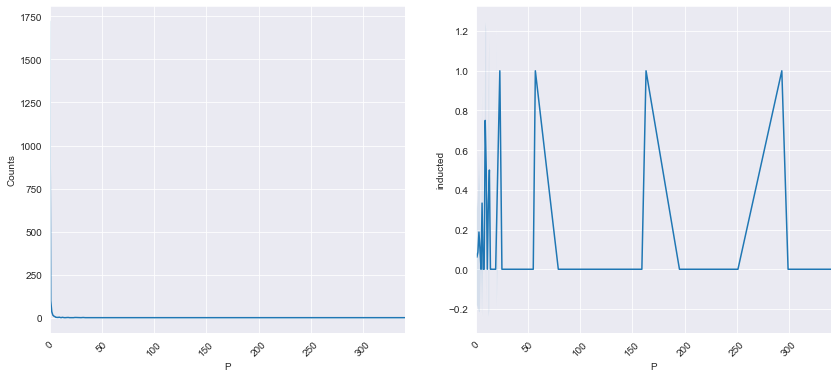

In [138]:
plot_feature(df_pos_play, 'P', 'inducted')

What percentage of position players also pitched?

In [139]:
pitching_hitters = df_pos_play[df_pos_play['P'] > 0]
print(len(pitching_hitters), 'of', len(df_pos_play), '(', 
      round(len(pitching_hitters)/len(df_pos_play) * 100, 1), 
      '%) position players also pitched.')

223 of 1945 ( 11.5 %) position players also pitched.


In [140]:
pitching_hitters['P'].describe().transpose()

count   223.000
mean     17.807
std      51.634
min       1.000
25%       1.000
50%       2.000
75%       5.500
max     340.000
Name: P, dtype: float64

75% of the position players that pitched did so for 6 games or fewer. This feature will be dropped before modeling.

#### Catcher (C)

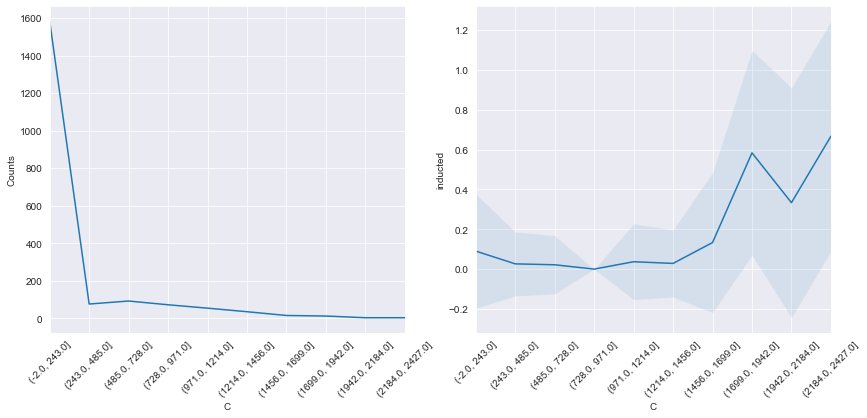

In [141]:
plot_feature(df_pos_play, 'C', 'inducted')

In [142]:
get_def_games_details(df_pos_play, 'C')

Name        G        C      1B      2B      3B      SS  \
                 count     mean     mean    mean    mean    mean    mean   
C                                                                          
(-2.0, 243.0]     1583 1405.580    2.824 186.027 176.142 182.169 187.644   
(243.0, 485.0]      76  640.855  387.145  37.368  43.158  56.882  10.382   
(485.0, 728.0]      92  777.902  610.967  30.011   3.620  16.141   4.826   
(728.0, 971.0]      72  992.889  848.736  44.806   1.944  12.375   0.514   
(971.0, 1214.0]     54 1182.167 1072.796  11.241   0.704   7.556   0.759   
(1214.0, 1456.0]    35 1425.914 1313.914  12.086   0.200   3.714   0.086   
(1456.0, 1699.0]    15 1708.800 1553.267  28.467   0.133   0.667   0.267   
(1699.0, 1942.0]    12 2000.667 1813.667  36.833   0.750  19.333   0.083   
(1942.0, 2184.0]     3 2123.000 2010.333  29.667   0.000   1.333   0.000   
(2184.0, 2427.0]     3 2435.333 2292.667  14.000   0.333   3.667   0.000   

                      OF inducted  C_pct  
                    mean     mean         
C                                         
(-2.0, 243.0]    547.318    0.090  0.201  
(243.0, 485.0]    32.303    0.026 60.411  
(485.0, 728.0]    44.261    0.022 78.540  
(728.0, 971.0]    21.639    0.000 85.481  
(971.0, 1214.0]   20.222    0.037 90.748  
(1214.0, 1456.0]   8.371    0.029 92.145  
(1456.0, 1699.0]   5.867    0.133 90.898  
(1699.0, 1942.0]  35.167    0.583 90.653  
(1942.0, 2184.0]  56.333    0.333 94.693  
(2184.0, 2427.0]  14.000    0.667 94.142

In [143]:
get_bin_members(df_pos_play, 'C', '10')

2184.0 < C <= 2427.0 
                 inducted     C bin
Name                              
Ivan Rodriguez     1.000  2427  10
Carlton Fisk       1.000  2226  10
Bob Boone          0.000  2225  10


In [144]:
get_bin_members(df_pos_play, 'C', '9')

1942.0 < C <= 2184.0 
                inducted     C bin
Name                             
Gary Carter       1.000  2056   9
Jason Kendall     0.000  2025   9
Tony Pena         0.000  1950   9


In [145]:
get_bin_members(df_pos_play, 'C', '8')

1699.0 < C <= 1942.0 
                  inducted     C bin
Name                               
Brad Ausmus         0.000  1938   8
Jim Sundberg        0.000  1927   8
Al Lopez            0.000  1918   8
Benito Santiago     0.000  1917   8
Lance Parrish       0.000  1818   8
Rick Ferrell        1.000  1806   8
Gabby Hartnett      1.000  1793   8
Ted Simmons         1.000  1771   8
Johnny Bench        1.000  1742   8
Ray Schalk          1.000  1727   8
Bill Dickey         1.000  1708   8
Yogi Berra          1.000  1699   8


#### First Base (1B)

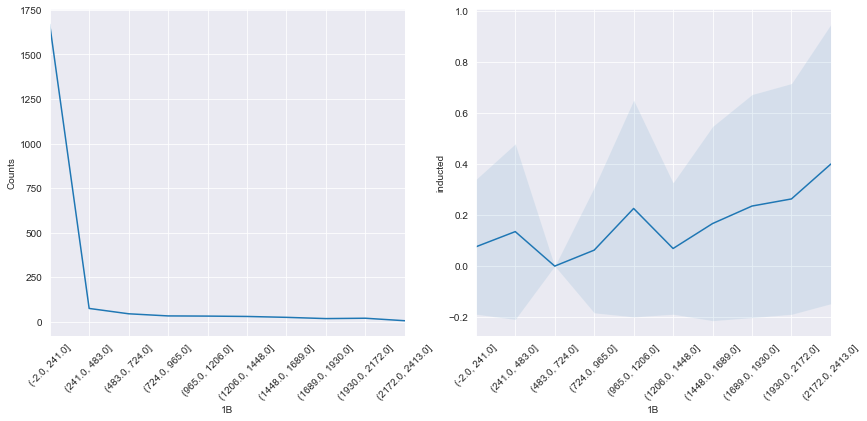

In [146]:
plot_feature(df_pos_play, '1B', 'inducted')

In [147]:
get_def_games_details(df_pos_play, '1B')

Name        G       C       1B      2B      3B      SS  \
                 count     mean    mean     mean    mean    mean    mean   
1B                                                                         
(-2.0, 241.0]     1670 1290.928 183.229   21.458 162.532 162.183 174.224   
(241.0, 483.0]      74 1422.243  50.122  341.838  77.824 176.054  62.581   
(483.0, 724.0]      44 1271.000  33.523  599.841  62.932 103.864  28.227   
(724.0, 965.0]      32 1535.312  29.031  837.406  25.781 110.344   6.156   
(965.0, 1206.0]     31 1541.258  13.000 1080.516  40.903  50.129   4.226   
(1206.0, 1448.0]    29 1623.690   8.379 1320.138  15.448  17.862  39.103   
(1448.0, 1689.0]    24 1789.292   0.000 1559.167   0.500   2.333   0.083   
(1689.0, 1930.0]    17 2056.471  14.412 1833.529   6.235  77.471   0.235   
(1930.0, 2172.0]    19 2231.579   5.526 2062.947   1.368  23.263   3.421   
(2172.0, 2413.0]     5 2506.800   0.000 2290.000   0.200   1.200   0.000   

                      OF inducted 1B_pct  
                    mean     mean         
1B                                        
(-2.0, 241.0]    480.166    0.075  1.662  
(241.0, 483.0]   540.905    0.135 24.035  
(483.0, 724.0]   264.750    0.000 47.194  
(724.0, 965.0]   351.938    0.062 54.543  
(965.0, 1206.0]  190.774    0.226 70.106  
(1206.0, 1448.0]  89.379    0.069 81.305  
(1448.0, 1689.0]  91.083    0.167 87.139  
(1689.0, 1930.0]  23.118    0.235 89.159  
(1930.0, 2172.0]  35.105    0.263 92.443  
(2172.0, 2413.0]   5.600    0.400 91.352

In [148]:
get_bin_members(df_pos_play, '1B', '10')

2172.0 < 1B <= 2413.0 
                inducted    1B bin
Name                             
Eddie Murray      1.000  2413  10
Jake Beckley      1.000  2383  10
Fred McGriff      0.000  2239  10
Mickey Vernon     0.000  2237  10
Todd Helton       0.000  2178  10


In [149]:
get_bin_members(df_pos_play, '1B', '9')

1930.0 < 1B <= 2172.0 
                   inducted    1B bin
Name                                
Mark Grace           0.000  2162   9
Cap Anson            1.000  2152   9
Rafael Palmeiro      0.000  2139   9
Lou Gehrig           1.000  2137   9
Charlie Grimm        0.000  2131   9
Jeff Bagwell         1.000  2111   9
Andres Galarraga     0.000  2106   9
Joe Judge            0.000  2084   9
Ed Konetchy          0.000  2073   9
Steve Garvey         0.000  2059   9
Joe Kuhel            0.000  2057   9
John Olerud          0.000  2053   9
Willie McCovey       1.000  2045   9
Keith Hernandez      0.000  2014   9
Jake Daubert         0.000  2002   9
Stuffy McInnis       0.000  1995   9
George Sisler        1.000  1971   9
Chris Chambliss      0.000  1962   9
Norm Cash            0.000  1943   9


In [150]:
get_bin_members(df_pos_play, '1B', '8')

1689.0 < 1B <= 1930.0 
                 inducted    1B bin
Name                              
Jimmie Foxx        1.000  1919   8
Wally Joyner       0.000  1913   8
Gil Hodges         0.000  1908   8
Paul Konerko       0.000  1904   8
Derrek Lee         0.000  1901   8
Will Clark         0.000  1889   8
Jim Bottomley      1.000  1885   8
Tino Martinez      0.000  1869   8
Wally Pipp         0.000  1819   8
Hal Chase          0.000  1815   8
Fred Tenney        0.000  1810   8
Tony Perez         1.000  1778   8
George Scott       0.000  1773   8
Carlos Delgado     0.000  1767   8
Mark McGwire       0.000  1763   8
Roger Connor       1.000  1759   8
Eric Karros        0.000  1698   8


#### Second Base (2B)

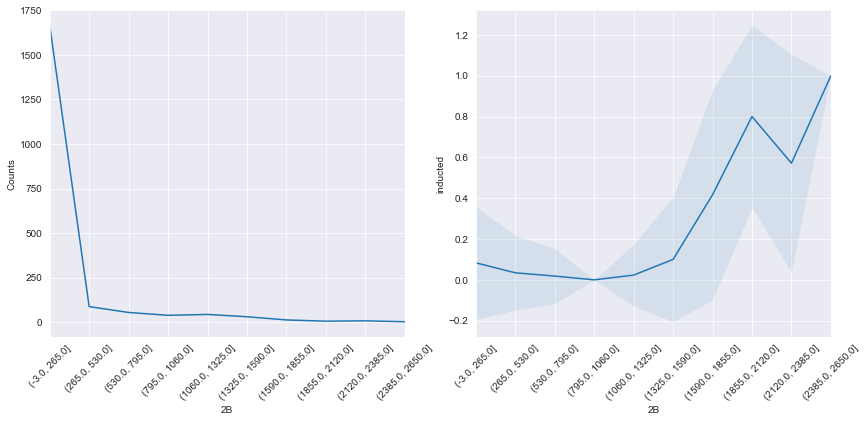

In [151]:
plot_feature(df_pos_play, '2B', 'inducted')

In [152]:
get_def_games_details(df_pos_play, '2B')

Name        G       C      1B       2B      3B      SS  \
                 count     mean    mean    mean     mean    mean    mean   
2B                                                                         
(-3.0, 265.0]     1667 1323.134 187.292 176.463   19.370 150.629 151.215   
(265.0, 530.0]      87 1152.529   0.575  36.736  381.598 267.195 302.161   
(530.0, 795.0]      54 1302.667   0.611  74.574  642.722 183.907 224.926   
(795.0, 1060.0]     38 1292.421   8.132  31.342  931.263 153.711  91.289   
(1060.0, 1325.0]    43 1460.047   1.233  41.000 1204.953  65.721  60.395   
(1325.0, 1590.0]    30 1639.167   0.400  13.500 1440.533  63.133  39.400   
(1590.0, 1855.0]    12 1912.667   0.000  14.750 1762.083  55.917  27.000   
(1855.0, 2120.0]     5 2391.000  85.600  80.600 2029.400  64.200  16.600   
(2120.0, 2385.0]     7 2303.286   0.000   1.571 2223.000   5.000  22.143   
(2385.0, 2650.0]     2 2737.500   0.000   0.000 2588.500   2.000  20.000   

                      OF inducted 2B_pct  
                    mean     mean         
2B                                        
(-3.0, 265.0]    515.654    0.083  1.464  
(265.0, 530.0]    83.621    0.034 33.110  
(530.0, 795.0]   105.926    0.019 49.339  
(795.0, 1060.0]   27.658    0.000 72.056  
(1060.0, 1325.0]  34.256    0.023 82.528  
(1325.0, 1590.0]  29.600    0.100 87.882  
(1590.0, 1855.0]  14.333    0.417 92.127  
(1855.0, 2120.0]  77.800    0.800 84.877  
(2120.0, 2385.0]   0.857    0.571 96.514  
(2385.0, 2650.0]  13.000    1.000 94.557

In [153]:
get_bin_members(df_pos_play, '2B', '10')

2385.0 < 2B <= 2650.0 
                inducted    2B bin
Name                             
Eddie Collins     1.000  2650  10
Joe Morgan        1.000  2527  10


In [154]:
get_bin_members(df_pos_play, '2B', '9')

2120.0 < 2B <= 2385.0 
                    inducted    2B bin
Name                                 
Roberto Alomar        1.000  2320   9
Lou Whitaker          0.000  2308   9
Nellie Fox            1.000  2295   9
Charlie Gehringer     1.000  2206   9
Willie Randolph       0.000  2152   9
Frank White           0.000  2151   9
Bid McPhee            1.000  2129   9


In [155]:
get_bin_members(df_pos_play, '2B', '8')

1855.0 < 2B <= 2120.0 
                 inducted    2B bin
Name                              
Bill Mazeroski     1.000  2094   8
Nap Lajoie         1.000  2035   8
Jeff Kent          0.000  2034   8
Ryne Sandberg      1.000  1995   8
Craig Biggio       1.000  1989   8


#### Third Base (3B)

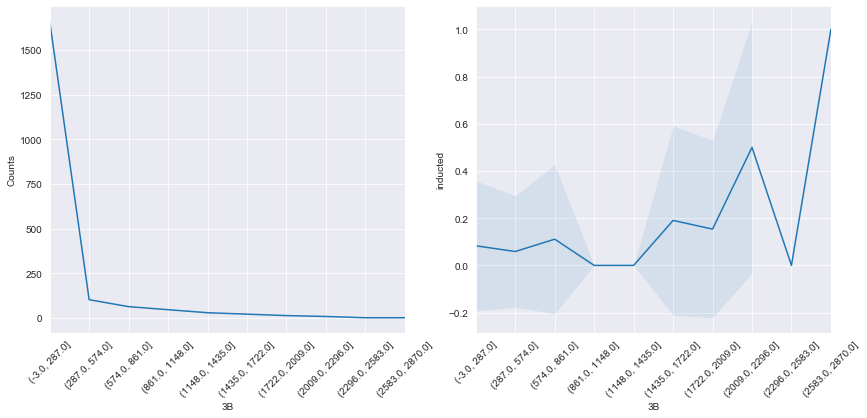

In [156]:
plot_feature(df_pos_play, '3B', 'inducted')

In [157]:
get_def_games_details(df_pos_play, '3B')

Name        G       C      1B      2B       3B      SS  \
                 count     mean    mean    mean    mean     mean    mean   
3B                                                                         
(-3.0, 287.0]     1661 1312.731 185.919 169.119 146.624   27.239 155.082   
(287.0, 574.0]     102 1325.402  28.706 100.029 234.088  407.716 252.078   
(574.0, 861.0]      63 1298.921   7.857 109.063 143.825  723.127 151.175   
(861.0, 1148.0]     46 1352.370   8.761  59.913  69.848  999.870  74.652   
(1148.0, 1435.0]    29 1552.517   0.034  51.345  72.069 1297.897  35.103   
(1435.0, 1722.0]    21 1827.048   6.571 103.667  33.381 1572.619  30.048   
(1722.0, 2009.0]    13 2042.077  24.923  26.000   6.231 1866.077  26.308   
(2009.0, 2296.0]     8 2330.000   0.000  72.875   6.500 2160.000  12.250   
(2296.0, 2583.0]     1 2700.000   0.000  14.000   0.000 2412.000   5.000   
(2583.0, 2870.0]     1 2896.000   0.000   0.000  25.000 2870.000   5.000   

                      OF inducted 3B_pct  
                    mean     mean         
3B                                        
(-3.0, 287.0]    510.208    0.083  2.075  
(287.0, 574.0]   177.559    0.059 30.762  
(574.0, 861.0]    70.683    0.111 55.671  
(861.0, 1148.0]   95.109    0.000 73.935  
(1148.0, 1435.0]  37.172    0.000 83.599  
(1435.0, 1722.0]   9.000    0.190 86.074  
(1722.0, 2009.0]  46.923    0.154 91.381  
(2009.0, 2296.0]  31.375    0.500 92.704  
(2296.0, 2583.0]  73.000    0.000 89.333  
(2583.0, 2870.0]   0.000    1.000 99.102

In [158]:
get_bin_members(df_pos_play, '3B', '10')

2583.0 < 3B <= 2870.0 
                  inducted    3B bin
Name                               
Brooks Robinson     1.000  2870  10


In [159]:
get_bin_members(df_pos_play, '3B', '9')

2296.0 < 3B <= 2583.0 
                inducted    3B bin
Name                             
Graig Nettles     0.000  2412   9


In [160]:
get_bin_members(df_pos_play, '3B', '8')

2009.0 < 3B <= 2296.0 
                inducted    3B bin
Name                             
Gary Gaetti       0.000  2282   8
Wade Boggs        1.000  2215   8
Mike Schmidt      1.000  2212   8
Buddy Bell        0.000  2183   8
Eddie Mathews     1.000  2181   8
Ron Santo         1.000  2130   8
Tim Wallach       0.000  2054   8
Scott Rolen       0.000  2023   8


#### Shortstop (SS)

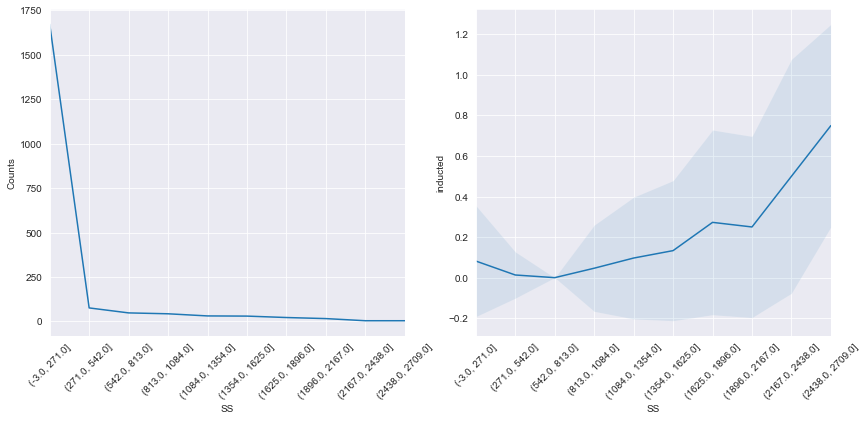

In [161]:
plot_feature(df_pos_play, 'SS', 'inducted')

In [162]:
get_def_games_details(df_pos_play, 'SS')

Name        G       C      1B      2B      3B       SS  \
                 count     mean    mean    mean    mean    mean     mean   
SS                                                                         
(-3.0, 271.0]     1671 1318.672 187.138 178.491 140.372 153.335   15.358   
(271.0, 542.0]      76 1097.711   1.092  26.921 330.974 245.553  381.579   
(542.0, 813.0]      48 1172.083   6.292  29.375 224.312 161.667  653.417   
(813.0, 1084.0]     43 1263.442   0.047  30.349 153.047 106.279  921.744   
(1084.0, 1354.0]    31 1454.452   0.032  49.484  64.387  90.161 1201.194   
(1354.0, 1625.0]    30 1744.967   0.100  11.700  52.967  92.033 1481.633   
(1625.0, 1896.0]    22 1936.273   0.045  14.591  33.818  54.091 1774.136   
(1896.0, 2167.0]    16 2203.438   0.062   2.062  62.438  54.562 2036.438   
(2167.0, 2438.0]     4 2539.500   0.000  18.750  43.750 220.750 2230.000   
(2438.0, 2709.0]     4 2722.250   0.000   0.750  19.000  37.500 2619.250   

                      OF inducted SS_pct  
                    mean     mean         
SS                                        
(-3.0, 271.0]    517.989    0.082  1.165  
(271.0, 542.0]    72.882    0.013 34.761  
(542.0, 813.0]    36.396    0.000 55.748  
(813.0, 1084.0]   12.558    0.047 72.955  
(1084.0, 1354.0]  12.548    0.097 82.587  
(1354.0, 1625.0]  64.600    0.133 84.909  
(1625.0, 1896.0]  33.364    0.273 91.626  
(1896.0, 2167.0]   8.625    0.250 92.421  
(2167.0, 2438.0]   2.000    0.500 87.813  
(2438.0, 2709.0]   0.500    0.750 96.216

In [163]:
get_bin_members(df_pos_play, 'SS', '10')

2438.0 < SS <= 2709.0 
                inducted    SS bin
Name                             
Omar Vizquel      0.000  2709  10
Derek Jeter       1.000  2674  10
Luis Aparicio     1.000  2583  10
Ozzie Smith       1.000  2511  10


In [164]:
get_bin_members(df_pos_play, 'SS', '9')

2167.0 < SS <= 2438.0 
                  inducted    SS bin
Name                               
Cal Ripken          1.000  2302   9
Larry Bowa          0.000  2222   9
Luke Appling        1.000  2218   9
Dave Concepcion     0.000  2178   9


In [165]:
get_bin_members(df_pos_play, 'SS', '8')

1896.0 < SS <= 2167.0 
                    inducted    SS bin
Name                                 
Rabbit Maranville     1.000  2153   8
Alan Trammell         1.000  2139   8
Bill Dahlen           0.000  2133   8
Edgar Renteria        0.000  2114   8
Bert Campaneris       0.000  2097   8
Barry Larkin          1.000  2085   8
Tommy Corcoran        0.000  2078   8
Royce Clayton         0.000  2053   8
Roy McMillan          0.000  2028   8
Pee Wee Reese         1.000  2014   8
Roger Peckinpaugh     0.000  1982   8
Garry Templeton       0.000  1964   8
Don Kessinger         0.000  1955   8
Miguel Tejada         0.000  1946   8
Mark Belanger         0.000  1942   8
Chris Speier          0.000  1900   8


#### Outfield (OF)

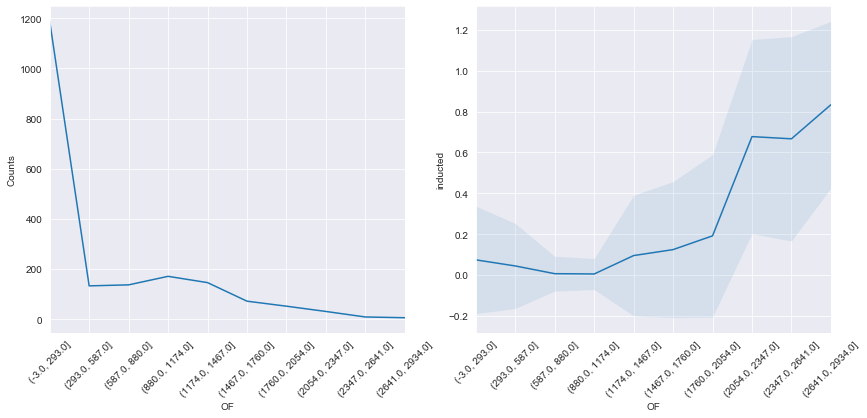

In [166]:
plot_feature(df_pos_play, 'OF', 'inducted')

In [167]:
get_def_games_details(df_pos_play, 'OF')

Name        G       C      1B      2B      3B      SS  \
                 count     mean    mean    mean    mean    mean    mean   
OF                                                                        
(-3.0, 293.0]     1188 1260.565 258.669 205.609 224.080 222.456 239.162   
(293.0, 587.0]     133 1122.278  24.053 188.692  75.045 138.880  66.323   
(587.0, 880.0]     137 1106.971  10.832  83.679  21.905  39.628  15.139   
(880.0, 1174.0]    171 1290.965   4.655  66.480  14.187  28.503   6.345   
(1174.0, 1467.0]   146 1506.370   1.616  37.466   4.747   7.726  12.164   
(1467.0, 1760.0]    72 1827.153   0.028  44.444   1.847  17.347   3.375   
(1760.0, 2054.0]    52 2035.173   1.635  46.231   1.731   1.962   4.135   
(2054.0, 2347.0]    31 2435.065   0.000  50.935   2.065  10.258   0.613   
(2347.0, 2641.0]     9 2627.333   0.000  18.444   0.222   1.000   0.000   
(2641.0, 2934.0]     6 3030.167   0.000  54.333   7.500   1.500   0.333   

                       OF inducted OF_pct  
                     mean     mean         
OF                                         
(-3.0, 293.0]      27.662    0.075  2.194  
(293.0, 587.0]    438.812    0.045 39.100  
(587.0, 880.0]    740.489    0.007 66.893  
(880.0, 1174.0]  1022.228    0.006 79.183  
(1174.0, 1467.0] 1298.856    0.096 86.224  
(1467.0, 1760.0] 1609.278    0.125 88.076  
(1760.0, 2054.0] 1867.865    0.192 91.779  
(2054.0, 2347.0] 2180.355    0.677 89.540  
(2347.0, 2641.0] 2440.889    0.667 92.904  
(2641.0, 2934.0] 2822.333    0.833 93.141

In [168]:
get_bin_members(df_pos_play, 'OF', '10')

2641.0 < OF <= 2934.0 
                   inducted    OF bin
Name                                
Ty Cobb              1.000  2934  10
Barry Bonds          0.000  2874  10
Willie Mays          1.000  2842  10
Rickey Henderson     1.000  2826  10
Hank Aaron           1.000  2760  10
Tris Speaker         1.000  2698  10


In [169]:
get_bin_members(df_pos_play, 'OF', '9')

2347.0 < OF <= 2641.0 
                   inducted    OF bin
Name                                
Lou Brock            1.000  2507   9
Al Kaline            1.000  2488   9
Steve Finley         0.000  2487   9
Dave Winfield        1.000  2469   9
Luis Gonzalez        0.000  2441   9
Max Carey            1.000  2421   9
Vada Pinson          0.000  2403   9
Ken Griffey          1.000  2382   9
Roberto Clemente     1.000  2370   9


In [170]:
get_bin_members(df_pos_play, 'OF', '8')

2054.0 < OF <= 2347.0 
                   inducted    OF bin
Name                                
Zack Wheat           1.000  2337   8
Tony Gwynn           1.000  2326   8
Andre Dawson         1.000  2323   8
Willie Davis         0.000  2323   8
Mel Ott              1.000  2313   8
Sam Crawford         1.000  2299   8
Paul Waner           1.000  2288   8
Harry Hooper         1.000  2284   8
Sam Rice             1.000  2270   8
Babe Ruth            1.000  2241   8
Sammy Sosa           0.000  2203   8
Fred Clarke          1.000  2193   8
Goose Goslin         1.000  2188   8
Brett Butler         0.000  2159   8
Jose Cruz            0.000  2156   8
Ted Williams         1.000  2151   8
Dwight Evans         0.000  2146   8
Doc Cramer           0.000  2142   8
Al Simmons           1.000  2142   8
Bobby Abreu          0.000  2138   8
Frank Robinson       1.000  2132   8
Tim Raines           1.000  2123   8
Richie Ashburn       1.000  2104   8
Reggie Jackson       1.000  2102   8
Billy Williams

#### Left Field (LF)

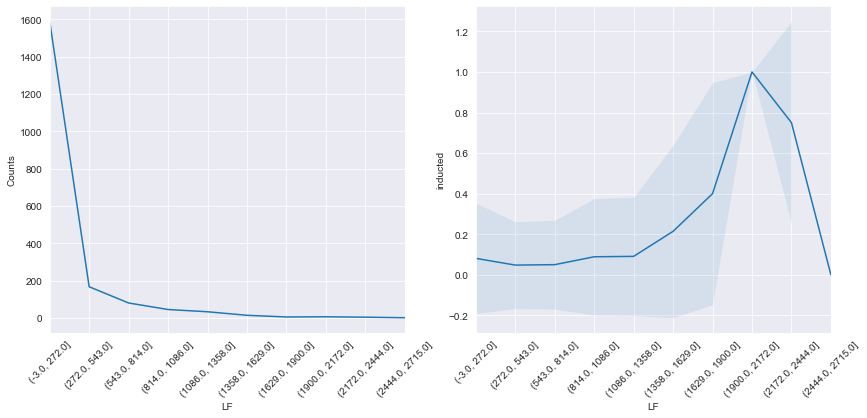

In [171]:
plot_feature(df_pos_play, 'LF', 'inducted')

In [172]:
get_bin_members(df_pos_play, 'LF', '10')

2444.0 < LF <= 2715.0 
              inducted    LF bin
Name                           
Barry Bonds     0.000  2715  10


In [173]:
get_bin_members(df_pos_play, 'LF', '9')

2172.0 < LF <= 2444.0 
                   inducted    LF bin
Name                                
Rickey Henderson     1.000  2421   9
Luis Gonzalez        0.000  2418   9
Zack Wheat           1.000  2328   9
Fred Clarke          1.000  2183   9


In [174]:
get_bin_members(df_pos_play, 'LF', '8')

1900.0 < LF <= 2172.0 
                   inducted    LF bin
Name                                
Lou Brock            1.000  2163   8
Ted Williams         1.000  1984   8
Tim Raines           1.000  1961   8
Goose Goslin         1.000  1949   8
Jesse Burkett        1.000  1935   8
Carl Yastrzemski     1.000  1913   8


#### Center Field (CF)

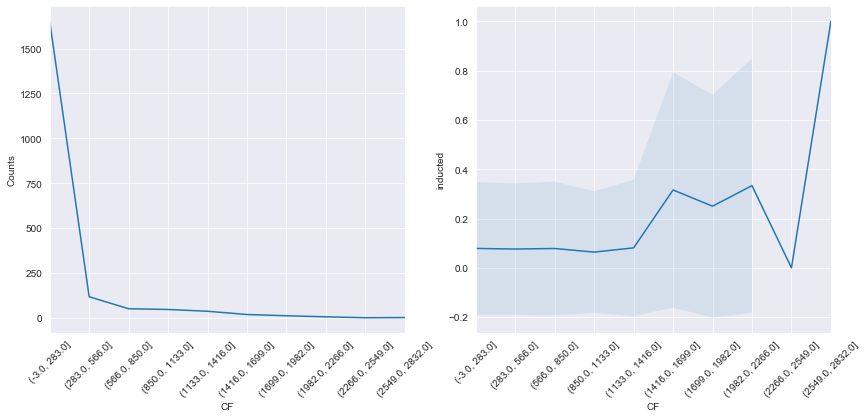

In [175]:
plot_feature(df_pos_play, 'CF', 'inducted')

In [176]:
get_bin_members(df_pos_play, 'CF', '10')

2549.0 < CF <= 2832.0 
               inducted    CF bin
Name                            
Willie Mays      1.000  2832  10
Tris Speaker     1.000  2690  10


In [177]:
get_bin_members(df_pos_play, 'CF', '9')

2266.0 < CF <= 2549.0 
               inducted    CF bin
Name                            
Steve Finley     0.000  2314   9


In [178]:
get_bin_members(df_pos_play, 'CF', '8')

1982.0 < CF <= 2266.0 
               inducted    CF bin
Name                            
Willie Davis     0.000  2240   8
Ty Cobb          1.000  2194   8
Ken Griffey      1.000  2145   8
Doc Cramer       0.000  2031   8
Brett Butler     0.000  1987   8
Kenny Lofton     0.000  1984   8


#### Right Field (RF)

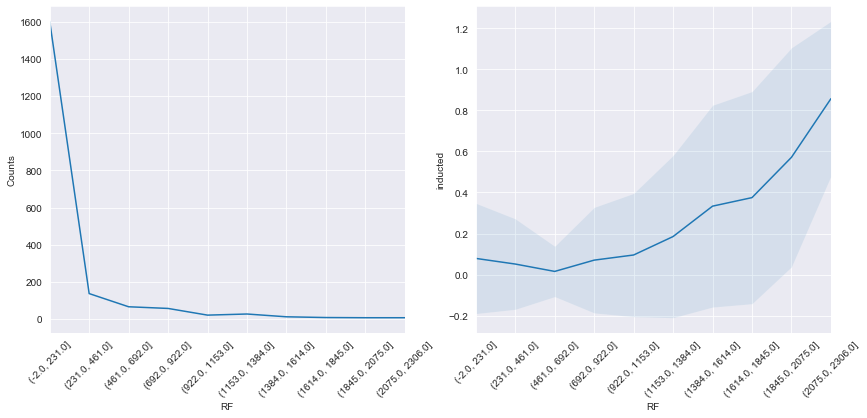

In [179]:
plot_feature(df_pos_play, 'RF', 'inducted')

In [180]:
get_bin_members(df_pos_play, 'RF', '10')

2075.0 < RF <= 2306.0 
                   inducted    RF bin
Name                                
Roberto Clemente     1.000  2306  10
Paul Waner           1.000  2256  10
Harry Hooper         1.000  2192  10
Hank Aaron           1.000  2174  10
Mel Ott              1.000  2167  10
Tony Gwynn           1.000  2144  10
Dwight Evans         0.000  2092  10


In [181]:
get_bin_members(df_pos_play, 'RF', '9')

1845.0 < RF <= 2075.0 
                 inducted    RF bin
Name                              
Al Kaline          1.000  2036   9
Sammy Sosa         0.000  2015   9
Willie Keeler      1.000  2013   9
Bobby Abreu        0.000  1990   9
Reggie Jackson     1.000  1942   9
Dave Winfield      1.000  1883   9
Paul O'Neill       0.000  1848   9


In [182]:
get_bin_members(df_pos_play, 'RF', '8')

1614.0 < RF <= 1845.0 
                  inducted    RF bin
Name                               
Dave Parker         0.000  1792   8
Larry Walker        1.000  1718   8
Magglio Ordonez     0.000  1713   8
Sam Crawford        1.000  1687   8
Jermaine Dye        0.000  1671   8
Sam Rice            1.000  1657   8
Shawn Green         0.000  1630   8
Patsy Donovan       0.000  1620   8


### Awards
#### Rookie of the Year (ROY)

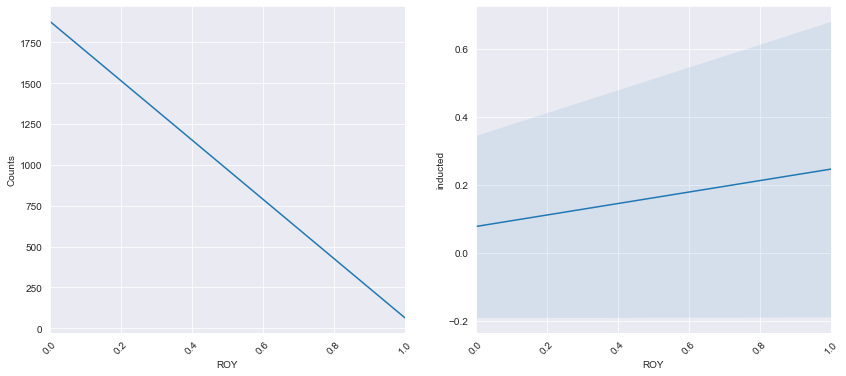

In [183]:
plot_feature(df_pos_play, 'ROY', 'inducted')

In [184]:
# Player count by how many ROY awards they won
df_pos_play[df_pos_play['ROY'] > 0]['ROY'].value_counts(sort=True, ascending=False)

1.000    65
Name: ROY, dtype: int64

The Rookie of the Year award can only be won once, in a player's first eligible season* in MLB. It was first awarded in 1947 and was awarded to a single player in 1947 and 1948. Because it is awarded at the beginning of a player's career, that a player must play at least 10 seasons and then has a 5 year waiting period prior to inclusion on the HOF ballot (and this dataset), relatively few players in our dataset have won the award.

Having said that, there is a positive correlation between ROY winners and HOF induction.

Rookie of the Year criteria from: https://www.baseball-reference.com/bullpen/Rookie_of_the_Year_Award

*Currently a player is considered to be a rookie, and thus eligible for the award, if the player has accumulated in prior major league seasons:*

    Fewer than 130 at bats or
    Fewer than 50 innings pitched
    Fewer than 45 days on the active roster, excluding time on the disabled list, in military service, or time when the rosters are expanded (currently after September 1)

*It was not until the late 1950s that who was a rookie was defined and the criteria has changed twice since. During the 1960s, players were not considered rookies if they had more than 75 at bats or 45 innings pitched in previous seasons or were on the active roster at any time from May 15th to September 1st. The current criteria were established in the 1970s.*

#### Most Valuable Player (MVP)

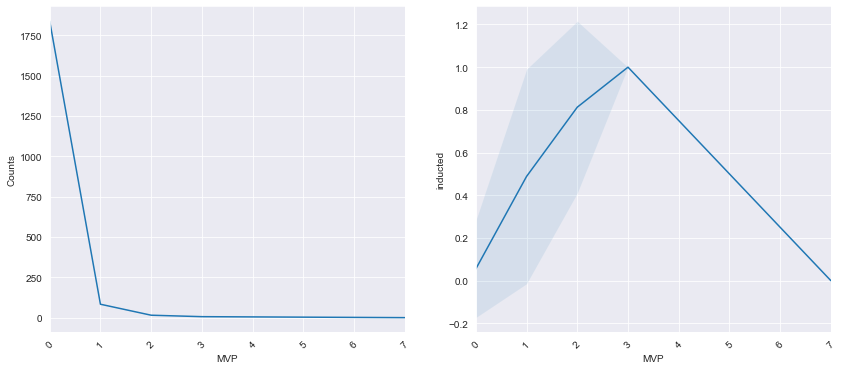

In [185]:
plot_feature(df_pos_play, 'MVP', 'inducted')

In [186]:
# Player count by how many MVP awards they won
df_pos_play[df_pos_play['MVP'] > 0]['MVP'].value_counts(sort=True, ascending=False)

1.000    84
2.000    16
3.000     7
7.000     1
Name: MVP, dtype: int64

In [187]:
# Find the player with the most MVP awards
print(df_pos_play[df_pos_play.MVP == df_pos_play.MVP.max()]['Name']) 

157    Barry Bonds
Name: Name, dtype: object


Again, Barry Bonds is a specific case, due to his connection to PEDs. 

With the exception of Bonds, there is a clear positive correlation between winning a MVP award and induction.

#### Triple Crown (TC)

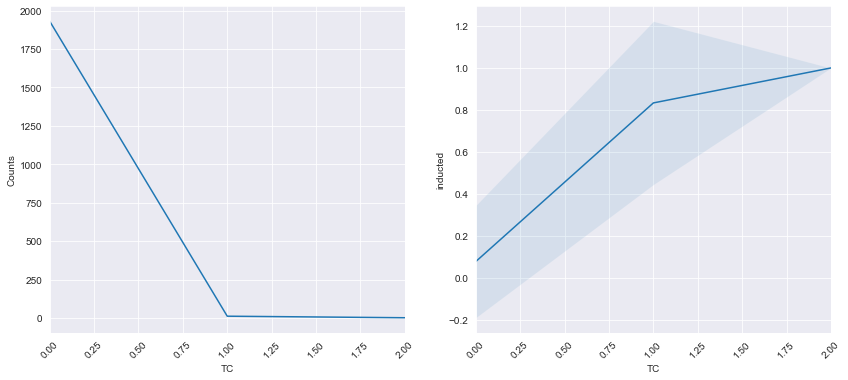

In [188]:
plot_feature(df_pos_play, 'TC', 'inducted')

In [189]:
# Player count by how many Triple Crown awards they won
df_pos_play[df_pos_play['TC'] > 0]['TC'].value_counts(sort=True, ascending=False)

1.000    12
2.000     2
Name: TC, dtype: int64

#### Gold Gloves - Catcher

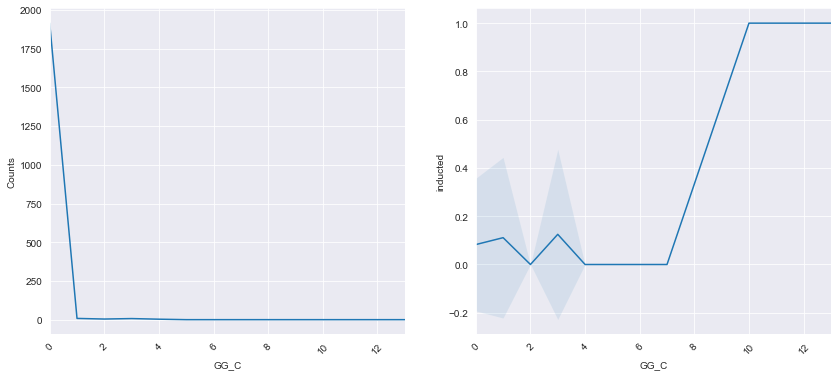

In [190]:
plot_feature(df_pos_play, 'GG_C', 'inducted')

In [191]:
get_nlargest(df_pos_play, 10, 'GG_C')

GG_C  inducted
Name                            
Ivan Rodriguez  13.000     1.000
Johnny Bench    10.000     1.000
Bob Boone        7.000     0.000
Jim Sundberg     6.000     0.000
Bill Freehan     5.000     0.000
Del Crandall     4.000     0.000
Charles Johnson  4.000     0.000
Mike Matheny     4.000     0.000
Tony Pena        4.000     0.000
Brad Ausmus      3.000     0.000

#### Gold Gloves - First Base

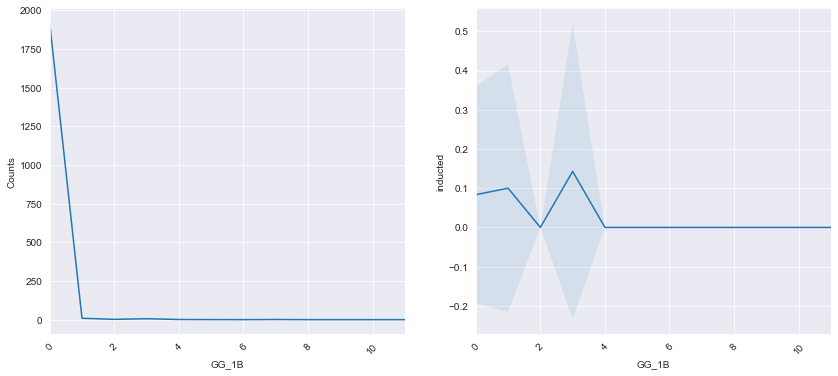

In [192]:
plot_feature(df_pos_play, 'GG_1B', 'inducted')

In [193]:
get_nlargest(df_pos_play, 10, 'GG_1B')

GG_1B  inducted
Name                            
Keith Hernandez 11.000     0.000
Don Mattingly    9.000     0.000
George Scott     8.000     0.000
Vic Power        7.000     0.000
Bill White       7.000     0.000
J. T. Snow       6.000     0.000
Steve Garvey     4.000     0.000
Mark Grace       4.000     0.000
Todd Helton      3.000     0.000
Gil Hodges       3.000     0.000

There is no correlation between Gold Gloves won at First Base and induction into the Hall of Fame. As discussed in the defensive games by position comments, First Base is primarily an offensive position, so defensive value has relatively little little impact on overall value.

#### Gold Gloves - Second Base

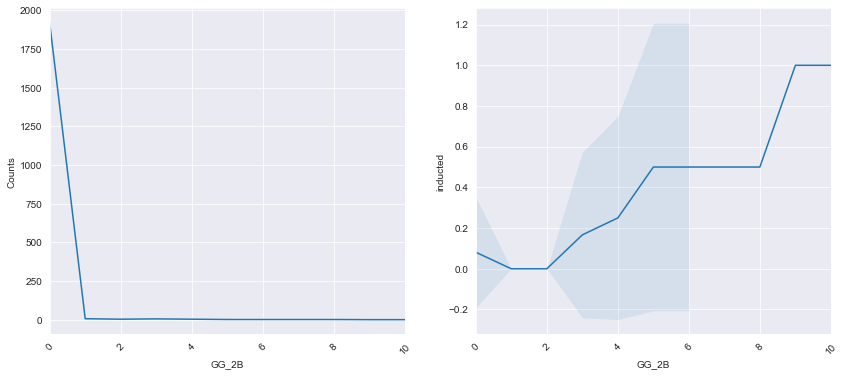

In [194]:
plot_feature(df_pos_play, 'GG_2B', 'inducted')

In [195]:
get_nlargest(df_pos_play, 10, 'GG_2B')

GG_2B  inducted
Name                             
Roberto Alomar   10.000     1.000
Ryne Sandberg     9.000     1.000
Bill Mazeroski    8.000     1.000
Frank White       8.000     0.000
Joe Morgan        5.000     1.000
Bobby Richardson  5.000     0.000
Craig Biggio      4.000     1.000
Bret Boone        4.000     0.000
Bobby Grich       4.000     0.000
Orlando Hudson    4.000     0.000

There is a positive correlation between Gold Gloves won at Second Base and induction into the Hall of Fame.

Second Base is a position with significant defensive responsibility, as described by the Defensive Spectrum.

https://en.wikipedia.org/wiki/Defensive_spectrum

#### Gold Gloves - Third Base

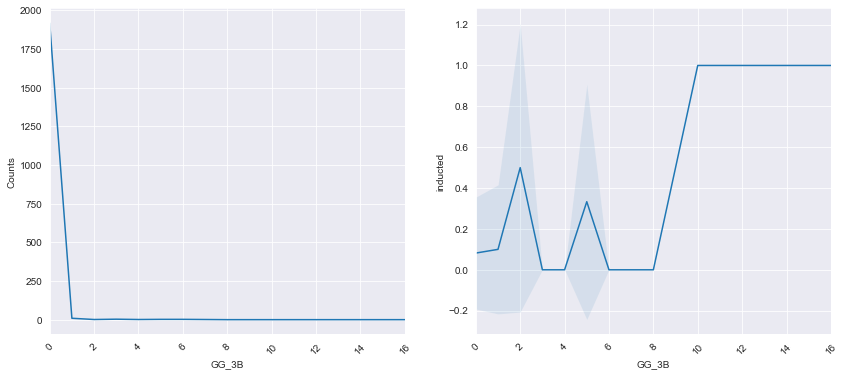

In [196]:
plot_feature(df_pos_play, 'GG_3B', 'inducted')

In [197]:
get_nlargest(df_pos_play, 10, 'GG_3B')

GG_3B  inducted
Name                            
Brooks Robinson 16.000     1.000
Mike Schmidt    10.000     1.000
Scott Rolen      8.000     0.000
Buddy Bell       6.000     0.000
Eric Chavez      6.000     0.000
Robin Ventura    6.000     0.000
Ken Boyer        5.000     0.000
Doug Rader       5.000     0.000
Ron Santo        5.000     1.000
Gary Gaetti      4.000     0.000

With the exception of the most extreme values, Gold Gloves @ 3B does not correlate with induction into the HOF.

#### Gold Gloves - Shortstop

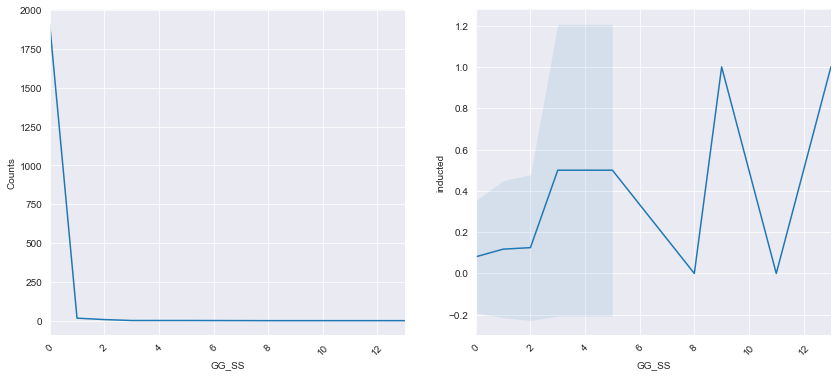

In [198]:
plot_feature(df_pos_play, 'GG_SS', 'inducted')

In [199]:
get_nlargest(df_pos_play, 10, 'GG_SS')

GG_SS  inducted
Name                            
Ozzie Smith     13.000     1.000
Omar Vizquel    11.000     0.000
Luis Aparicio    9.000     1.000
Mark Belanger    8.000     0.000
Dave Concepcion  5.000     0.000
Derek Jeter      5.000     1.000
Tony Fernandez   4.000     0.000
Alan Trammell    4.000     1.000
Barry Larkin     3.000     1.000
Roy McMillan     3.000     0.000

#### Gold Gloves - All Outfield Positions

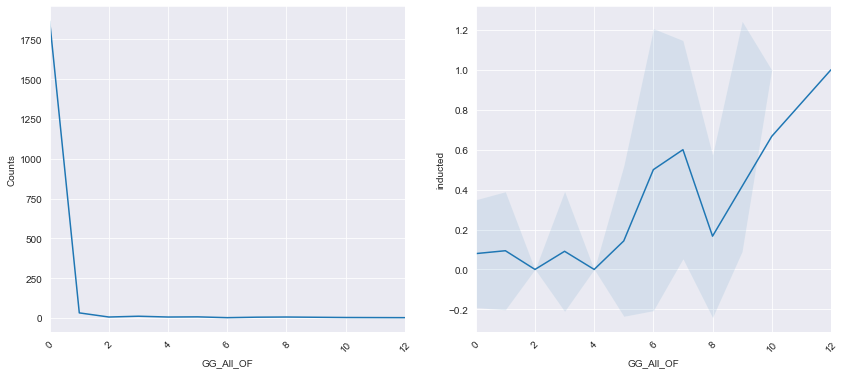

In [200]:
plot_feature(df_pos_play, 'GG_All_OF', 'inducted')

In [201]:
get_nlargest(df_pos_play, 10, 'GG_All_OF')

GG_All_OF  inducted
Name                                 
Roberto Clemente     12.000     1.000
Willie Mays          12.000     1.000
Ken Griffey          10.000     1.000
Andruw Jones         10.000     0.000
Al Kaline            10.000     1.000
Paul Blair            8.000     0.000
Barry Bonds           8.000     0.000
Andre Dawson          8.000     1.000
Jim Edmonds           8.000     0.000
Dwight Evans          8.000     0.000

### Wins Above Replacement (WAR)

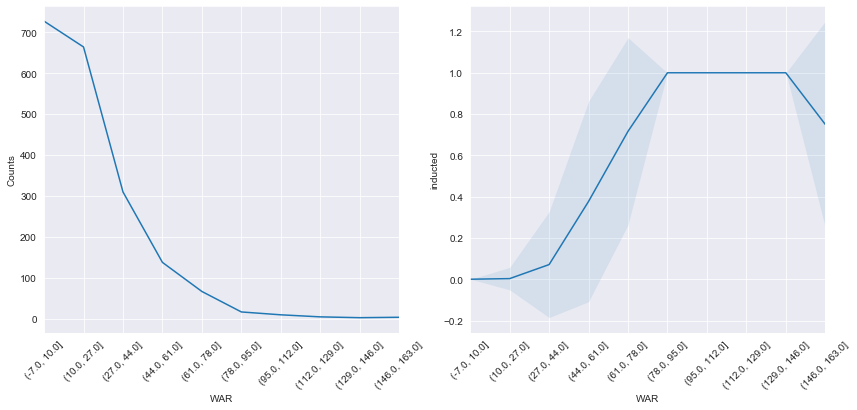

In [202]:
plot_feature(df_pos_play, 'WAR', 'inducted')

In [203]:
get_bin_members(df_pos_play, 'WAR', '10')

146.0 < WAR <= 163.0 
              inducted     WAR bin
Name                             
Barry Bonds     0.000 162.760  10
Babe Ruth       1.000 156.610  10
Willie Mays     1.000 156.220  10
Ty Cobb         1.000 150.950  10


In [204]:
get_bin_members(df_pos_play, 'WAR', '9')

129.0 < WAR <= 146.0 
               inducted     WAR bin
Name                              
Hank Aaron       1.000 143.100   9
Tris Speaker     1.000 134.260   9
Honus Wagner     1.000 130.850   9


In [205]:
get_bin_members(df_pos_play, 'WAR', '8')

112.0 < WAR <= 129.0 
                 inducted     WAR bin
Name                                
Stan Musial        1.000 128.320   8
Rogers Hornsby     1.000 127.110   8
Eddie Collins      1.000 123.870   8
Ted Williams       1.000 121.860   8
Lou Gehrig         1.000 114.060   8


In [206]:
get_bin_members(df_pos_play, 'WAR', '7')

95.0 < WAR <= 112.0 
                   inducted     WAR bin
Name                                  
Rickey Henderson     1.000 111.200   7
Mel Ott              1.000 110.660   7
Mickey Mantle        1.000 110.170   7
Nap Lajoie           1.000 107.250   7
Frank Robinson       1.000 107.240   7
Mike Schmidt         1.000 106.860   7
Joe Morgan           1.000 100.490   7
Carl Yastrzemski     1.000  96.420   7
Eddie Mathews        1.000  96.160   7
Cal Ripken           1.000  95.870   7


In [207]:
get_bin_members(df_pos_play, 'WAR', '6')

78.0 < WAR <= 95.0 
                    inducted    WAR bin
Name                                  
Roberto Clemente      1.000 94.760   6
Cap Anson             1.000 94.400   6
Jimmie Foxx           1.000 93.080   6
Al Kaline             1.000 92.800   6
Wade Boggs            1.000 91.380   6
George Brett          1.000 88.600   6
Chipper Jones         1.000 85.270   6
George Davis          1.000 84.740   6
Roger Connor          1.000 84.250   6
Ken Griffey           1.000 83.820   6
Charlie Gehringer     1.000 83.750   6
Rod Carew             1.000 81.250   6
Jeff Bagwell          1.000 79.880   6
Dan Brouthers         1.000 79.770   6
Joe DiMaggio          1.000 79.110   6
Brooks Robinson       1.000 78.380   6
Arky Vaughan          1.000 78.020   6


### Feature comparison

In [208]:
# Get between all descriptive features and inducted
df_pos_play[df_pos_play.columns[6:]].corr()['inducted'][:].sort_values(ascending=False)

inducted     1.000
indYear      1.000
WAR          0.645
R            0.560
H            0.547
TB           0.545
RBI          0.539
SF           0.514
Doubles      0.514
PA           0.504
AB           0.494
Triples      0.478
BB           0.463
IBB          0.461
Avg          0.424
GIDP         0.407
OPS          0.396
MVP          0.395
OBP          0.385
Slg          0.354
HR           0.348
CS           0.332
SBA          0.309
SB           0.295
HBP          0.243
SH           0.240
TC           0.233
GG_Total     0.211
SO           0.192
OF           0.183
RF           0.144
GG_All_OF    0.133
GG_OF        0.120
GG_2B        0.115
ROY          0.110
LF           0.104
GG_SS        0.102
1B           0.100
SB_Pct       0.098
GG_RF        0.094
CF           0.091
SS           0.088
2B           0.085
GG_CF        0.083
GG_3B        0.080
GG_C         0.066
3B           0.046
P            0.033
C            0.012
GG_LF        0.009
GG_1B       -0.014
Name: inducted, dtype: float64

In [209]:
# Get skewness of features
df_pos_play[df_pos_play.columns[6:]].skew(axis = 0, skipna = True).sort_values(ascending=False) 

GG_CF       35.668
GG_LF       29.143
GG_RF       28.058
GG_3B       16.752
GG_SS       16.452
GG_C        15.238
GG_1B       14.268
TC          13.709
GG_2B       13.559
P           13.002
GG_All_OF    8.105
GG_OF        8.023
MVP          7.711
ROY          5.196
GG_Total     5.100
IBB          3.811
3B           3.295
RF           3.284
2B           3.281
SS           3.280
CF           3.277
1B           3.249
LF           3.194
indYear      3.019
inducted     3.018
HBP          2.789
SB           2.643
C            2.576
SBA          2.382
HR           2.059
WAR          1.992
Triples      1.881
SH           1.762
CS           1.751
BB           1.583
SO           1.417
OF           1.293
RBI          1.186
GIDP         1.109
SF           0.988
R            0.981
TB           0.977
Doubles      0.973
H            0.787
PA           0.614
AB           0.588
Slg          0.375
OPS          0.282
Avg          0.228
OBP          0.161
SB_Pct      -0.835
dtype: float64

### Pitchers

In [210]:
df_pitchers.shape

(1146, 45)

In [211]:
df_pitchers.dtypes

playerID     object
Name         object
NumYears      int64
debut         int64
final         int64
W           float64
L           float64
G           float64
GS          float64
CG          float64
SHO         float64
SV          float64
H           float64
ER          float64
HR          float64
BB          float64
SO          float64
IBB         float64
WP          float64
HBP         float64
BK          float64
BFP         float64
GF          float64
R           float64
SH          float64
SF          float64
GIDP        float64
IP          float64
ERA         float64
WPct        float64
WHIP        float64
H9          float64
HR9         float64
BB9         float64
K9          float64
SOW         float64
P             int64
ROY         float64
MVP         float64
CYA         float64
GG_P        float64
WAR         float64
indYear     float64
votedBy      object
inducted    float64
dtype: object

In [212]:
pit_inducted_tab = pd.crosstab(index=df_pitchers["inducted"],  # Make a crosstab
                              columns="count")      # Name the count column

#Pct of Total
pit_inducted_tab['pct'] = pd.crosstab(index=df_pitchers["inducted"], columns="count", normalize ="columns") * 100 

pit_inducted_tab

col_0     count    pct
inducted              
0.000      1073 93.630
1.000        73  6.370

In [213]:
# Describe the dataset
df_pitchers.describe().transpose()

count     mean      std      min      25%      50%      75%  \
NumYears 1146.000   13.252    3.096   10.000   11.000   12.000   15.000   
debut    1146.000 1961.695   31.592 1871.000 1940.000 1970.000 1988.000   
final    1146.000 1974.816   31.398 1884.000 1954.000 1983.000 2001.000   
W        1146.000  105.470   68.288    8.000   55.000   92.000  137.000   
L        1146.000   95.117   50.690    9.000   56.250   91.000  122.000   
G        1146.000  442.141  172.556   92.000  318.000  403.000  536.750   
GS       1146.000  205.657  157.952    0.000   63.000  203.500  305.750   
CG       1146.000   71.021   95.413    0.000    4.000   35.000   94.750   
SHO      1146.000   11.669   13.350    0.000    1.000    7.000   17.000   
SV       1146.000   35.230   66.412    0.000    4.000   11.000   32.000   
H        1146.000 1733.318  994.023  197.000  959.000 1593.500 2259.250   
ER       1146.000  712.364  370.470   96.000  414.500  676.000  920.750   
HR       1146.000  130.880   82.615   14.000   67.250  112.000  173.000   
BB       1146.000  586.843  304.531   84.000  366.000  539.000  740.000   
SO       1146.000  976.325  610.202  137.000  570.250  829.000 1210.750   
IBB      1146.000   56.381   28.014    4.000   36.000   51.000   72.000   
WP       1146.000   47.788   36.654    1.000   25.000   39.000   59.000   
HBP      1146.000   43.962   35.214    2.000   21.000   34.000   54.000   
BK       1146.000    6.235    6.997    0.000    2.000    4.000    8.000   
BFP      1146.000 7471.023 4231.706 1015.000 4247.250 6785.000 9494.750   
GF       1146.000  117.691  133.348    0.000   34.000   72.500  155.000   
R        1146.000  835.205  474.442  103.000  469.000  777.000 1074.000   
SH       1146.000   80.169   46.878    5.000   46.000   73.000  103.750   
SF       1146.000   56.101   30.456    6.000   34.000   51.000   71.000   
GIDP     1146.000  157.952  101.933   11.000   83.000  137.000  203.750   
IP       1146.000 1762.634 1018.402  228.000  981.083 1582.333 2261.583   
ERA      1146.000    3.764    0.591    1.816    3.387    3.776    4.133   
WPct     1146.000    0.512    0.062    0.265    0.473    0.513    0.550   
WHIP     1146.000    1.341    0.108    0.998    1.267    1.339    1.413   
H9       1146.000    8.853    0.766    5.990    8.354    8.841    9.384   
HR9      1146.000    0.732    0.295    0.070    0.548    0.762    0.921   
BB9      1146.000    3.212    0.816    0.479    2.651    3.179    3.705   
K9       1146.000    5.316    1.754    1.804    3.988    5.225    6.439   
SOW      1146.000    1.713    0.592    0.502    1.300    1.655    2.029   
P        1146.000  442.141  172.556   92.000  318.000  403.000  536.750   
ROY      1146.000    0.015    0.121    0.000    0.000    0.000    0.000   
MVP      1146.000    0.020    0.158    0.000    0.000    0.000    0.000   
CYA      1146.000    0.079    0.425    0.000    0.000    0.000    0.000   
GG_P     1146.000    0.090    0.904    0.000    0.000    0.000    0.000   
WAR      1146.000   21.255   19.611   -4.600    8.355   16.140   27.340   
indYear  1146.000  125.947  483.118    0.000    0.000    0.000    0.000   
inducted 1146.000    0.064    0.244    0.000    0.000    0.000    0.000   

               max  
NumYears    27.000  
debut     2005.000  
final     2014.000  
W          511.000  
L          315.000  
G         1252.000  
GS         815.000  
CG         749.000  
SHO        110.000  
SV         652.000  
H         7092.000  
ER        2147.000  
HR         522.000  
BB        2795.000  
SO        5714.000  
IBB        179.000  
WP         343.000  
HBP        277.000  
BK          90.000  
BFP      29579.000  
GF         952.000  
R         3497.000  
SH         321.000  
SF         227.000  
GIDP       854.000  
IP        7356.000  
ERA          6.029  
WPct         0.717  
WHIP         1.674  
H9          11.259  
HR9          1.718  
BB9          7.082  
K9          11.920  
SOW          5.036  
P         1252.000  
ROY          1.000  
MVP      

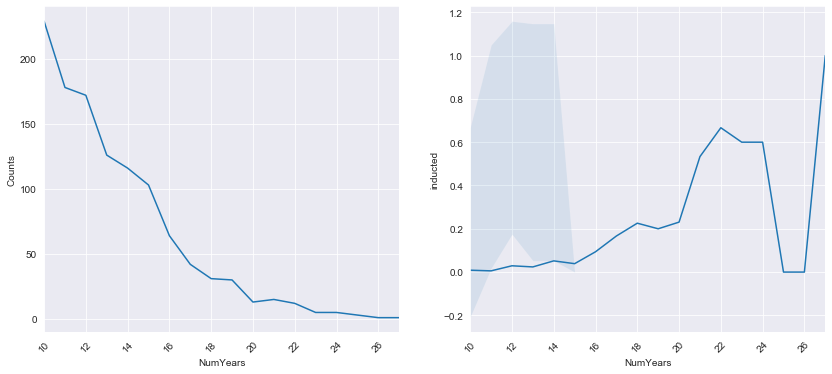

In [214]:
plot_feature(df_pitchers, 'NumYears', 'inducted')

In [215]:
get_bin_members(df_pitchers, 'NumYears', '10')

25.0 < NumYears <= 27.0 
             inducted  NumYears bin
Name                              
Nolan Ryan     1.000        27  10
Tommy John     0.000        26  10


In [216]:
get_bin_members(df_pitchers, 'NumYears', '9')

24.0 < NumYears <= 25.0 
                   inducted  NumYears bin
Name                                    
Jamie Moyer          0.000        25   9
Jim Kaat             0.000        25   9
Charlie Hough        0.000        25   9
Jesse Orosco         0.000        24   9
Steve Carlton        1.000        24   9
Dennis Eckersley     1.000        24   9
Roger Clemens        0.000        24   9
Phil Niekro          1.000        24   9


In [217]:
get_bin_members(df_pitchers, 'NumYears', '8')

22.0 < NumYears <= 24.0 
                  inducted  NumYears bin
Name                                   
Jack Quinn          0.000        23   8
Greg Maddux         1.000        23   8
Don Sutton          1.000        23   8
Early Wynn          1.000        23   8
Dennis Martinez     0.000        23   8
Mike Morgan         0.000        22   8
Joe Niekro          0.000        22   8
Gaylord Perry       1.000        22   8
Jerry Reuss         0.000        22   8
Tom Glavine         1.000        22   8
Rich Gossage        1.000        22   8
Red Ruffing         1.000        22   8
Sad Sam Jones       0.000        22   8
Bert Blyleven       1.000        22   8
Randy Johnson       1.000        22   8
Cy Young            1.000        22   8
Herb Pennock        1.000        22   8


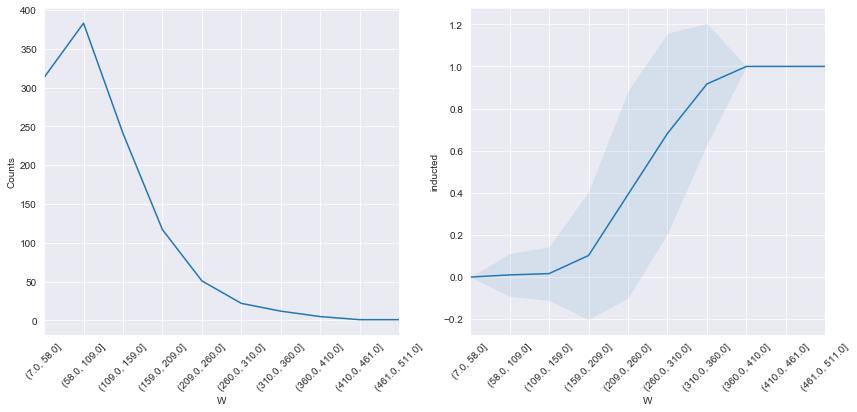

In [218]:
plot_feature(df_pitchers, 'W', 'inducted')

In [219]:
get_bin_members(df_pitchers, 'W', '10')

461.0 < W <= 511.0 
           inducted       W bin
Name                          
Cy Young     1.000 511.000  10


In [220]:
get_bin_members(df_pitchers, 'W', '9')

410.0 < W <= 461.0 
                 inducted       W bin
Name                                
Walter Johnson     1.000 417.000   9


In [221]:
get_bin_members(df_pitchers, 'W', '8')

360.0 < W <= 410.0 
                    inducted       W bin
Name                                   
Christy Mathewson     1.000 373.000   8
Pete Alexander        1.000 373.000   8
Pud Galvin            1.000 365.000   8
Warren Spahn          1.000 363.000   8
Kid Nichols           1.000 362.000   8


In [222]:
get_bin_members(df_pitchers, 'W', '7')

310.0 < W <= 360.0 
                    inducted       W bin
Name                                   
Greg Maddux           1.000 355.000   7
Roger Clemens         0.000 354.000   7
Tim Keefe             1.000 342.000   7
Steve Carlton         1.000 329.000   7
John Clarkson         1.000 328.000   7
Eddie Plank           1.000 326.000   7
Nolan Ryan            1.000 324.000   7
Don Sutton            1.000 324.000   7
Phil Niekro           1.000 318.000   7
Gaylord Perry         1.000 314.000   7
Tom Seaver            1.000 311.000   7
Old Hoss Radbourn     1.000 310.000   7


In [223]:
get_bin_members(df_pitchers, 'W', '6')

260.0 < W <= 310.0 
                  inducted       W bin
Name                                 
Mickey Welch        1.000 307.000   6
Tom Glavine         1.000 305.000   6
Randy Johnson       1.000 303.000   6
Early Wynn          1.000 300.000   6
Lefty Grove         1.000 300.000   6
Bobby Mathews       0.000 297.000   6
Tommy John          0.000 288.000   6
Bert Blyleven       1.000 287.000   6
Robin Roberts       1.000 286.000   6
Tony Mullane        0.000 284.000   6
Fergie Jenkins      1.000 284.000   6
Jim Kaat            0.000 283.000   6
Red Ruffing         1.000 273.000   6
Mike Mussina        1.000 270.000   6
Burleigh Grimes     1.000 270.000   6
Jamie Moyer         0.000 269.000   6
Jim Palmer          1.000 268.000   6
Bob Feller          1.000 266.000   6
Eppa Rixey          1.000 266.000   6
Jim McCormick       0.000 265.000   6
Gus Weyhing         0.000 264.000   6
Ted Lyons           1.000 260.000   6


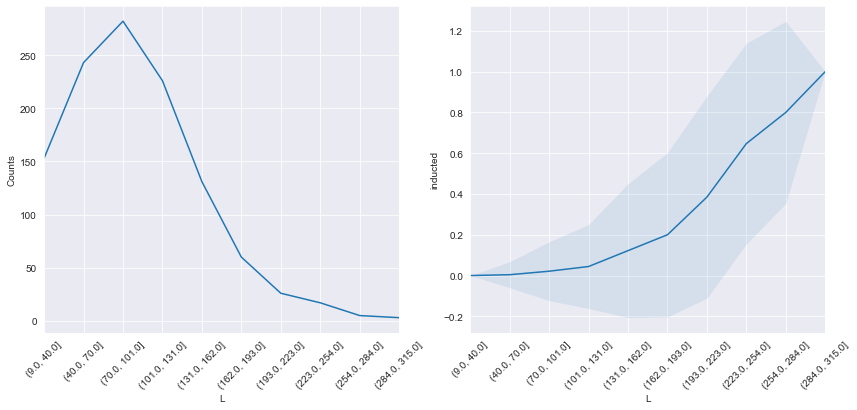

In [224]:
plot_feature(df_pitchers, 'L', 'inducted')

In [225]:
get_bin_members(df_pitchers, 'L', '10')

284.0 < L <= 315.0 
             inducted       L bin
Name                            
Cy Young       1.000 315.000  10
Pud Galvin     1.000 310.000  10
Nolan Ryan     1.000 292.000  10


In [226]:
get_bin_members(df_pitchers, 'L', '9')

254.0 < L <= 284.0 
                 inducted       L bin
Name                                
Walter Johnson     1.000 279.000   9
Phil Niekro        1.000 274.000   9
Gaylord Perry      1.000 265.000   9
Don Sutton         1.000 256.000   9
Jack Powell        0.000 255.000   9


In [227]:
get_bin_members(df_pitchers, 'L', '8')

223.0 < L <= 254.0 
                 inducted       L bin
Name                                
Eppa Rixey         1.000 251.000   8
Bert Blyleven      1.000 250.000   8
Bobby Mathews      0.000 248.000   8
Robin Roberts      1.000 245.000   8
Warren Spahn       1.000 245.000   8
Early Wynn         1.000 244.000   8
Steve Carlton      1.000 244.000   8
Jim Kaat           0.000 237.000   8
Frank Tanana       0.000 236.000   8
Gus Weyhing        0.000 232.000   8
Tommy John         0.000 231.000   8
Bob Friend         0.000 230.000   8
Ted Lyons          1.000 230.000   8
Greg Maddux        1.000 227.000   8
Fergie Jenkins     1.000 226.000   8
Red Ruffing        1.000 225.000   8
Tim Keefe          1.000 225.000   8


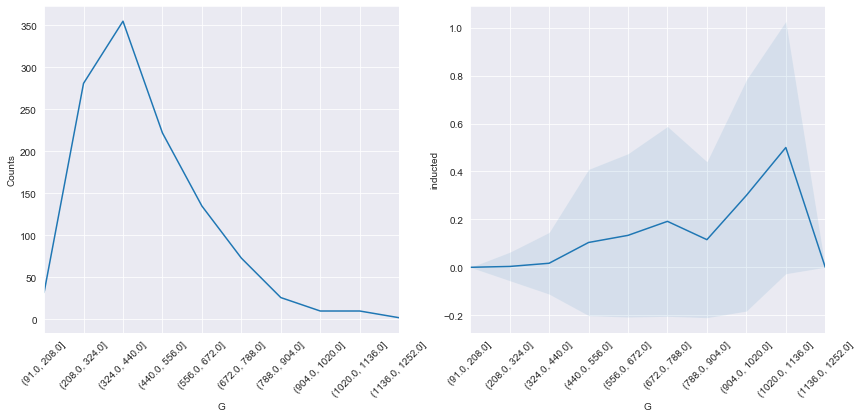

In [228]:
plot_feature(df_pitchers, 'G', 'inducted')

In [229]:
get_bin_members(df_pitchers, 'G', '10')

1136.0 < G <= 1252.0 
               inducted        G bin
Name                               
Jesse Orosco     0.000 1252.000  10
Mike Stanton     0.000 1178.000  10


In [230]:
get_bin_members(df_pitchers, 'G', '9')

1020.0 < G <= 1136.0 
                   inducted        G bin
Name                                   
John Franco          0.000 1119.000   9
Mariano Rivera       1.000 1115.000   9
Dennis Eckersley     1.000 1071.000   9
Hoyt Wilhelm         1.000 1070.000   9
Dan Plesac           0.000 1064.000   9
Mike Timlin          0.000 1058.000   9
Kent Tekulve         0.000 1050.000   9
Trevor Hoffman       1.000 1035.000   9
Lee Smith            1.000 1022.000   9
Jose Mesa            0.000 1022.000   9


In [231]:
get_bin_members(df_pitchers, 'G', '8')

904.0 < G <= 1020.0 
                    inducted        G bin
Name                                    
Roberto Hernandez     0.000 1010.000   8
Michael Jackson       0.000 1005.000   8
Rich Gossage          1.000 1002.000   8
Lindy McDaniel        0.000  987.000   8
Todd Jones            0.000  982.000   8
David Weathers        0.000  964.000   8
Rollie Fingers        1.000  944.000   8
Gene Garber           0.000  931.000   8
Eddie Guardado        0.000  908.000   8
Cy Young              1.000  906.000   8


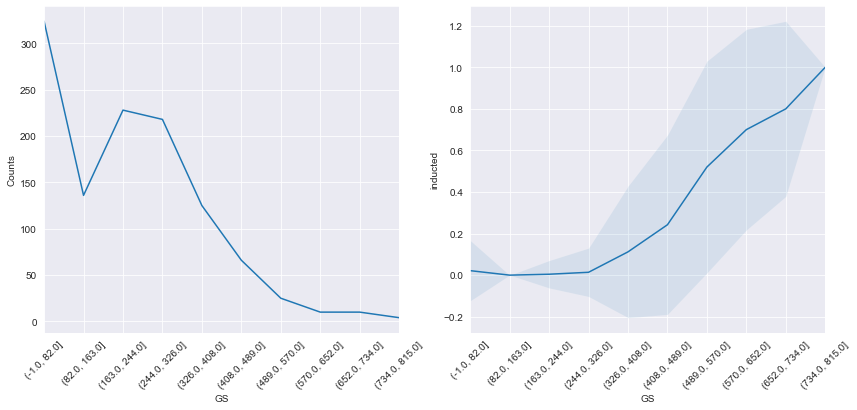

In [232]:
plot_feature(df_pitchers, 'GS', 'inducted')

In [233]:
get_bin_members(df_pitchers, 'GS', '10')

734.0 < GS <= 815.0 
              inducted      GS bin
Name                             
Cy Young        1.000 815.000  10
Nolan Ryan      1.000 773.000  10
Don Sutton      1.000 756.000  10
Greg Maddux     1.000 740.000  10


In [234]:
get_bin_members(df_pitchers, 'GS', '9')

652.0 < GS <= 734.0 
                 inducted      GS bin
Name                                
Phil Niekro        1.000 716.000   9
Steve Carlton      1.000 709.000   9
Roger Clemens      0.000 707.000   9
Tommy John         0.000 700.000   9
Gaylord Perry      1.000 690.000   9
Pud Galvin         1.000 688.000   9
Bert Blyleven      1.000 685.000   9
Tom Glavine        1.000 682.000   9
Walter Johnson     1.000 666.000   9
Warren Spahn       1.000 665.000   9


In [235]:
get_bin_members(df_pitchers, 'GS', '8')

570.0 < GS <= 652.0 
                 inducted      GS bin
Name                                
Tom Seaver         1.000 647.000   8
Jamie Moyer        0.000 638.000   8
Jim Kaat           0.000 625.000   8
Frank Tanana       0.000 616.000   8
Early Wynn         1.000 612.000   8
Robin Roberts      1.000 609.000   8
Randy Johnson      1.000 603.000   8
Pete Alexander     1.000 599.000   8
Tim Keefe          1.000 594.000   8
Fergie Jenkins     1.000 594.000   8


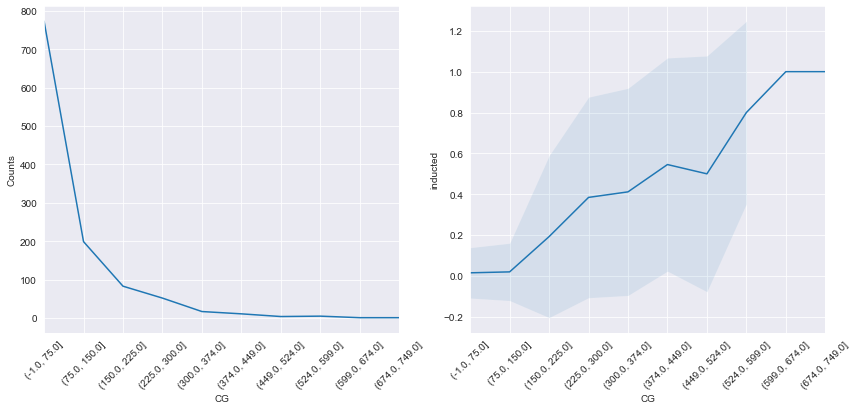

In [236]:
plot_feature(df_pitchers, 'CG', 'inducted')

In [237]:
get_bin_members(df_pitchers, 'CG', '10')

674.0 < CG <= 749.0 
           inducted      CG bin
Name                          
Cy Young     1.000 749.000  10


In [238]:
get_bin_members(df_pitchers, 'CG', '9')

599.0 < CG <= 674.0 
             inducted      CG bin
Name                            
Pud Galvin     1.000 646.000   9


In [239]:
get_bin_members(df_pitchers, 'CG', '8')

524.0 < CG <= 599.0 
                 inducted      CG bin
Name                                
Tim Keefe          1.000 554.000   8
Kid Nichols        1.000 532.000   8
Walter Johnson     1.000 531.000   8
Mickey Welch       1.000 525.000   8
Bobby Mathews      0.000 525.000   8


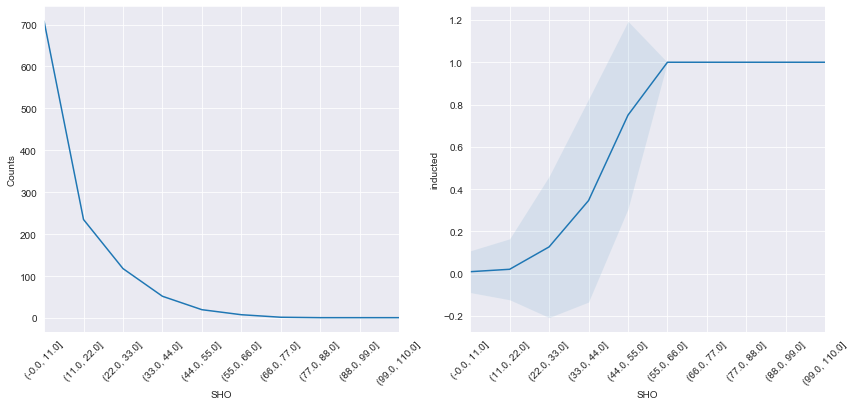

In [240]:
plot_feature(df_pitchers, 'SHO', 'inducted')

In [241]:
get_bin_members(df_pitchers, 'SHO', '10')

99.0 < SHO <= 110.0 
                 inducted     SHO bin
Name                                
Walter Johnson     1.000 110.000  10


In [242]:
get_bin_members(df_pitchers, 'SHO', '9')

88.0 < SHO <= 99.0 
                 inducted    SHO bin
Name                               
Pete Alexander     1.000 90.000   9


In [243]:
get_bin_members(df_pitchers, 'SHO', '8')

77.0 < SHO <= 88.0 
                    inducted    SHO bin
Name                                  
Christy Mathewson     1.000 79.000   8


In [244]:
get_bin_members(df_pitchers, 'SHO', '7')

66.0 < SHO <= 77.0 
              inducted    SHO bin
Name                            
Cy Young        1.000 76.000   7
Eddie Plank     1.000 69.000   7


In [245]:
get_bin_members(df_pitchers, 'SHO', '6')

55.0 < SHO <= 66.0 
                inducted    SHO bin
Name                              
Warren Spahn      1.000 63.000   6
Nolan Ryan        1.000 61.000   6
Tom Seaver        1.000 61.000   6
Bert Blyleven     1.000 60.000   6
Don Sutton        1.000 58.000   6
Ed Walsh          1.000 57.000   6
Pud Galvin        1.000 57.000   6
Bob Gibson        1.000 56.000   6


In [246]:
get_bin_members(df_pitchers, 'SHO', '5')

44.0 < SHO <= 55.0 
                 inducted    SHO bin
Name                               
Mordecai Brown     1.000 55.000   5
Steve Carlton      1.000 55.000   5
Gaylord Perry      1.000 53.000   5
Jim Palmer         1.000 53.000   5
Juan Marichal      1.000 52.000   5
Rube Waddell       1.000 50.000   5
Vic Willis         1.000 50.000   5
Fergie Jenkins     1.000 49.000   5
Early Wynn         1.000 49.000   5
Don Drysdale       1.000 49.000   5
Luis Tiant         0.000 49.000   5
Kid Nichols        1.000 48.000   5
Roger Clemens      0.000 46.000   5
Jack Powell        0.000 46.000   5
Tommy John         0.000 46.000   5
Robin Roberts      1.000 45.000   5
Whitey Ford        1.000 45.000   5
Doc White          0.000 45.000   5
Red Ruffing        1.000 45.000   5
Phil Niekro        1.000 45.000   5


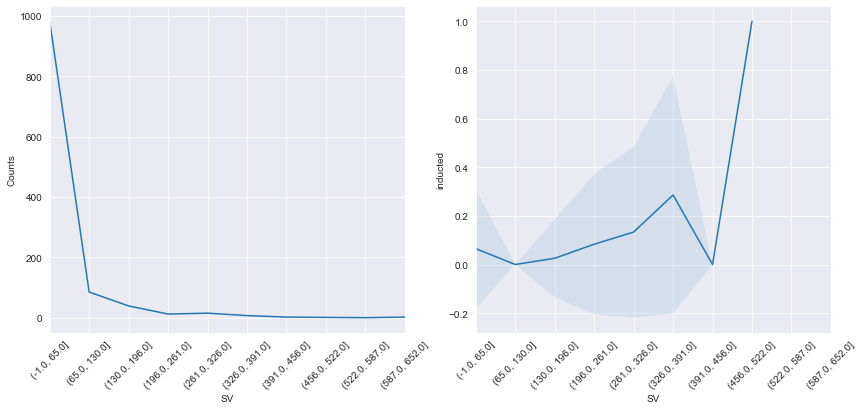

In [247]:
plot_feature(df_pitchers, 'SV', 'inducted')

In [248]:
get_bin_members(df_pitchers, 'SV', '10')

587.0 < SV <= 652.0 
                 inducted      SV bin
Name                                
Mariano Rivera     1.000 652.000  10
Trevor Hoffman     1.000 601.000  10


In [249]:
get_bin_members(df_pitchers, 'SV', '9')

522.0 < SV <= 587.0 
 Empty DataFrame
Columns: [inducted, SV, bin]
Index: []


In [250]:
get_bin_members(df_pitchers, 'SV', '8')

456.0 < SV <= 522.0 
            inducted      SV bin
Name                           
Lee Smith     1.000 478.000   8


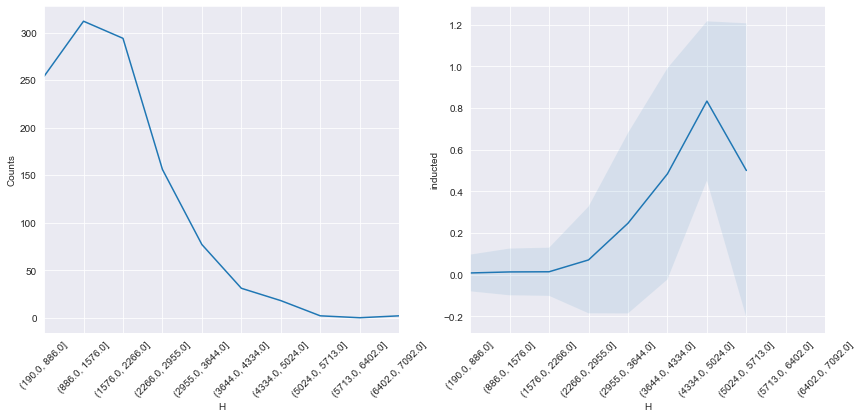

In [251]:
plot_feature(df_pitchers, 'H', 'inducted')

In [252]:
get_bin_members(df_pitchers, 'H', '10')

6402.0 < H <= 7092.0 
             inducted        H bin
Name                             
Cy Young       1.000 7092.000  10
Pud Galvin     1.000 6405.000  10


In [253]:
get_bin_members(df_pitchers, 'H', '9')

5713.0 < H <= 6402.0 
 Empty DataFrame
Columns: [inducted, H, bin]
Index: []


In [254]:
get_bin_members(df_pitchers, 'H', '8')

5024.0 < H <= 5713.0 
                inducted        H bin
Name                                
Bobby Mathews     0.000 5601.000   8
Phil Niekro       1.000 5044.000   8


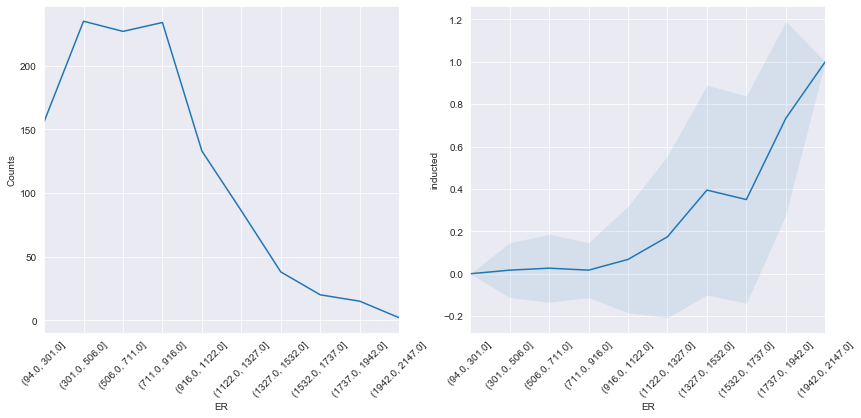

In [255]:
plot_feature(df_pitchers, 'ER', 'inducted')

In [256]:
get_bin_members(df_pitchers, 'ER', '10')

1942.0 < ER <= 2147.0 
              inducted       ER bin
Name                              
Cy Young        1.000 2147.000  10
Phil Niekro     1.000 2012.000  10


In [257]:
get_bin_members(df_pitchers, 'ER', '9')

1737.0 < ER <= 1942.0 
                inducted       ER bin
Name                                
Jamie Moyer       0.000 1926.000   9
Don Sutton        1.000 1914.000   9
Nolan Ryan        1.000 1911.000   9
Pud Galvin        1.000 1903.000   9
Gus Weyhing       0.000 1872.000   9
Steve Carlton     1.000 1864.000   9
Gaylord Perry     1.000 1846.000   9
Red Ruffing       1.000 1833.000   9
Bert Blyleven     1.000 1830.000   9
Warren Spahn      1.000 1798.000   9
Early Wynn        1.000 1796.000   9
Robin Roberts     1.000 1774.000   9
Greg Maddux       1.000 1756.000   9
Tommy John        0.000 1749.000   9
Jim Kaat          0.000 1738.000   9


In [258]:
get_bin_members(df_pitchers, 'ER', '8')

1532.0 < ER <= 1737.0 
                  inducted       ER bin
Name                                  
Tom Glavine         1.000 1734.000   8
Earl Whitehill      0.000 1726.000   8
Roger Clemens       0.000 1707.000   8
Frank Tanana        0.000 1704.000   8
Ted Lyons           1.000 1696.000   8
Fergie Jenkins      1.000 1669.000   8
Kid Nichols         1.000 1664.000   8
Bobo Newsom         0.000 1664.000   8
Jack Morris         1.000 1657.000   8
Sad Sam Jones       0.000 1656.000   8
Dennis Martinez     0.000 1643.000   8
Burleigh Grimes     1.000 1638.000   8
Charlie Hough       0.000 1582.000   8
Tim Wakefield       0.000 1582.000   8
David Wells         0.000 1578.000   8
Bobby Mathews       0.000 1573.000   8
Livan Hernandez     0.000 1572.000   8
Eppa Rixey          1.000 1572.000   8
Kenny Rogers        0.000 1568.000   8
Tony Mullane        0.000 1537.000   8


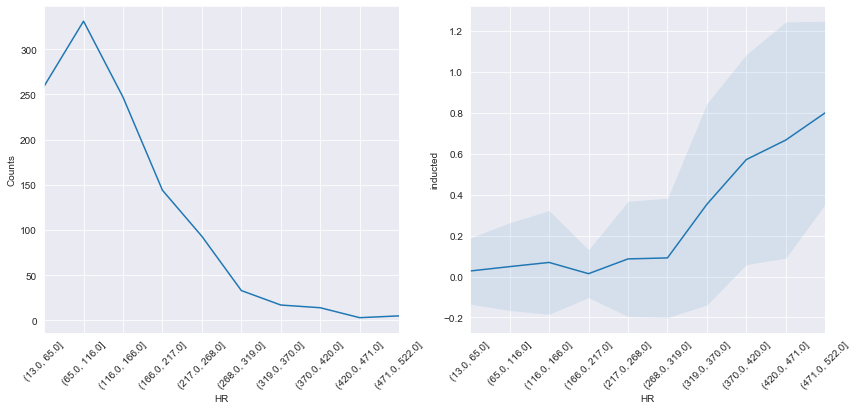

In [259]:
plot_feature(df_pitchers, 'HR', 'inducted')

In [260]:
get_bin_members(df_pitchers, 'HR', '10')

471.0 < HR <= 522.0 
                 inducted      HR bin
Name                                
Jamie Moyer        0.000 522.000  10
Robin Roberts      1.000 505.000  10
Fergie Jenkins     1.000 484.000  10
Phil Niekro        1.000 482.000  10
Don Sutton         1.000 472.000  10


In [261]:
get_bin_members(df_pitchers, 'HR', '9')

420.0 < HR <= 471.0 
                inducted      HR bin
Name                               
Frank Tanana      0.000 448.000   9
Warren Spahn      1.000 434.000   9
Bert Blyleven     1.000 430.000   9


In [262]:
get_bin_members(df_pitchers, 'HR', '8')

370.0 < HR <= 420.0 
                  inducted      HR bin
Name                                 
Tim Wakefield       0.000 418.000   8
Steve Carlton       1.000 414.000   8
Randy Johnson       1.000 411.000   8
David Wells         0.000 407.000   8
Gaylord Perry       1.000 399.000   8
Jim Kaat            0.000 395.000   8
Jack Morris         1.000 389.000   8
Charlie Hough       0.000 383.000   8
Tom Seaver          1.000 380.000   8
Mike Mussina        1.000 376.000   8
Catfish Hunter      1.000 374.000   8
Javier Vazquez      0.000 373.000   8
Dennis Martinez     0.000 372.000   8
Jim Bunning         1.000 372.000   8


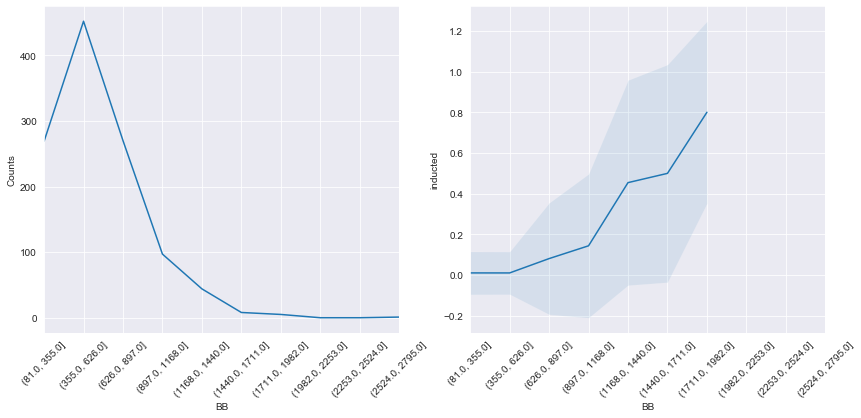

In [263]:
plot_feature(df_pitchers, 'BB', 'inducted')

In [264]:
get_bin_members(df_pitchers, 'BB', '10')

2524.0 < BB <= 2795.0 
             inducted       BB bin
Name                             
Nolan Ryan     1.000 2795.000  10


In [265]:
get_bin_members(df_pitchers, 'BB', '9')

2253.0 < BB <= 2524.0 
 Empty DataFrame
Columns: [inducted, BB, bin]
Index: []


In [266]:
get_bin_members(df_pitchers, 'BB', '8')

1982.0 < BB <= 2253.0 
 Empty DataFrame
Columns: [inducted, BB, bin]
Index: []


In [267]:
get_bin_members(df_pitchers, 'BB', '7')

1711.0 < BB <= 1982.0 
                inducted       BB bin
Name                                
Steve Carlton     1.000 1833.000   7
Phil Niekro       1.000 1809.000   7
Early Wynn        1.000 1775.000   7
Bob Feller        1.000 1764.000   7
Bobo Newsom       0.000 1732.000   7


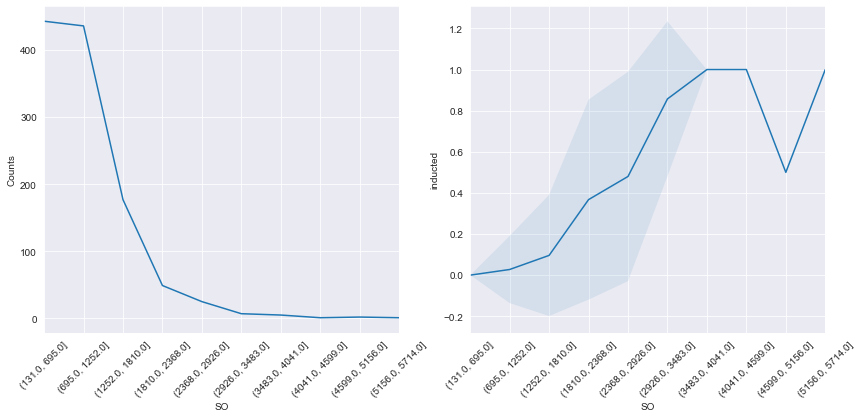

In [268]:
plot_feature(df_pitchers, 'SO', 'inducted')

In [269]:
get_bin_members(df_pitchers, 'SO', '10')

5156.0 < SO <= 5714.0 
             inducted       SO bin
Name                             
Nolan Ryan     1.000 5714.000  10


In [270]:
get_bin_members(df_pitchers, 'SO', '9')

4599.0 < SO <= 5156.0 
                inducted       SO bin
Name                                
Randy Johnson     1.000 4875.000   9
Roger Clemens     0.000 4672.000   9


In [271]:
get_bin_members(df_pitchers, 'SO', '8')

4041.0 < SO <= 4599.0 
                inducted       SO bin
Name                                
Steve Carlton     1.000 4136.000   8


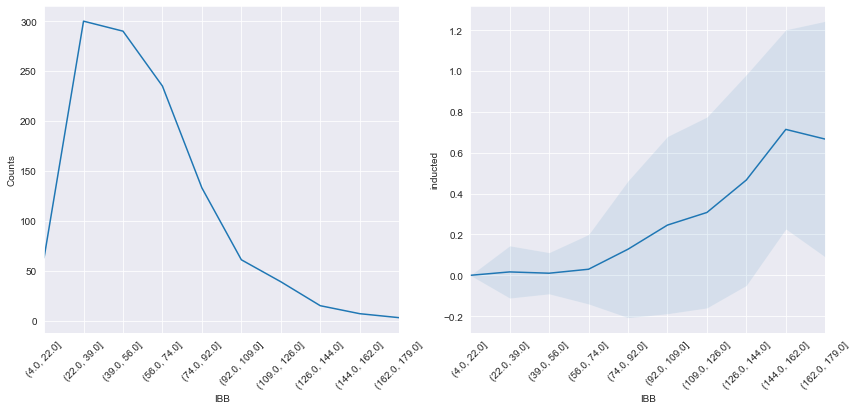

In [272]:
plot_feature(df_pitchers, 'IBB', 'inducted')

In [273]:
get_bin_members(df_pitchers, 'IBB', '10')

162.0 < IBB <= 179.0 
                inducted     IBB bin
Name                               
Kent Tekulve      0.000 179.000  10
Greg Maddux       1.000 177.000  10
Gaylord Perry     1.000 164.000  10


In [274]:
get_bin_members(df_pitchers, 'IBB', '9')

144.0 < IBB <= 162.0 
                 inducted     IBB bin
Name                                
Pud Galvin         1.000 157.000   9
Gene Garber        0.000 155.000   9
Cy Young           1.000 154.000   9
Jack Quinn         0.000 151.000   9
Steve Carlton      1.000 150.000   9
Walter Johnson     1.000 149.000   9
Tom Glavine        1.000 145.000   9


In [275]:
get_bin_members(df_pitchers, 'IBB', '8')

126.0 < IBB <= 144.0 
                  inducted     IBB bin
Name                                 
Burleigh Grimes     1.000 143.000   8
Bob Friend          0.000 141.000   8
Bobby Mathews       0.000 141.000   8
Ted Lyons           1.000 139.000   8
Waite Hoyt          1.000 137.000   8
Lindy McDaniel      0.000 136.000   8
Bobo Newsom         0.000 135.000   8
Eppa Rixey          1.000 134.000   8
Red Faber           1.000 131.000   8
Mel Harder          0.000 131.000   8
Greg Minton         0.000 131.000   8
Warren Spahn        1.000 130.000   8
Red Ruffing         1.000 130.000   8
Sad Sam Jones       0.000 129.000   8
Tug McGraw          0.000 128.000   8


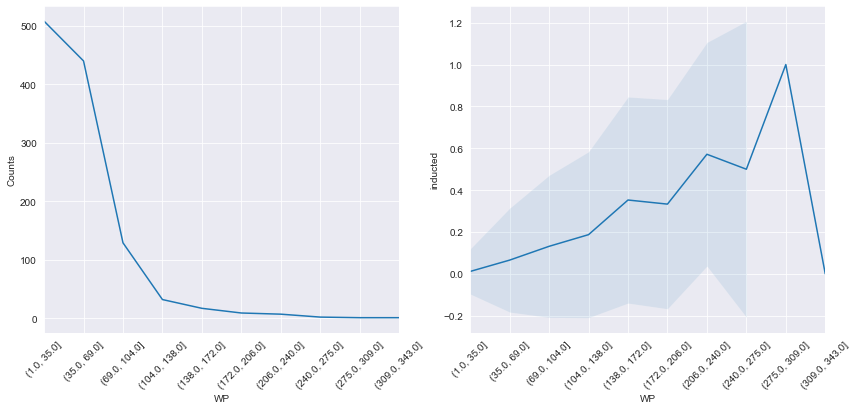

In [276]:
plot_feature(df_pitchers, 'WP', 'inducted')

In [277]:
get_bin_members(df_pitchers, 'WP', '10')

309.0 < WP <= 343.0 
               inducted      WP bin
Name                              
Tony Mullane     0.000 343.000  10


In [278]:
get_bin_members(df_pitchers, 'WP', '9')

275.0 < WP <= 309.0 
             inducted      WP bin
Name                            
Nolan Ryan     1.000 277.000   9


In [279]:
get_bin_members(df_pitchers, 'WP', '8')

240.0 < WP <= 275.0 
                inducted      WP bin
Name                               
Mickey Welch      1.000 274.000   8
Bobby Mathews     0.000 253.000   8


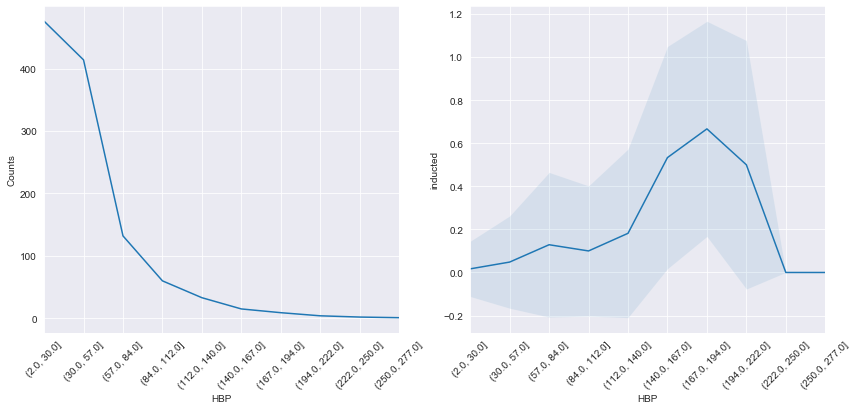

In [280]:
plot_feature(df_pitchers, 'HBP', 'inducted')

In [281]:
get_bin_members(df_pitchers, 'HBP', '10')

250.0 < HBP <= 277.0 
              inducted     HBP bin
Name                             
Gus Weyhing     0.000 277.000  10


In [282]:
get_bin_members(df_pitchers, 'HBP', '9')

222.0 < HBP <= 250.0 
                inducted     HBP bin
Name                               
Bobby Mathews     0.000 247.000   9
Tony Mullane      0.000 227.000   9


In [283]:
get_bin_members(df_pitchers, 'HBP', '8')

194.0 < HBP <= 222.0 
                 inducted     HBP bin
Name                                
Chick Fraser       0.000 219.000   8
Pink Hawley        0.000 210.000   8
Walter Johnson     1.000 203.000   8
Tim Keefe          1.000 198.000   8


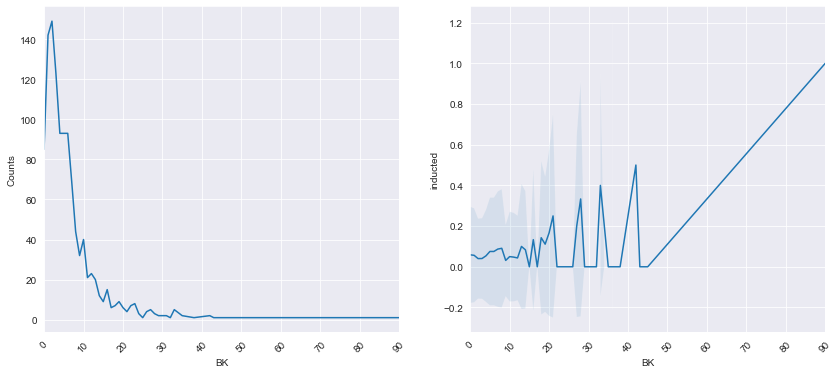

In [284]:
plot_feature(df_pitchers, 'BK', 'inducted')

In [285]:
get_bin_members(df_pitchers, 'BK', '10')

81.0 < BK <= 90.0 
                inducted     BK bin
Name                              
Steve Carlton     1.000 90.000  10


In [286]:
get_bin_members(df_pitchers, 'BK', '9')

72.0 < BK <= 81.0 
 Empty DataFrame
Columns: [inducted, BK, bin]
Index: []


In [287]:
get_bin_members(df_pitchers, 'BK', '8')

63.0 < BK <= 72.0 
 Empty DataFrame
Columns: [inducted, BK, bin]
Index: []


In [288]:
get_bin_members(df_pitchers, 'BK', '7')

54.0 < BK <= 63.0 
 Empty DataFrame
Columns: [inducted, BK, bin]
Index: []


In [289]:
get_bin_members(df_pitchers, 'BK', '6')

45.0 < BK <= 54.0 
 Empty DataFrame
Columns: [inducted, BK, bin]
Index: []


In [290]:
get_bin_members(df_pitchers, 'BK', '5')

36.0 < BK <= 45.0 
                 inducted     BK bin
Name                               
Bob Welch          0.000 45.000   5
Buddy Black        0.000 43.000   5
Phil Niekro        1.000 42.000   5
Charlie Hough      0.000 42.000   5
Rick Sutcliffe     0.000 38.000   5


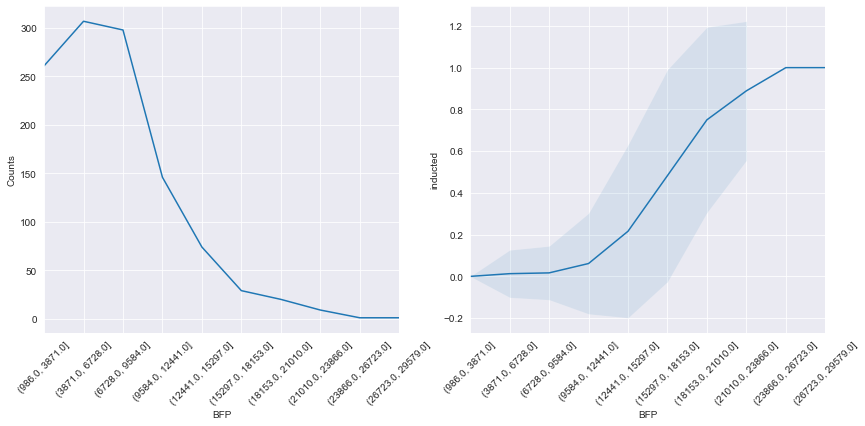

In [291]:
plot_feature(df_pitchers, 'BFP', 'inducted')

In [292]:
get_bin_members(df_pitchers, 'BFP', '10')

26723.0 < BFP <= 29579.0 
           inducted       BFP bin
Name                            
Cy Young     1.000 29579.000  10


In [293]:
get_bin_members(df_pitchers, 'BFP', '9')

23866.0 < BFP <= 26723.0 
             inducted       BFP bin
Name                              
Pud Galvin     1.000 25415.000   9


In [294]:
get_bin_members(df_pitchers, 'BFP', '8')

21010.0 < BFP <= 23866.0 
                 inducted       BFP bin
Name                                  
Walter Johnson     1.000 23642.000   8
Phil Niekro        1.000 22677.000   8
Nolan Ryan         1.000 22575.000   8
Bobby Mathews      0.000 21997.000   8
Gaylord Perry      1.000 21953.000   8
Steve Carlton      1.000 21683.000   8
Don Sutton         1.000 21631.000   8
Warren Spahn       1.000 21547.000   8
Kid Nichols        1.000 21082.000   8


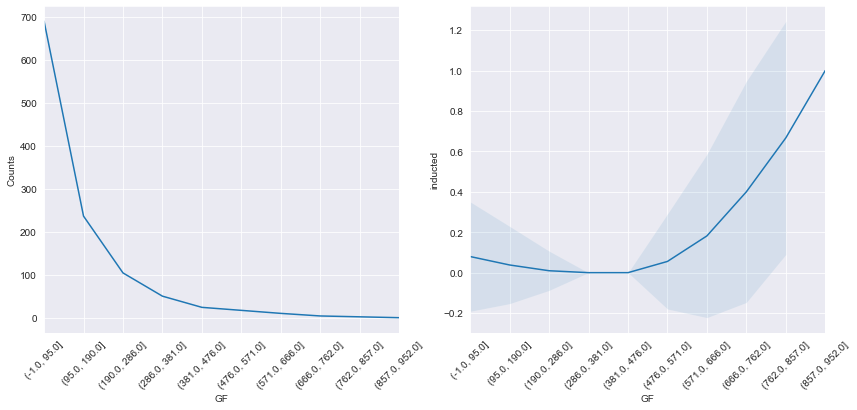

In [295]:
plot_feature(df_pitchers, 'GF', 'inducted')

In [296]:
get_bin_members(df_pitchers, 'GF', '10')

857.0 < GF <= 952.0 
                 inducted      GF bin
Name                                
Mariano Rivera     1.000 952.000  10


In [297]:
get_bin_members(df_pitchers, 'GF', '9')

762.0 < GF <= 857.0 
                 inducted      GF bin
Name                                
Trevor Hoffman     1.000 856.000   9
Lee Smith          1.000 802.000   9
John Franco        0.000 774.000   9


In [298]:
get_bin_members(df_pitchers, 'GF', '8')

666.0 < GF <= 762.0 
                    inducted      GF bin
Name                                   
Rollie Fingers        1.000 709.000   8
Billy Wagner          0.000 703.000   8
Jeff Reardon          0.000 695.000   8
Rich Gossage          1.000 681.000   8
Roberto Hernandez     0.000 667.000   8


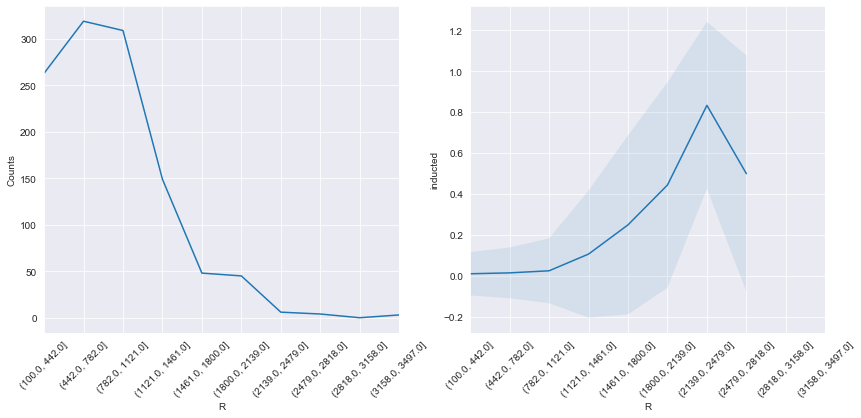

In [299]:
plot_feature(df_pitchers, 'R', 'inducted')

In [300]:
get_bin_members(df_pitchers, 'R', '10')

3158.0 < R <= 3497.0 
                inducted        R bin
Name                                
Bobby Mathews     0.000 3497.000  10
Pud Galvin        1.000 3352.000  10
Cy Young          1.000 3167.000  10


In [301]:
get_bin_members(df_pitchers, 'R', '9')

2818.0 < R <= 3158.0 
 Empty DataFrame
Columns: [inducted, R, bin]
Index: []


In [302]:
get_bin_members(df_pitchers, 'R', '8')

2479.0 < R <= 2818.0 
               inducted        R bin
Name                               
Gus Weyhing      0.000 2796.000   8
Mickey Welch     1.000 2556.000   8
Tony Mullane     0.000 2523.000   8
Kid Nichols      1.000 2480.000   8


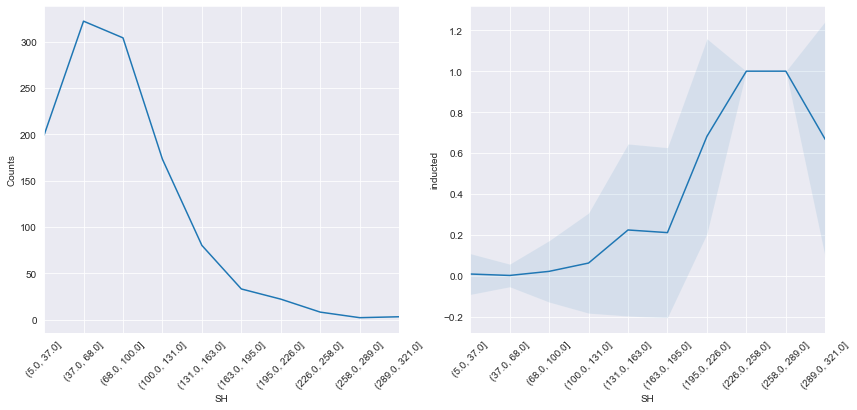

In [303]:
plot_feature(df_pitchers, 'SH', 'inducted')

In [304]:
get_bin_members(df_pitchers, 'SH', '10')

289.0 < SH <= 321.0 
                inducted      SH bin
Name                               
Pud Galvin        1.000 321.000  10
Bobby Mathews     0.000 305.000  10
Cy Young          1.000 302.000  10


In [305]:
get_bin_members(df_pitchers, 'SH', '9')

258.0 < SH <= 289.0 
                 inducted      SH bin
Name                                
Greg Maddux        1.000 274.000   9
Walter Johnson     1.000 259.000   9


In [306]:
get_bin_members(df_pitchers, 'SH', '8')

226.0 < SH <= 258.0 
                 inducted      SH bin
Name                                
Pete Alexander     1.000 241.000   8
Mickey Welch       1.000 238.000   8
Ted Lyons          1.000 233.000   8
Steve Carlton      1.000 232.000   8
Gaylord Perry      1.000 231.000   8
Warren Spahn       1.000 230.000   8
Tom Glavine        1.000 228.000   8
Kid Nichols        1.000 227.000   8


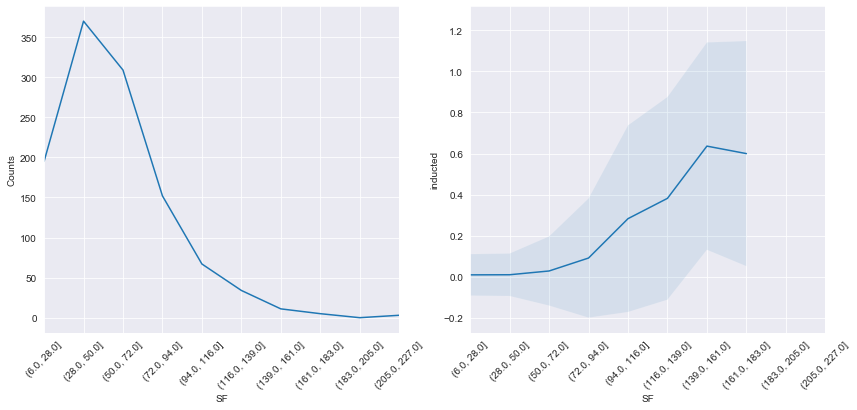

In [307]:
plot_feature(df_pitchers, 'SF', 'inducted')

In [308]:
get_bin_members(df_pitchers, 'SF', '10')

205.0 < SF <= 227.0 
                inducted      SF bin
Name                               
Bobby Mathews     0.000 227.000  10
Pud Galvin        1.000 219.000  10
Cy Young          1.000 214.000  10


In [309]:
get_bin_members(df_pitchers, 'SF', '9')

183.0 < SF <= 205.0 
 Empty DataFrame
Columns: [inducted, SF, bin]
Index: []


In [310]:
get_bin_members(df_pitchers, 'SF', '8')

161.0 < SF <= 183.0 
               inducted      SF bin
Name                              
Gus Weyhing      0.000 175.000   8
Tim Keefe        1.000 175.000   8
Kid Nichols      1.000 167.000   8
Tony Mullane     0.000 167.000   8
Mickey Welch     1.000 166.000   8


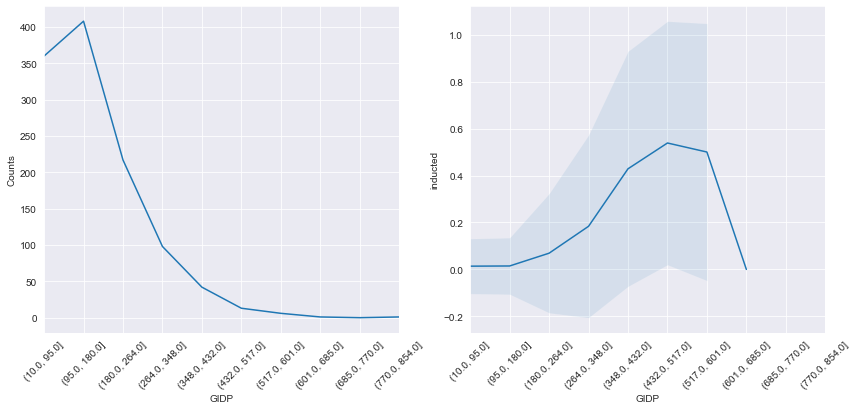

In [311]:
plot_feature(df_pitchers, 'GIDP', 'inducted')

In [312]:
get_bin_members(df_pitchers, 'GIDP', '10')

770.0 < GIDP <= 854.0 
           inducted    GIDP bin
Name                          
Cy Young     1.000 854.000  10


In [313]:
get_bin_members(df_pitchers, 'GIDP', '9')

685.0 < GIDP <= 770.0 
 Empty DataFrame
Columns: [inducted, GIDP, bin]
Index: []


In [314]:
get_bin_members(df_pitchers, 'GIDP', '8')

601.0 < GIDP <= 685.0 
              inducted    GIDP bin
Name                             
Bill Bailey     0.000 628.000   8


In [315]:
get_bin_members(df_pitchers, 'GIDP', '7')

517.0 < GIDP <= 601.0 
              inducted    GIDP bin
Name                             
Frank Smith     0.000 594.000   7
Jack Powell     0.000 559.000   7
Tommy John      0.000 537.000   7
Eddie Plank     1.000 536.000   7
Vic Willis      1.000 531.000   7
Kid Nichols     1.000 519.000   7


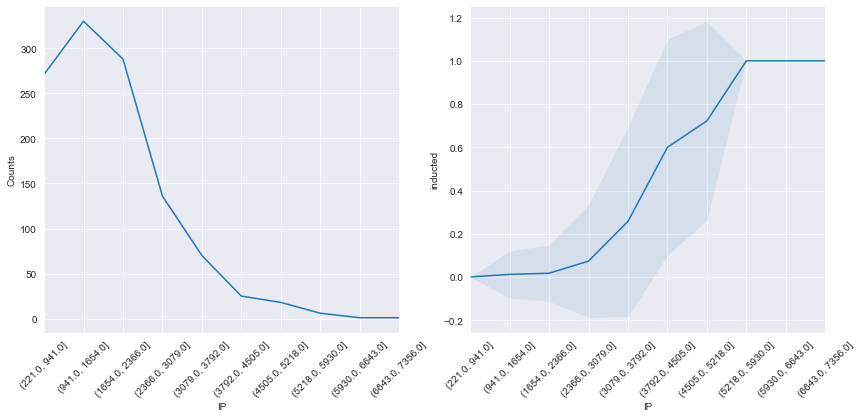

In [316]:
plot_feature(df_pitchers, 'IP', 'inducted')

In [317]:
get_bin_members(df_pitchers, 'IP', '10')

6643.0 < IP <= 7356.0 
           inducted       IP bin
Name                           
Cy Young     1.000 7356.000  10


In [318]:
get_bin_members(df_pitchers, 'IP', '9')

5930.0 < IP <= 6643.0 
             inducted       IP bin
Name                             
Pud Galvin     1.000 6003.333   9


In [319]:
get_bin_members(df_pitchers, 'IP', '8')

5218.0 < IP <= 5930.0 
                 inducted       IP bin
Name                                 
Walter Johnson     1.000 5914.667   8
Phil Niekro        1.000 5404.333   8
Nolan Ryan         1.000 5386.000   8
Gaylord Perry      1.000 5350.333   8
Don Sutton         1.000 5282.333   8
Warren Spahn       1.000 5243.667   8


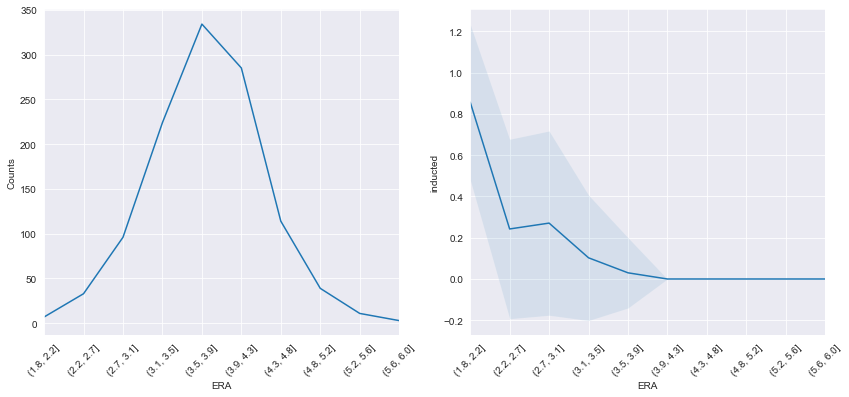

In [320]:
plot_feature(df_pitchers, 'ERA', 'inducted')

In [321]:
get_bin_members(df_pitchers, 'ERA', '1')

2.0 < ERA <= 2.0 
                    inducted   ERA bin
Name                                 
Mariano Rivera        1.000 2.209   1
Walter Johnson        1.000 2.167   1
Rube Waddell          1.000 2.161   1
Tommy Bond            0.000 2.138   1
Christy Mathewson     1.000 2.133   1
Mordecai Brown        1.000 2.057   1
Ed Walsh              1.000 1.816   1


In [322]:
get_bin_members(df_pitchers, 'ERA', '2')

2.0 < ERA <= 3.0 
                   inducted   ERA bin
Name                                
Dick Rudolph         0.000 2.657   2
Joe McGinnity        1.000 2.657   2
Jack Taylor          0.000 2.653   2
Claude Hendrix       0.000 2.649   2
Nick Altrock         0.000 2.645   2
Barney Pelty         0.000 2.632   2
Red Ames             0.000 2.629   2
Vic Willis           1.000 2.628   2
Tim Keefe            1.000 2.627   2
Cy Young             1.000 2.627   2
Frank Smith          0.000 2.592   2
Deacon Phillippe     0.000 2.586   2
Slim Sallee          0.000 2.564   2
Pete Alexander       1.000 2.560   2
Hoyt Wilhelm         1.000 2.523   2
Cy Morgan            0.000 2.509   2
Bob Ewing            0.000 2.492   2
Hippo Vaughn         0.000 2.486   2
Lefty Leifield       0.000 2.473   2
Sam Leever           0.000 2.473   2
Hooks Wiltse         0.000 2.471   2
Chief Bender         1.000 2.455   2
George Bradley       0.000 2.434   2
Jim McCormick        0.000 2.431   2
Nap Rucker         

In [323]:
get_bin_members(df_pitchers, 'ERA', '3')

3.0 < ERA <= 3.0 
                    inducted   ERA bin
Name                                 
Gary Nolan            0.000 3.079   3
Rube Marquard         1.000 3.076   3
Ed Willett            0.000 3.076   3
Bob Veale             0.000 3.075   3
Jim Brewer            0.000 3.070   3
...                     ...   ...  ..
Jack Chesbro          1.000 2.684   3
Cy Falkenberg         0.000 2.682   3
Old Hoss Radbourn     1.000 2.678   3
Dave Smith            0.000 2.669   3
Tom Henke             0.000 2.667   3

[96 rows x 3 columns]


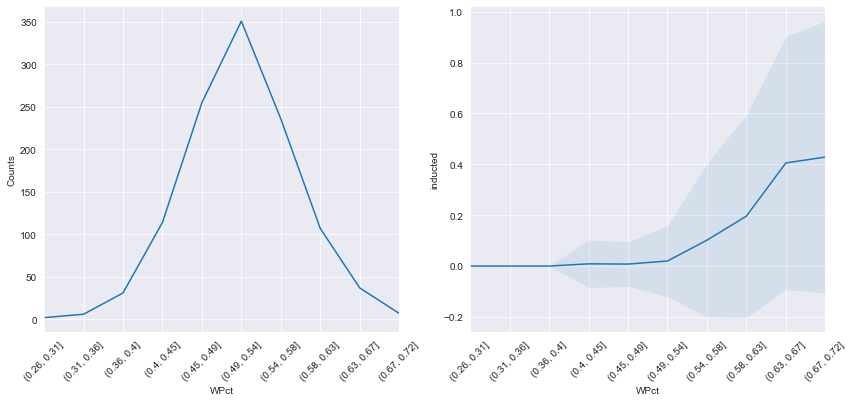

In [324]:
plot_feature(df_pitchers, 'WPct', 'inducted')

In [325]:
get_bin_members(df_pitchers, 'WPct', '10')

1.0 < WPct <= 1.0 
                 inducted  WPct bin
Name                              
Spud Chandler      0.000 0.717  10
Rich Garces        0.000 0.697  10
Ron Mahay          0.000 0.692  10
Whitey Ford        1.000 0.690  10
Pedro Martinez     1.000 0.687  10
Lefty Grove        1.000 0.680  10
Dave Tomlin        0.000 0.676  10


In [326]:
get_bin_members(df_pitchers, 'WPct', '9')

1.0 < WPct <= 1.0 
                    inducted  WPct bin
Name                                 
Vic Raschi            0.000 0.667   9
Christy Mathewson     1.000 0.665   9
Ted Wilks             0.000 0.663   9
Sam Leever            0.000 0.660   9
Roy Halladay          1.000 0.659   9
Roger Clemens         0.000 0.658   9
Sal Maglie            0.000 0.657   9
Sandy Koufax          1.000 0.655   9
Johnny Allen          0.000 0.654   9
Ron Guidry            0.000 0.651   9
Lefty Gomez           1.000 0.649   9
John Clarkson         1.000 0.648   9
Mordecai Brown        1.000 0.648   9
Jim Poole             0.000 0.647   9
Al Hrabosky           0.000 0.646   9
Randy Johnson         1.000 0.646   9
Dizzy Dean            1.000 0.644   9
Pete Alexander        1.000 0.642   9
Johan Santana         0.000 0.641   9
Pedro Borbon          0.000 0.639   9
Mike Mussina          1.000 0.638   9
Jim Palmer            1.000 0.638   9
Johnny Murphy         0.000 0.637   9
Kid Nichols           1.000 0.

In [327]:
get_bin_members(df_pitchers, 'WPct', '8')

1.0 < WPct <= 1.0 
                 inducted  WPct bin
Name                              
Ed Roebuck         0.000 0.627   8
Andy Pettitte      0.000 0.626   8
Chief Bender       1.000 0.625   8
Nig Cuppy          0.000 0.625   8
Don Newcombe       0.000 0.623   8
...                  ...   ...  ..
Kenny Rogers       0.000 0.584   8
Eddie Cicotte      0.000 0.584   8
George Pipgras     0.000 0.583   8
Dennis Cook        0.000 0.582   8
Lance Painter      0.000 0.581   8

[107 rows x 3 columns]


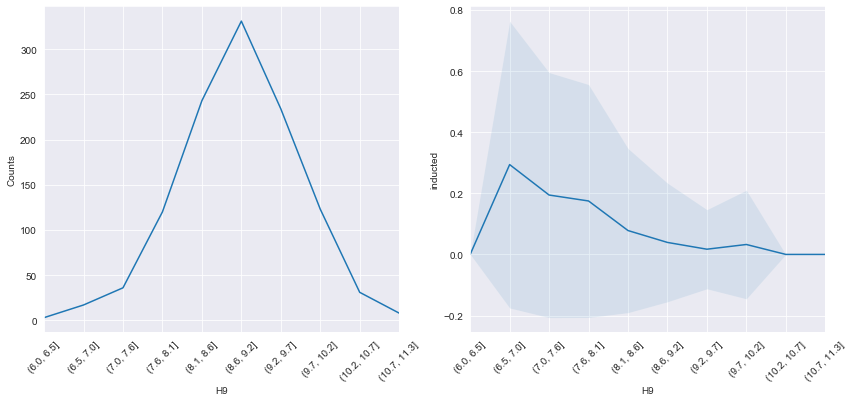

In [328]:
plot_feature(df_pitchers, 'H9', 'inducted')

In [329]:
get_bin_members(df_pitchers, 'H9', '1')

6.0 < H9 <= 7.0 
                  inducted    H9 bin
Name                               
Armando Benitez     0.000 6.297   1
Troy Percival       0.000 6.083   1
Billy Wagner        0.000 5.990   1


In [330]:
get_bin_members(df_pitchers, 'H9', '2')

7.0 < H9 <= 7.0 
                   inducted    H9 bin
Name                                
Sam McDowell         0.000 7.034   2
Hoyt Wilhelm         1.000 7.014   2
Mariano Rivera       1.000 6.997   2
Jose Valverde        0.000 6.996   2
Mitch Williams       0.000 6.991   2
Trevor Hoffman       1.000 6.990   2
Mike Adams           0.000 6.982   2
Ugueth Urbina        0.000 6.957   2
Matt Mantei          0.000 6.945   2
Andy Messersmith     0.000 6.937   2
Tom Hall             0.000 6.924   2
Tom Henke            0.000 6.918   2
J. R. Richard        0.000 6.876   2
Sid Fernandez        0.000 6.851   2
Sandy Koufax         1.000 6.792   2
Ryne Duren           0.000 6.765   2
Nolan Ryan           1.000 6.555   2


In [331]:
get_bin_members(df_pitchers, 'H9', '3')

7.0 < H9 <= 8.0 
                  inducted    H9 bin
Name                               
Brian Fuentes       0.000 7.557   3
Steve Hamilton      0.000 7.548   3
Mark Clear          0.000 7.542   3
John Hiller         0.000 7.536   3
Tommy Byrne         0.000 7.520   3
Mike Gonzalez       0.000 7.515   3
Rube Waddell        1.000 7.476   3
Walter Johnson      1.000 7.476   3
Tom Seaver          1.000 7.473   3
Keith Foulke        0.000 7.459   3
J. J. Putz          0.000 7.449   3
Rich Gossage        1.000 7.446   3
Michael Jackson     0.000 7.445   3
Pete Richert        0.000 7.404   3
Jim Maloney         0.000 7.389   3
Jose DeLeon         0.000 7.381   3
Cy Morgan           0.000 7.348   3
Brad Lidge          0.000 7.339   3
Jesse Orosco        0.000 7.330   3
Randy Johnson       1.000 7.282   3
Jeff Nelson         0.000 7.260   3
Mario Soto          0.000 7.256   3
John Wetteland      0.000 7.247   3
Eric Gagne          0.000 7.243   3
Octavio Dotel       0.000 7.240   3
Ed Reulbac

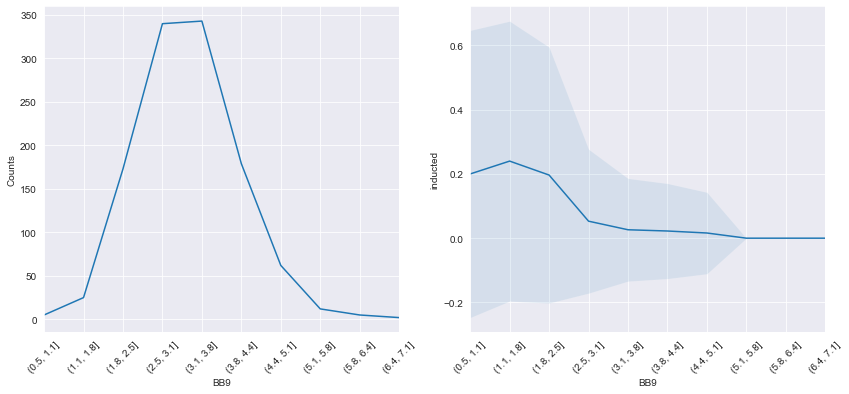

In [332]:
plot_feature(df_pitchers, 'BB9', 'inducted')

In [333]:
get_bin_members(df_pitchers, 'BB9', '1')

0.0 < BB9 <= 1.0 
                 inducted   BB9 bin
Name                              
Pud Galvin         1.000 1.117   1
Jim Whitney        0.000 1.058   1
Bobby Mathews      0.000 0.966   1
George Bradley     0.000 0.600   1
Tommy Bond         0.000 0.479   1


In [334]:
get_bin_members(df_pitchers, 'BB9', '2')

1.0 < BB9 <= 2.0 
                    inducted   BB9 bin
Name                                 
Pete Donohue          0.000 1.798   2
Greg Maddux           1.000 1.795   2
Al Orth               0.000 1.773   2
Dick Rudolph          0.000 1.766   2
Old Hoss Radbourn     1.000 1.739   2
Robin Roberts         1.000 1.731   2
Fritz Peterson        0.000 1.728   2
Jon Lieber            0.000 1.728   2
Dick Hall             0.000 1.686   2
Tiny Bonham           0.000 1.665   2
Rick Reed             0.000 1.659   2
Bret Saberhagen       0.000 1.654   2
Pete Alexander        1.000 1.649   2
Brad Radke            0.000 1.634   2
Nick Altrock          0.000 1.617   2
Red Lucas             0.000 1.611   2
Christy Mathewson     1.000 1.594   2
Jim McCormick         0.000 1.577   2
Jesse Tannehill       0.000 1.559   2
Cy Young              1.000 1.489   2
Bob Tewksbury         0.000 1.454   2
Dan Quisenberry       0.000 1.397   2
Babe Adams            0.000 1.292   2
Will White            0.000 1.2

In [335]:
get_bin_members(df_pitchers, 'BB9', '3')

2.0 < BB9 <= 2.0 
                inducted   BB9 bin
Name                             
Bill Lee          0.000 2.458   3
Rick Aguilera     0.000 2.446   3
Jack Scott        0.000 2.445   3
Claude Osteen     0.000 2.445   3
Jesse Haines      1.000 2.443   3
...                 ...   ...  ..
Lew Burdette      0.000 1.843   3
Slim Sallee       0.000 1.828   3
Juan Marichal     1.000 1.819   3
Carl Hubbell      1.000 1.817   3
Jesse Barnes      0.000 1.804   3

[173 rows x 3 columns]


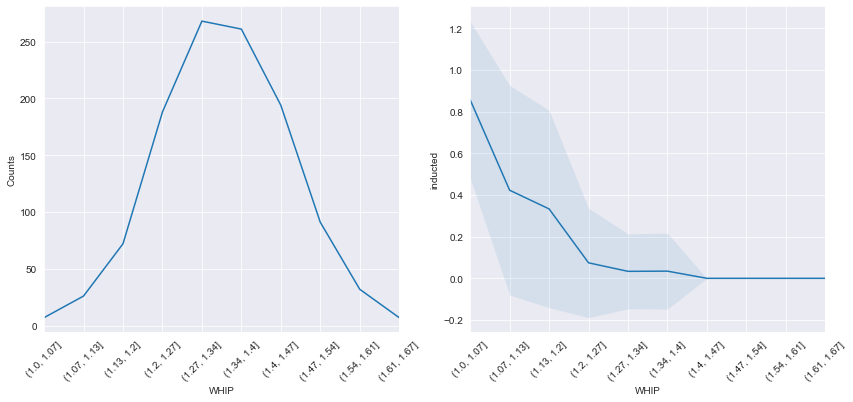

In [336]:
plot_feature(df_pitchers, 'WHIP', 'inducted')

In [337]:
get_bin_members(df_pitchers, 'WHIP', '1')

1.0 < WHIP <= 1.0 
                    inducted  WHIP bin
Name                                 
Walter Johnson        1.000 1.061   1
Trevor Hoffman        1.000 1.058   1
Christy Mathewson     1.000 1.058   1
Pedro Martinez        1.000 1.054   1
Mariano Rivera        1.000 1.000   1
Ed Walsh              1.000 1.000   1
Billy Wagner          0.000 0.998   1


In [338]:
get_bin_members(df_pitchers, 'WHIP', '2')

1.0 < WHIP <= 1.0 
                   inducted  WHIP bin
Name                                
Jim McCormick        0.000 1.132   2
Johan Santana        0.000 1.132   2
Hooks Wiltse         0.000 1.131   2
George McQuillan     0.000 1.131   2
Cy Young             1.000 1.130   2
Hoyt Wilhelm         1.000 1.125   2
Tim Keefe            1.000 1.123   2
Pete Alexander       1.000 1.121   2
Tom Seaver           1.000 1.121   2
Doc White            0.000 1.121   2
Eddie Plank          1.000 1.119   2
Chief Bender         1.000 1.113   2
Will White           0.000 1.111   2
Troy Percival        0.000 1.108   2
Sandy Koufax         1.000 1.106   2
Deacon Phillippe     0.000 1.105   2
Dick Hall            0.000 1.102   2
Rube Waddell         1.000 1.102   2
Juan Marichal        1.000 1.101   2
Babe Adams           0.000 1.092   2
Tom Henke            0.000 1.092   2
Tommy Bond           0.000 1.091   2
George Bradley       0.000 1.090   2
Mike Adams           0.000 1.085   2
Keith Foulke      

In [339]:
get_bin_members(df_pitchers, 'WHIP', '3')

1.0 < WHIP <= 1.0 
                  inducted  WHIP bin
Name                               
Jeff Reardon        0.000 1.199   3
Ken Johnson         0.000 1.199   3
Luis Tiant          0.000 1.199   3
Bert Blyleven       1.000 1.198   3
John Tudor          0.000 1.198   3
...                   ...   ...  ..
Bret Saberhagen     0.000 1.141   3
Bruce Sutter        1.000 1.140   3
Curt Schilling      0.000 1.137   3
John Wetteland      0.000 1.135   3
Catfish Hunter      1.000 1.134   3

[72 rows x 3 columns]


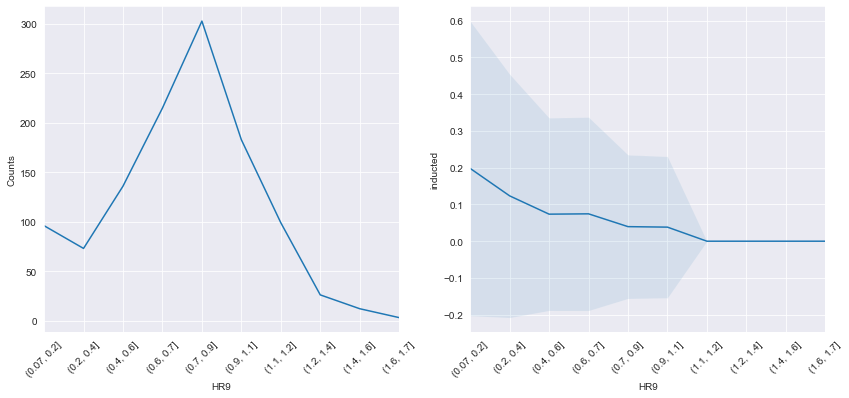

In [340]:
plot_feature(df_pitchers, 'HR9', 'inducted')

In [341]:
get_bin_members(df_pitchers, 'HR9', '1')

0.0 < HR9 <= 0.0 
                    inducted   HR9 bin
Name                                 
Old Hoss Radbourn     1.000 0.235   1
Jack Quinn            0.000 0.234   1
Art Fromme            0.000 0.232   1
Jouett Meekin         0.000 0.231   1
Hooks Dauss           0.000 0.231   1
...                     ...   ...  ..
Cy Falkenberg         0.000 0.091   1
Eddie Cicotte         0.000 0.089   1
Eddie Plank           1.000 0.084   1
Willie Mitchell       0.000 0.077   1
Ed Walsh              1.000 0.070   1

[96 rows x 3 columns]


In [342]:
get_bin_members(df_pitchers, 'HR9', '2')

0.0 < HR9 <= 0.0 
                        inducted   HR9 bin
Name                                     
George Pipgras            0.000 0.399   2
Dale Murray               0.000 0.399   2
Jimmy Ring                0.000 0.398   2
Jim Kern                  0.000 0.397   2
Kent Tekulve              0.000 0.395   2
...                         ...   ...  ..
Nig Cuppy                 0.000 0.244   2
Fred Toney                0.000 0.241   2
Lee Meadows               0.000 0.239   2
Theodore Breitenstein     0.000 0.239   2
Ray Caldwell              0.000 0.237   2

[73 rows x 3 columns]


In [343]:
get_bin_members(df_pitchers, 'HR9', '3')

0.0 < HR9 <= 1.0 
                inducted   HR9 bin
Name                             
Bob Kuzava        0.000 0.564   3
Dave Tomlin       0.000 0.563   3
Steve Barber      0.000 0.563   3
Ray Kremer        0.000 0.562   3
Sid Hudson        0.000 0.561   3
...                 ...   ...  ..
J. R. Richard     0.000 0.409   3
Willis Hudlin     0.000 0.406   3
Jack Stivetts     0.000 0.405   3
Bill Zuber        0.000 0.401   3
Dazzy Vance       1.000 0.400   3

[136 rows x 3 columns]


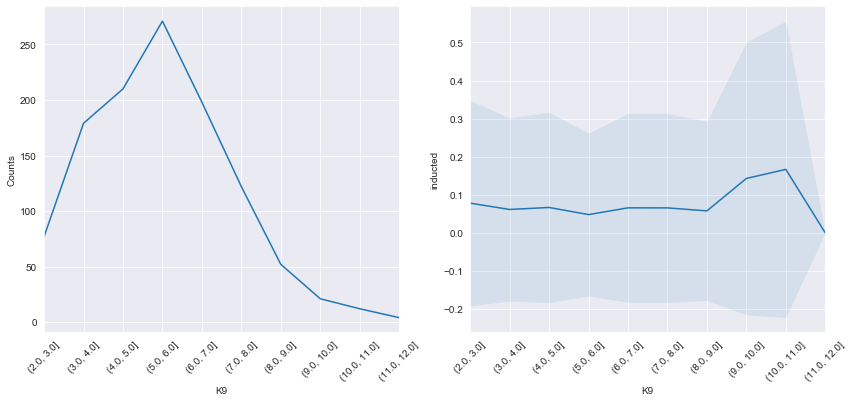

In [344]:
plot_feature(df_pitchers, 'K9', 'inducted')

In [345]:
get_bin_members(df_pitchers, 'K9', '10')

11.0 < K9 <= 12.0 
                  inducted     K9 bin
Name                                
Billy Wagner        0.000 11.920  10
Brad Lidge          0.000 11.919  10
Matt Mantei         0.000 11.045  10
Armando Benitez     0.000 10.929  10


In [346]:
get_bin_members(df_pitchers, 'K9', '9')

10.0 < K9 <= 11.0 
                  inducted     K9 bin
Name                                
Octavio Dotel       0.000 10.817   9
Randy Johnson       1.000 10.610   9
Ugueth Urbina       0.000 10.506   9
B. J. Ryan          0.000 10.481   9
Mike Gonzalez       0.000 10.350   9
Chad Fox            0.000 10.342   9
Kerry Wood          0.000 10.317   9
Pedro Martinez      1.000 10.040   9
Eric Gagne          0.000 10.039   9
Robb Nen            0.000  9.982   9
Frank Francisco     0.000  9.924   9
Troy Percival       0.000  9.919   9


In [347]:
get_bin_members(df_pitchers, 'K9', '8')

9.0 < K9 <= 10.0 
                 inducted    K9 bin
Name                              
Jose Valverde      0.000 9.880   8
Tom Henke          0.000 9.813   8
Ryne Duren         0.000 9.621   8
Nolan Ryan         1.000 9.548   8
Damaso Marte       0.000 9.524   8
J. J. Putz         0.000 9.514   8
Jeff Nelson        0.000 9.508   8
John Wetteland     0.000 9.459   8
Paul Shuey         0.000 9.442   8
Brian Fuentes      0.000 9.377   8
Trevor Hoffman     1.000 9.361   8
Sandy Koufax       1.000 9.277   8
Antonio Osuna      0.000 9.227   8
Rudy Seanez        0.000 9.127   8
Heath Bell         0.000 9.119   8
Mark Wohlers       0.000 9.060   8
Juan Cruz          0.000 9.055   8
Mike Adams         0.000 9.037   8
Mark Clear         0.000 8.996   8
Randy Myers        0.000 8.993   8
Scott Service      0.000 8.928   8


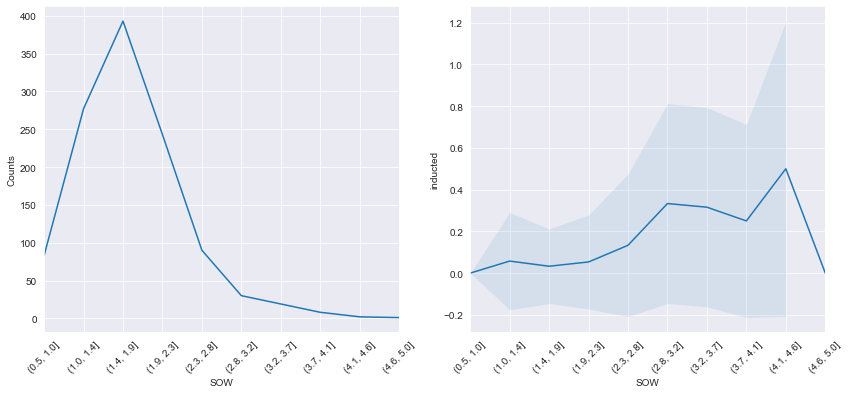

In [348]:
plot_feature(df_pitchers, 'SOW', 'inducted')

In [349]:
get_bin_members(df_pitchers, 'SOW', '10')

5.0 < SOW <= 5.0 
             inducted   SOW bin
Name                          
Tommy Bond     0.000 5.036  10


In [350]:
get_bin_members(df_pitchers, 'SOW', '9')

4.0 < SOW <= 5.0 
                 inducted   SOW bin
Name                              
Curt Schilling     0.000 4.383   9
Pedro Martinez     1.000 4.150   9


In [351]:
get_bin_members(df_pitchers, 'SOW', '8')

4.0 < SOW <= 4.0 
                 inducted   SOW bin
Name                              
Mariano Rivera     1.000 4.101   8
Billy Wagner       0.000 3.987   8
Cliff Lee          0.000 3.931   8
Jim Whitney        0.000 3.822   8
Keith Foulke       0.000 3.701   8
Trevor Hoffman     1.000 3.691   8
Doug Jones         0.000 3.680   8
Jon Lieber         0.000 3.680   8


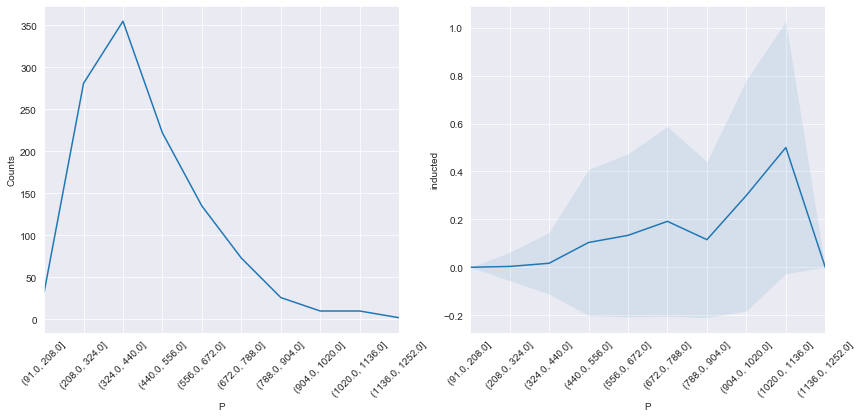

In [352]:
plot_feature(df_pitchers, 'P', 'inducted')

In [353]:
get_bin_members(df_pitchers, 'P', '10')

1136.0 < P <= 1252.0 
               inducted     P bin
Name                            
Jesse Orosco     0.000  1252  10
Mike Stanton     0.000  1178  10


In [354]:
get_bin_members(df_pitchers, 'P', '9')

1020.0 < P <= 1136.0 
                   inducted     P bin
Name                                
John Franco          0.000  1119   9
Mariano Rivera       1.000  1115   9
Dennis Eckersley     1.000  1071   9
Hoyt Wilhelm         1.000  1070   9
Dan Plesac           0.000  1064   9
Mike Timlin          0.000  1058   9
Kent Tekulve         0.000  1050   9
Trevor Hoffman       1.000  1035   9
Lee Smith            1.000  1022   9
Jose Mesa            0.000  1022   9


In [355]:
get_bin_members(df_pitchers, 'P', '8')

904.0 < P <= 1020.0 
                    inducted     P bin
Name                                 
Roberto Hernandez     0.000  1010   8
Michael Jackson       0.000  1005   8
Rich Gossage          1.000  1002   8
Lindy McDaniel        0.000   987   8
Todd Jones            0.000   982   8
David Weathers        0.000   964   8
Rollie Fingers        1.000   944   8
Gene Garber           0.000   931   8
Eddie Guardado        0.000   908   8
Cy Young              1.000   906   8


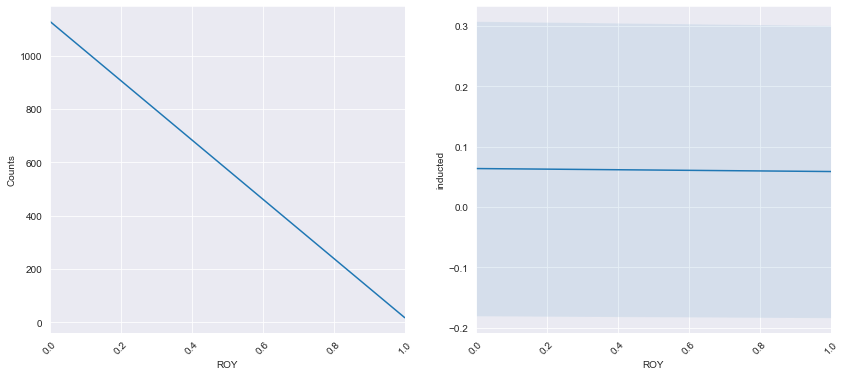

In [356]:
plot_feature(df_pitchers, 'ROY', 'inducted')

In [357]:
get_bin_members(df_pitchers, 'ROY', '10')

1.0 < ROY <= 1.0 
                      inducted   ROY bin
Name                                   
Dave Righetti           0.000 1.000  10
Stan Bahnsen            0.000 1.000  10
Don Newcombe            0.000 1.000  10
Jack Sanford            0.000 1.000  10
Todd Worrell            0.000 1.000  10
Hideo Nomo              0.000 1.000  10
Rick Sutcliffe          0.000 1.000  10
Dwight Gooden           0.000 1.000  10
Gregg Olson             0.000 1.000  10
Kerry Wood              0.000 1.000  10
Jon Matlack             0.000 1.000  10
John Montefusco         0.000 1.000  10
Gary Peters             0.000 1.000  10
Steve Howe              0.000 1.000  10
Pat Zachry              0.000 1.000  10
Tom Seaver              1.000 1.000  10
Fernando Valenzuela     0.000 1.000  10


In [358]:
get_bin_members(df_pitchers, 'ROY', '9')

1.0 < ROY <= 1.0 
 Empty DataFrame
Columns: [inducted, ROY, bin]
Index: []


In [359]:
get_bin_members(df_pitchers, 'ROY', '8')

1.0 < ROY <= 1.0 
 Empty DataFrame
Columns: [inducted, ROY, bin]
Index: []


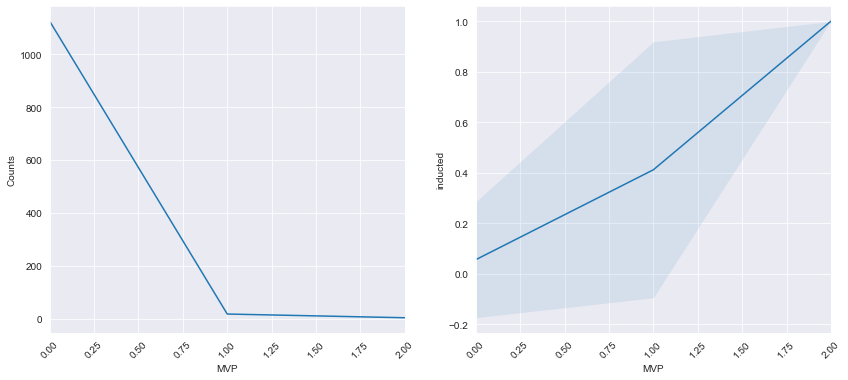

In [360]:
plot_feature(df_pitchers, 'MVP', 'inducted')

In [361]:
get_bin_members(df_pitchers, 'MVP', '10')

2.0 < MVP <= 2.0 
                 inducted   MVP bin
Name                              
Hal Newhouser      1.000 2.000  10
Walter Johnson     1.000 2.000  10
Carl Hubbell       1.000 2.000  10


In [362]:
get_bin_members(df_pitchers, 'MVP', '9')

2.0 < MVP <= 2.0 
 Empty DataFrame
Columns: [inducted, MVP, bin]
Index: []


In [363]:
get_bin_members(df_pitchers, 'MVP', '8')

1.0 < MVP <= 2.0 
 Empty DataFrame
Columns: [inducted, MVP, bin]
Index: []


In [364]:
get_bin_members(df_pitchers, 'MVP', '7')

1.0 < MVP <= 1.0 
 Empty DataFrame
Columns: [inducted, MVP, bin]
Index: []


In [365]:
get_bin_members(df_pitchers, 'MVP', '6')

1.0 < MVP <= 1.0 
 Empty DataFrame
Columns: [inducted, MVP, bin]
Index: []


In [366]:
get_bin_members(df_pitchers, 'MVP', '5')

1.0 < MVP <= 1.0 
                   inducted   MVP bin
Name                                
Willie Hernandez     0.000 1.000   5
Bucky Walters        0.000 1.000   5
Denny McLain         0.000 1.000   5
Vida Blue            0.000 1.000   5
Dazzy Vance          1.000 1.000   5
Don Newcombe         0.000 1.000   5
Spud Chandler        0.000 1.000   5
Sandy Koufax         1.000 1.000   5
Roger Clemens        0.000 1.000   5
Mort Cooper          0.000 1.000   5
Bobby Shantz         0.000 1.000   5
Lefty Grove          1.000 1.000   5
Dizzy Dean           1.000 1.000   5
Bob Gibson           1.000 1.000   5
Dennis Eckersley     1.000 1.000   5
Jim Konstanty        0.000 1.000   5
Rollie Fingers       1.000 1.000   5


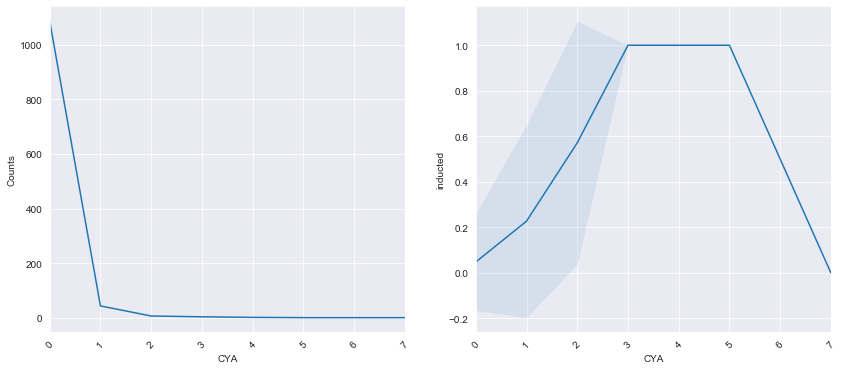

In [367]:
plot_feature(df_pitchers, 'CYA', 'inducted')

In [368]:
get_bin_members(df_pitchers, 'CYA', '10')

6.0 < CYA <= 7.0 
                inducted   CYA bin
Name                             
Roger Clemens     0.000 7.000  10


In [369]:
get_bin_members(df_pitchers, 'CYA', '9')

6.0 < CYA <= 6.0 
 Empty DataFrame
Columns: [inducted, CYA, bin]
Index: []


In [370]:
get_bin_members(df_pitchers, 'CYA', '8')

5.0 < CYA <= 6.0 
                inducted   CYA bin
Name                             
Randy Johnson     1.000 5.000   8


In [371]:
get_bin_members(df_pitchers, 'CYA', '7')

4.0 < CYA <= 5.0 
 Empty DataFrame
Columns: [inducted, CYA, bin]
Index: []


In [372]:
get_bin_members(df_pitchers, 'CYA', '6')

4.0 < CYA <= 4.0 
                inducted   CYA bin
Name                             
Steve Carlton     1.000 4.000   6
Greg Maddux       1.000 4.000   6


In [373]:
get_bin_members(df_pitchers, 'CYA', '5')

3.0 < CYA <= 4.0 
                 inducted   CYA bin
Name                              
Tom Seaver         1.000 3.000   5
Pedro Martinez     1.000 3.000   5
Jim Palmer         1.000 3.000   5
Sandy Koufax       1.000 3.000   5


In [374]:
get_bin_members(df_pitchers, 'CYA', '4')

2.0 < CYA <= 3.0 
 Empty DataFrame
Columns: [inducted, CYA, bin]
Index: []


In [375]:
get_bin_members(df_pitchers, 'CYA', '3')

1.0 < CYA <= 2.0 
                  inducted   CYA bin
Name                               
Roy Halladay        1.000 2.000   3
Johan Santana       0.000 2.000   3
Bret Saberhagen     0.000 2.000   3
Gaylord Perry       1.000 2.000   3
Denny McLain        0.000 2.000   3
Tom Glavine         1.000 2.000   3
Bob Gibson          1.000 2.000   3


In [376]:
get_bin_members(df_pitchers, 'CYA', '2')

1.0 < CYA <= 1.0 
                      inducted   CYA bin
Name                                   
Mike Cuellar            0.000 1.000   2
Chris Carpenter         0.000 1.000   2
Bob Welch               0.000 1.000   2
Jack McDowell           0.000 1.000   2
Doug Drabek             0.000 1.000   2
Dwight Gooden           0.000 1.000   2
Mike McCormick          0.000 1.000   2
Dennis Eckersley        1.000 1.000   2
Steve Bedrosian         0.000 1.000   2
Bruce Sutter            1.000 1.000   2
Don Drysdale            1.000 1.000   2
Jim Perry               0.000 1.000   2
Catfish Hunter          1.000 1.000   2
Vida Blue               0.000 1.000   2
Pete Vuckovich          0.000 1.000   2
Warren Spahn            1.000 1.000   2
Frank Viola             0.000 1.000   2
Ron Guidry              0.000 1.000   2
Fergie Jenkins          1.000 1.000   2
John Denny              0.000 1.000   2
Randy Jones             0.000 1.000   2
Mike Scott              0.000 1.000   2
Fernando Valenzuela  

In [377]:
get_bin_members(df_pitchers, 'CYA', '1')

-0.0 < CYA <= 1.0 
                inducted   CYA bin
Name                             
Hideo Nomo        0.000 0.000   1
Fred Norman       0.000 0.000   1
Dickie Noles      0.000 0.000   1
Mike Norris       0.000 0.000   1
Gregg Olson       0.000 0.000   1
...                 ...   ...  ..
Chris Hammond     0.000 0.000   1
Mike Hampton      0.000 0.000   1
Bill Hands        0.000 0.000   1
Chris Haney       0.000 0.000   1
Bill Zuber        0.000 0.000   1

[1087 rows x 3 columns]


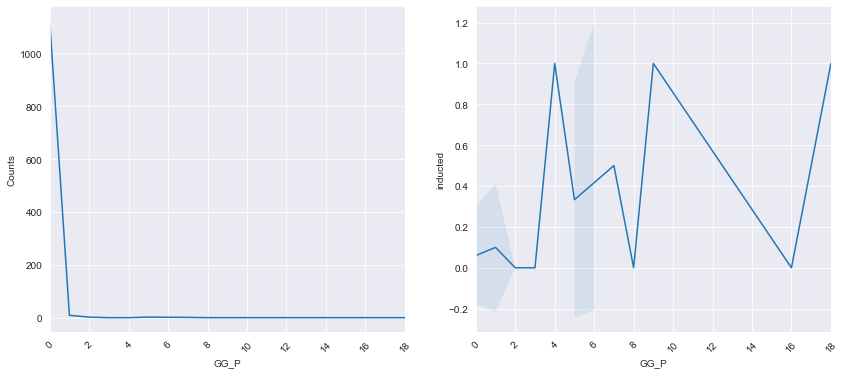

In [378]:
plot_feature(df_pitchers, 'GG_P', 'inducted')

In [379]:
get_bin_members(df_pitchers, 'GG_P', '10')

16.0 < GG_P <= 18.0 
              inducted   GG_P bin
Name                            
Greg Maddux     1.000 18.000  10


In [380]:
get_bin_members(df_pitchers, 'GG_P', '9')

14.0 < GG_P <= 16.0 
           inducted   GG_P bin
Name                         
Jim Kaat     0.000 16.000   9


In [381]:
get_bin_members(df_pitchers, 'GG_P', '8')

13.0 < GG_P <= 14.0 
 Empty DataFrame
Columns: [inducted, GG_P, bin]
Index: []


In [382]:
get_bin_members(df_pitchers, 'GG_P', '7')

11.0 < GG_P <= 13.0 
 Empty DataFrame
Columns: [inducted, GG_P, bin]
Index: []


In [383]:
get_bin_members(df_pitchers, 'GG_P', '6')

9.0 < GG_P <= 11.0 
 Empty DataFrame
Columns: [inducted, GG_P, bin]
Index: []


In [384]:
get_bin_members(df_pitchers, 'GG_P', '5')

7.0 < GG_P <= 9.0 
               inducted  GG_P bin
Name                            
Bob Gibson       1.000 9.000   5
Bobby Shantz     0.000 8.000   5


In [385]:
get_bin_members(df_pitchers, 'GG_P', '4')

5.0 < GG_P <= 7.0 
                inducted  GG_P bin
Name                             
Mike Mussina      1.000 7.000   4
Mark Langston     0.000 7.000   4


In [386]:
get_bin_members(df_pitchers, 'GG_P', '3')

4.0 < GG_P <= 5.0 
               inducted  GG_P bin
Name                            
Ron Guidry       0.000 5.000   3
Phil Niekro      1.000 5.000   3
Kenny Rogers     0.000 5.000   3
Jim Palmer       1.000 4.000   3


In [387]:
get_bin_members(df_pitchers, 'GG_P', '2')

2.0 < GG_P <= 4.0 
                   inducted  GG_P bin
Name                                
Harvey Haddix        0.000 3.000   2
Andy Messersmith     0.000 2.000   2
Mike Norris          0.000 2.000   2
Rick Reuschel        0.000 2.000   2


In [388]:
get_bin_members(df_pitchers, 'GG_P', '1')

-0.0 < GG_P <= 2.0 
                      inducted  GG_P bin
Name                                   
Mike Hampton            0.000 1.000   1
Fernando Valenzuela     0.000 1.000   1
Joaquin Andujar         0.000 1.000   1
Ron Darling             0.000 1.000   1
Mike Boddicker          0.000 1.000   1
...                       ...   ...  ..
Bill Hallahan           0.000 0.000   1
Roy Halladay            1.000 0.000   1
Dick Hall               0.000 0.000   1
Tom Hall                0.000 0.000   1
Bill Zuber              0.000 0.000   1

[1132 rows x 3 columns]


### Wins Above Replacement (WAR)

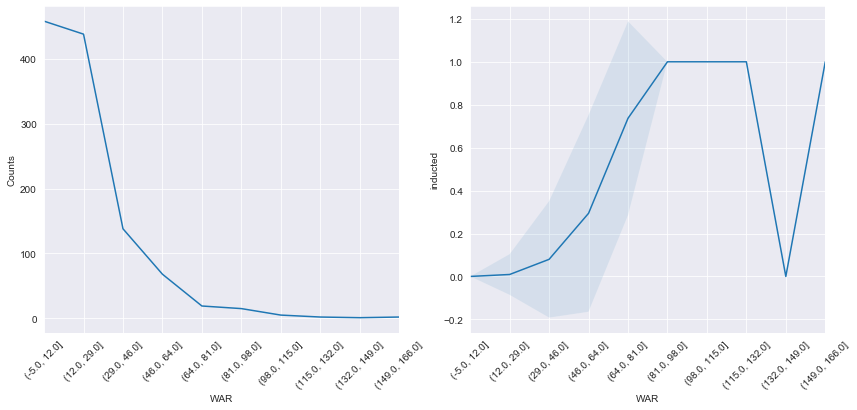

In [389]:
plot_feature(df_pitchers, 'WAR', 'inducted')

In [390]:
get_bin_members(df_pitchers, 'WAR', '10')

149.0 < WAR <= 166.0 
                 inducted     WAR bin
Name                                
Cy Young           1.000 165.720  10
Walter Johnson     1.000 151.880  10


In [391]:
get_bin_members(df_pitchers, 'WAR', '9')

132.0 < WAR <= 149.0 
                inducted     WAR bin
Name                               
Roger Clemens     0.000 138.670   9


In [392]:
get_bin_members(df_pitchers, 'WAR', '8')

115.0 < WAR <= 132.0 
                 inducted     WAR bin
Name                                
Kid Nichols        1.000 116.710   8
Pete Alexander     1.000 116.000   8


In [393]:
get_bin_members(df_pitchers, 'WAR', '7')

98.0 < WAR <= 115.0 
                    inducted     WAR bin
Name                                   
Lefty Grove           1.000 113.310   7
Tom Seaver            1.000 106.020   7
Greg Maddux           1.000 104.780   7
Randy Johnson         1.000 103.520   7
Christy Mathewson     1.000  99.810   7


In [394]:
get_bin_members(df_pitchers, 'WAR', '6')

81.0 < WAR <= 98.0 
                 inducted    WAR bin
Name                               
Phil Niekro        1.000 96.960   6
Bert Blyleven      1.000 96.130   6
Gaylord Perry      1.000 93.020   6
Warren Spahn       1.000 92.470   6
Tim Keefe          1.000 89.130   6
Eddie Plank        1.000 87.740   6
Pedro Martinez     1.000 86.080   6
John Clarkson      1.000 84.930   6
Steve Carlton      1.000 84.110   6
Nolan Ryan         1.000 83.600   6
Pud Galvin         1.000 83.300   6
Robin Roberts      1.000 82.950   6
Mike Mussina       1.000 82.780   6
Fergie Jenkins     1.000 82.180   6
Bob Gibson         1.000 81.700   6


In [395]:
v = df_pos_play.Name.value_counts()
df_pos_play[df_pos_play.Name.isin(v.index[v.gt(1)])]

playerID            Name  NumYears  debut  final        G       AB  \
21    alomasa01    Sandy Alomar        15   1964   1978 1481.000 4760.000   
22    alomasa02    Sandy Alomar        20   1988   2007 1377.000 4530.000   
225   burnsge01    George Burns        15   1911   1925 1853.000 7241.000   
226   burnsge02    George Burns        16   1914   1929 1866.000 6573.000   
376    cruzjo01       Jose Cruz        19   1970   1988 2353.000 7917.000   
377    cruzjo02       Jose Cruz        12   1997   2008 1388.000 4724.000   
638   gonzaal01   Alex Gonzalez        13   1994   2006 1396.000 4977.000   
639   gonzaal02   Alex Gonzalez        16   1998   2014 1609.000 5776.000   
673   griffke01     Ken Griffey        19   1973   1991 2097.000 7229.000   
674   griffke02     Ken Griffey        22   1989   2010 2671.000 9801.000   
704   hairsje01  Jerry Hairston        14   1973   1989  859.000 1699.000   
705   hairsje02  Jerry Hairston        16   1998   2013 1442.000 4387.000   
883   johnsbo01     Bob Johnson        13   1933   1945 1863.000 6920.000   
884   johnsbo02     Bob Johnson        11   1960   1970  874.000 2307.000   
1119  matthga01   Gary Matthews        16   1972   1987 2033.000 7147.000   
1120  matthga02   Gary Matthews        12   1999   2010 1281.000 4103.000   
1490  roberda06    Dave Roberts        10   1972   1982  709.000 2017.000   
1491  roberda07    Dave Roberts        10   1999   2008  832.000 2707.000   
1558  schofdi01  Dick Schofield        19   1953   1971 1321.000 3083.000   
1559  schofdi02  Dick Schofield        14   1983   1996 1368.000 4299.000   
1609  smallro01     Roy Smalley        11   1948   1958  872.000 2644.000   
1610  smallro02     Roy Smalley        13   1975   1987 1653.000 5657.000   
1692  sullibi03  Billy Sullivan        16   1899   1916 1147.000 3647.000   
1693  sullibi04  Billy Sullivan        12   1931   1947  962.000 2840.000   
1727  thomafr03    Frank Thomas        16   1951   1966 1766.000 6285.000   
1728  thomafr04    Frank Thomas        19   1990   2008 2322.000 8199.000   

            R        H  Doubles  ...  GG_LF  GG_CF  GG_RF  GG_OF  GG_All_OF  \
21    558.000 1168.000  126.000  ...  0.000  0.000  0.000  0.000      0.000   
22    520.000 1236.000  249.000  ...  0.000  0.000  0.000  0.000      0.000   
225  1188.000 2077.000  362.000  ...  0.000  0.000  0.000  0.000      0.000   
226   901.000 2018.000  444.000  ...  0.000  0.000  0.000  0.000      0.000   
376  1036.000 2251.000  391.000  ...  0.000  0.000  0.000  0.000      0.000   
377   713.000 1167.000  252.000  ...  0.000  0.000  0.000  1.000      1.000   
638   623.000 1209.000  274.000  ...  0.000  0.000  0.000  0.000      0.000   
639   667.000 1418.000  332.000  ...  0.000  0.000  0.000  0.000      0.000   
673  1129.000 2143.000  364.000  ...  0.000  0.000  0.000  0.000      0.000   
674  1662.000 2781.000  524.000  ...  0.000  0.000  0.000 10.000     10.000   
704   216.000  438.000   91.000  ...  0.000  0.000  0.000  0.000      0.000   
705   580.000 1126.000  233.000  ...  0.000  0.000  0.000  0.000      0.000   
883  1239.000 2051.000  396.000  ...  0.000  0.000  0.000  0.000      0.000   
884   254.000  628.000   88.000  ...  0.000  0.000  0.000  0.000      0.000   
1119 1083.000 2011.000  319.000  ...  0.000  0.000  0.000  0.000      0.000   
1120  612.000 1056.000  225.000  ...  0.000  0.000  0.000  0.000      0.000   
1490  194.000  483.000   77.000  ...  0.000  0.000  0.000  0.000      0.000   
1491  437.000  721.000   95.000  ...  0.000  0.000  0.000  0.000      0.000   
1558  394.000  699.000  113.000  ...  0.000  0.000  0.000  0.000      0.000   
1559  505.000  989.000  137.000  ...  0.000  0.000  0.000  0.000      0.000   
1609  277.000  601.000  103.000  ...  0.000  0.000  0.000  0.000      0.000   
1610  745.000 1454.000  244.000  ...  0.000  0.000  0.000  0.000      0.000   
1692  363.000  777.000  119.000  ...  0.000  0.000  0.000  0.000      0.000   
1693  347.000  820.000  152.000

In [396]:
v = df_pitchers.Name.value_counts()
df_pitchers[df_pitchers.Name.isin(v.index[v.gt(1)])]

playerID           Name  NumYears  debut  final       W       L  \
183   colemjo04    Joe Coleman        10   1942   1955  52.000  76.000   
184   colemjo05    Joe Coleman        15   1965   1979 142.000 135.000   
560     leebi02       Bill Lee        14   1934   1947 169.000 157.000   
561     leebi03       Bill Lee        14   1969   1982 119.000  90.000   
573   leonadu01  Dutch Leonard        11   1913   1925 139.000 113.000   
574   leonadu02  Dutch Leonard        20   1933   1953 191.000 181.000   
673   millebo02     Bob Miller        10   1949   1958  42.000  42.000   
674   millebo04     Bob Miller        17   1957   1974  69.000  81.000   
1012  swiftbi01     Bill Swift        11   1932   1943  95.000  82.000   
1013  swiftbi02     Bill Swift        13   1985   1998  94.000  78.000   

           G      GS      CG  ...   SOW    P   ROY   MVP   CYA  GG_P    WAR  \
183  223.000 140.000  60.000  ... 0.784  223 0.000 0.000 0.000 0.000  5.920   
184  484.000 340.000  94.000  ... 1.723  484 0.000 0.000 0.000 0.000 24.680   
560  462.000 378.000 182.000  ... 1.118  462 0.000 0.000 0.000 0.000 32.530   
561  416.000 225.000  72.000  ... 1.343  416 0.000 0.000 0.000 0.000 21.350   
573  331.000 272.000 152.000  ... 1.747  331 0.000 0.000 0.000 0.000 37.270   
574  640.000 374.000 192.000  ... 1.588  640 0.000 0.000 0.000 0.000 51.690   
673  261.000  69.000  23.000  ... 1.065  261 0.000 0.000 0.000 0.000  9.370   
674  694.000  99.000   7.000  ... 1.472  694 0.000 0.000 0.000 0.000 17.940   
1012 336.000 163.000  78.000  ... 1.812  336 0.000 0.000 0.000 0.000 19.280   
1013 403.000 220.000  11.000  ... 1.513  403 0.000 0.000 0.000 0.000 18.920   

      indYear  votedBy  inducted  
183     0.000        0     0.000  
184     0.000        0     0.000  
560     0.000        0     0.000  
561     0.000        0     0.000  
573     0.000        0     0.000  
574     0.000        0     0.000  
673     0.000        0     0.000  
674     0.000        0     0.000  
1012    0.000        0     0.000  
1013    0.000        0     0.000  

[10 rows x 45 columns]